In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from scipy import stats

Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [168]:
df=pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 164.1+ KB


•	There are 10 variables
•	Age, Commission, Duration, Sales are numeric variable
•	Others are categorical variables
•	There is total 3000 records and no missing data
•	9 independent variable and one target variable

Checking for missing value

In [7]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No missing value

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [9]:
df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


Observation:
- There wrong entry as we can see 'duration' has negative value.
- The mean and median of Commission & Sales varies significantly

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation

-Categorical code variable maximum unique count is 5


In [11]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


Observation
- Data looks good at first glance

In [12]:
df.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


Observation¶
- Data looks good at first glance

In [13]:
df.shape

(3000, 10)

In [14]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




Checking for Duplicates

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Although there are duplicates, its better not to removing them as there is no unique identifier and it can be different customer.The number of duplicate records are 139, but it can be of different customers, there is no customer ID or any unique identifier, thus canceling the idea of dropping this data.

Univariate Analysis

Age variable

In [16]:
print('Range of values: ', df['Age'].max()-df['Age'].min())

Range of values:  76


In [17]:
#Central values 
print('Minimum Age: ', df['Age'].min())
print('Maximum Age: ',df['Age'].max())
print('Mean value: ', df['Age'].mean())
print('Median value: ',df['Age'].median())
print('Standard deviation: ', df['Age'].std())
print('Null values: ',df['Age'].isnull().any())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944
Null values:  False


In [18]:
#Quartiles

Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df['Age']))

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [19]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [20]:
print('Number of outliers in Age upper : ', df[df['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df[df['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(df[df['Age']>57.0]['Age'].count()*100/len(df)), '%')
print('% of Outlier in Age lower: ',round(df[df['Age']<17.0]['Age'].count()*100/len(df)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7.0 %
% of Outlier in Age lower:  0.0 %


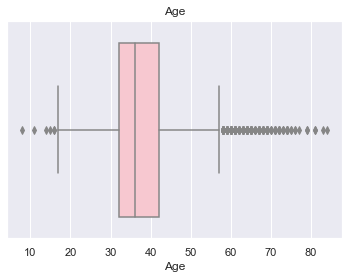

In [37]:
plt.title('Age')
sns.boxplot(df['Age'],orient='horizondal',color='pink')

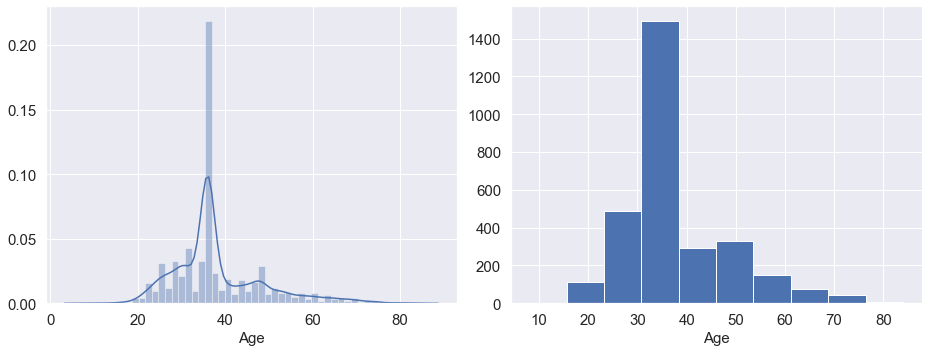

In [22]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Commision variable

In [23]:
print('Range of values: ', df['Commision'].max()-df['Commision'].min())

Range of values:  210.21


In [24]:
#Central values 
print('Minimum Commision: ', df['Commision'].min())
print('Maximum Commision: ',df['Commision'].max())
print('Mean value: ', df['Commision'].mean())
print('Median value: ',df['Commision'].median())
print('Standard deviation: ', df['Commision'].std())
print('Null values: ',df['Commision'].isnull().any())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Standard deviation:  25.48145450662553
Null values:  False


In [25]:
#Quartiles

Q1=df['Commision'].quantile(q=0.25)
Q3=df['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df['Commision']))

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235


In [26]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [27]:
print('Number of outliers in Commision upper : ', df[df['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df[df['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(df[df['Commision']>43.0875]['Commision'].count()*100/len(df)), '%')
print('% of Outlier in Commision lower: ',round(df[df['Commision']<-25.8525]['Commision'].count()*100/len(df)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12.0 %
% of Outlier in Commision lower:  0.0 %


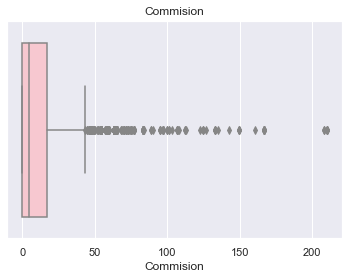

In [36]:
plt.title('Commision')
sns.boxplot(df['Commision'],orient='horizondal',color='pink')

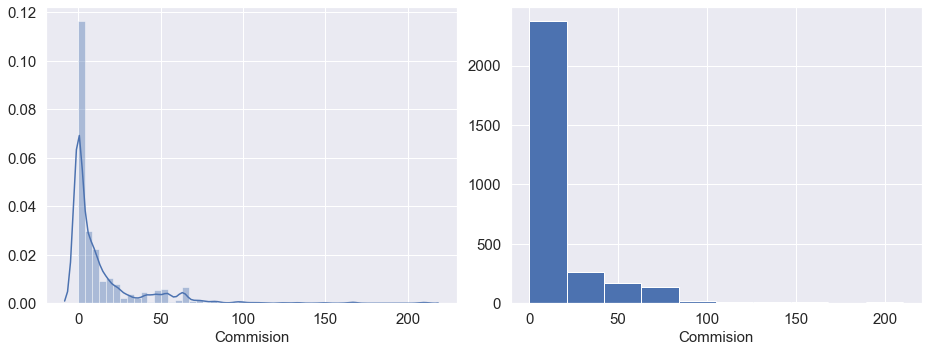

In [29]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Duration variable

In [30]:
print('Range of values: ', df['Duration'].max()-df['Duration'].min())

Range of values:  4581


In [31]:
#Central values 
print('Minimum Duration: ', df['Duration'].min())
print('Maximum Duration: ',df['Duration'].max())
print('Mean value: ', df['Duration'].mean())
print('Median value: ',df['Duration'].median())
print('Standard deviation: ', df['Duration'].std())
print('Null values: ',df['Duration'].isnull().any())

Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Standard deviation:  134.05331313253495
Null values:  False


In [32]:
#Quartiles

Q1=df['Duration'].quantile(q=0.25)
Q3=df['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df['Duration']))

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0


In [33]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [34]:
print('Number of outliers in Duration upper : ', df[df['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df[df['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(df[df['Duration']>141.0]['Duration'].count()*100/len(df)), '%')
print('% of Outlier in Duration lower: ',round(df[df['Duration']<-67.0]['Duration'].count()*100/len(df)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13.0 %
% of Outlier in Duration lower:  0.0 %


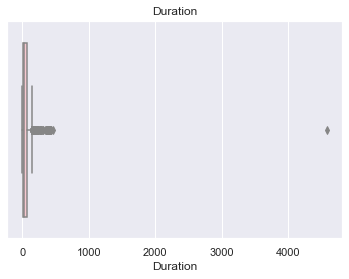

In [35]:
plt.title('Duration')
sns.boxplot(df['Duration'],orient='horizondal',color='pink')

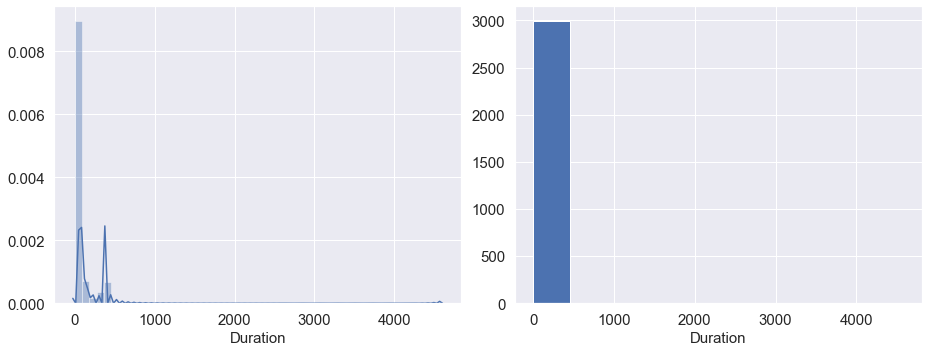

In [38]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Sales variable

In [39]:
print('Range of values: ', df['Sales'].max()-df['Sales'].min())

Range of values:  539.0


In [40]:
#Central values 
print('Minimum Sales: ', df['Sales'].min())
print('Maximum Sales: ',df['Sales'].max())
print('Mean value: ', df['Sales'].mean())
print('Median value: ',df['Sales'].median())
print('Standard deviation: ', df['Sales'].std())
print('Null values: ',df['Sales'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Standard deviation:  70.73395353143047
Null values:  False


In [41]:
#Quartiles

Q1=df['Sales'].quantile(q=0.25)
Q3=df['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df['Sales']))

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0


In [42]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [43]:
print('Number of outliers in Sales upper : ', df[df['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df[df['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df[df['Sales']>142.5]['Sales'].count()*100/len(df)), '%')
print('% of Outlier in Sales lower: ',round(df[df['Sales']<-53.5]['Sales'].count()*100/len(df)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12.0 %
% of Outlier in Sales lower:  0.0 %


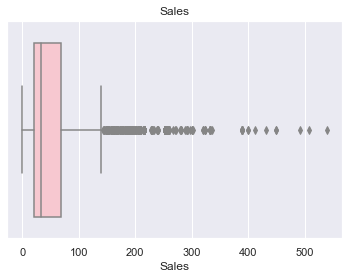

In [44]:
plt.title('Sales')
sns.boxplot(df['Sales'],orient='horizondal',color='pink')

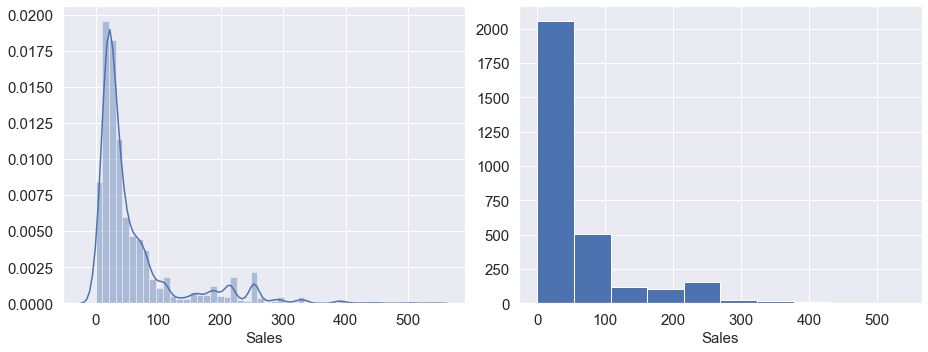

In [45]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Observation:

We can see that there are outliers in all the variables, but the sales and commision can be an authentic business value. The outliers can be handled with the help of Random Forest and CART. Hence, outliers are not treated at this stage.

Categorical Variables

Agency_Code

Count Plot

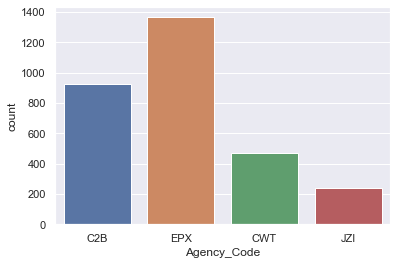

In [47]:
sns.countplot(data = df, x = 'Agency_Code')

Boxplot

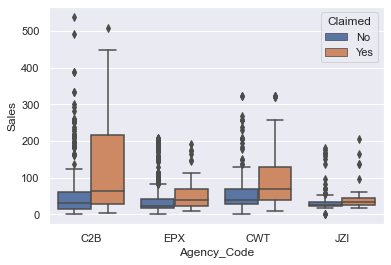

In [48]:
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

Swarmpot

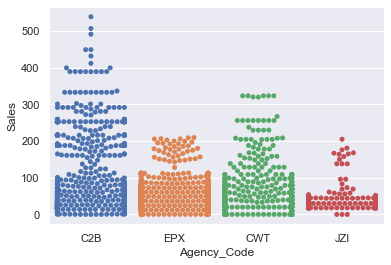

In [49]:
sns.swarmplot(data = df, x='Agency_Code',y='Sales')

Combine Violin plot and Swarm plot

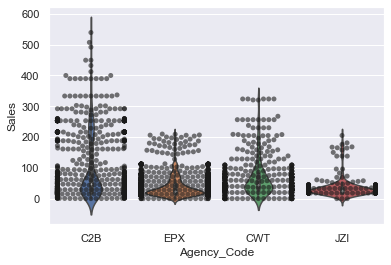

In [50]:
sns.violinplot(data = df, x='Agency_Code',y='Sales')
sns.swarmplot(data = df, x='Agency_Code',y='Sales', color = 'k', alpha = 0.6)

Type

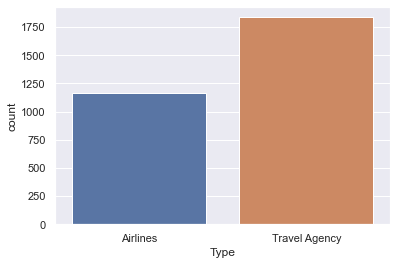

In [51]:
sns.countplot(data = df, x = 'Type')

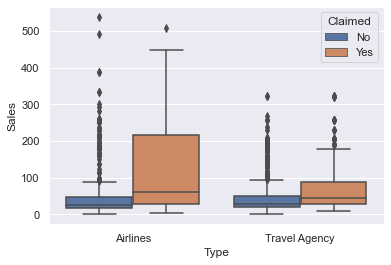

In [52]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

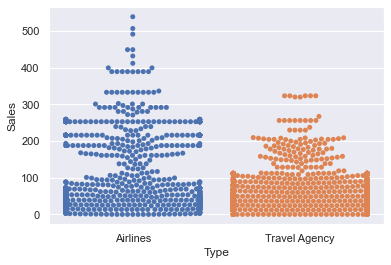

In [53]:
sns.swarmplot(data = df, x='Type',y='Sales')

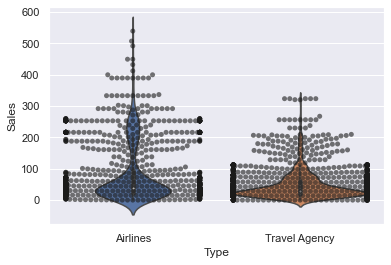

In [54]:
sns.violinplot(data = df, x='Type',y='Sales')
sns.swarmplot(data = df, x='Type',y='Sales', color = 'k', alpha = 0.6)

Channel

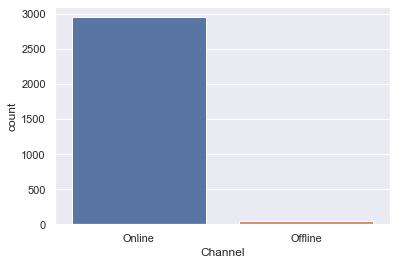

In [55]:
sns.countplot(data = df, x = 'Channel')

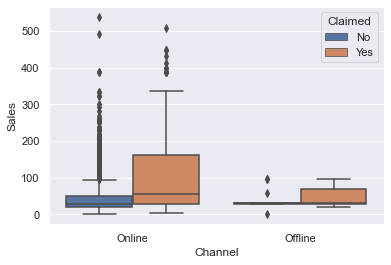

In [56]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

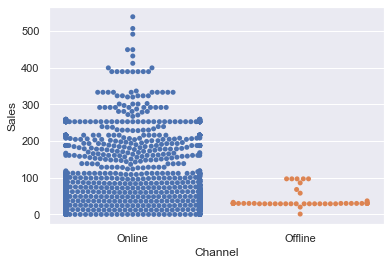

In [57]:
sns.swarmplot(data = df, x='Channel',y='Sales')

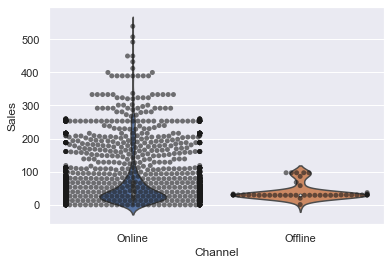

In [58]:
sns.violinplot(data = df, x='Channel',y='Sales')
sns.swarmplot(data = df, x='Channel',y='Sales', color = 'k', alpha = 0.6)

Product Name

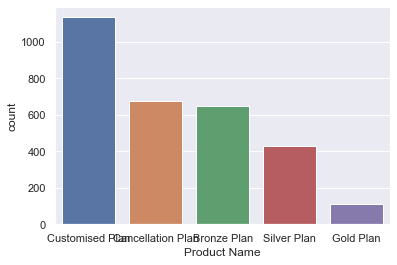

In [59]:
sns.countplot(data = df, x = 'Product Name')

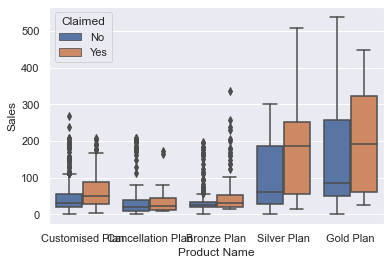

In [60]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

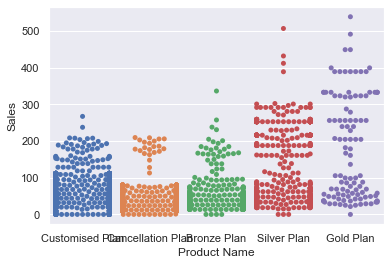

In [61]:
sns.swarmplot(data = df, x='Product Name',y='Sales')

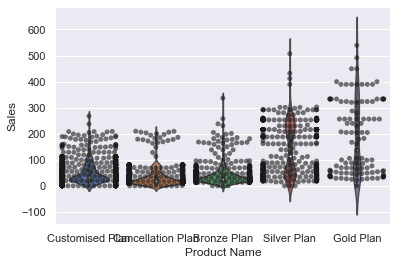

In [62]:
sns.violinplot(data = df, x='Product Name',y='Sales')
sns.swarmplot(data = df, x='Product Name',y='Sales', color = 'k', alpha = 0.6)

Destination

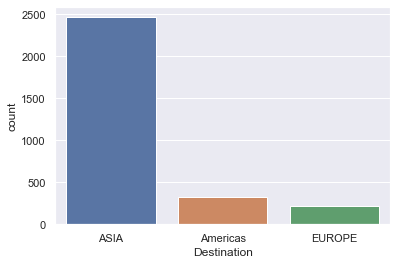

In [63]:
sns.countplot(data = df, x = 'Destination')

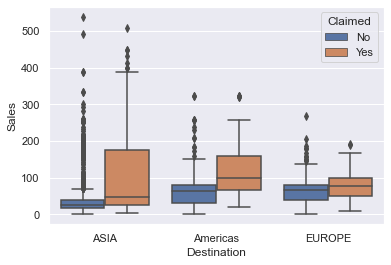

In [64]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

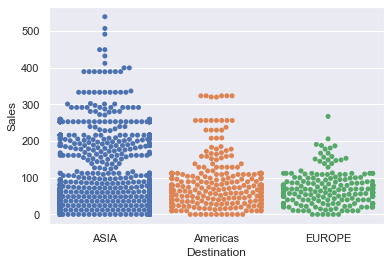

In [65]:
sns.swarmplot(data = df, x='Destination',y='Sales')

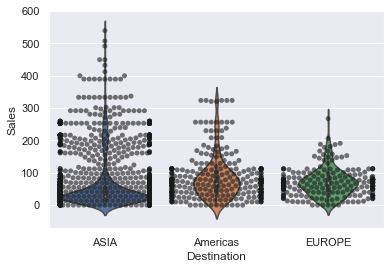

In [66]:
sns.violinplot(data = df, x='Destination',y='Sales')
sns.swarmplot(data = df, x='Destination',y='Sales', color = 'k', alpha = 0.6)

Checking pairwise distribution of the continuous variables

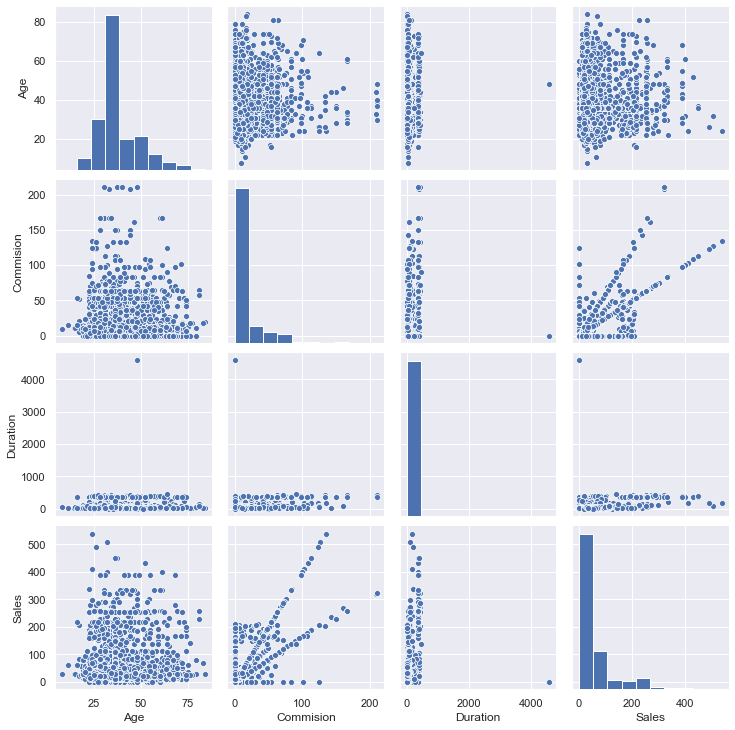

In [169]:
sns.pairplot(df[['Age', 'Commision', 
    'Duration', 'Sales']])

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAt8AAALaCAYAAADpxz93AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOydfXxU5Zn3v+ececvLEIa3qFW0Ig6I0AYlERK1lcpuVYQun30IWgU1YIkt1LpbCboFfCHYPtbVbbFi1gd1rfDsQxWt7C4C2ypoiVW2UIqjRRRbFUiYhEkyr+ec54/JOZnJnJM38jIJ9/fz8SOZOXPOmTn3/M49131dv0vSdR2BQCAQCAQCgUDQ98gDfQICgUAgEAgEAsGZgph8CwQCgUAgEAgE/YSYfAsEAoFAIBAIBP2EmHwLBAKBQCAQCAT9hJh8CwQCgUAgEAgE/cRQnnw7gAta/y8QZDtivAoGG2LMCgYTYrwKsoahPAjPBY7U1zehadlnp+jz5RIMtgz0afQIce72jB7tlXr40k7H62D+3Hsb8Vmk09PP4zTGK3QyZs/UayTed98hxmv3EO9p4LEbs0M58p3VOBzKQJ9CjxHnPjAM5nPvbcRnkU42fh7ZeE79gXjfg5PBfv5WiPeUvYjJt0AgEAgEAoFA0E+IybdAIBAIBAKBQNBPiMm3QDDEUBQZXZFJSBK6IqMo4msu6D+M8Xc82CLGn2DQI/RU0BcM5YJLgeCMQ1Fkgi1x1m6s5XgwzBhfDisXFePLdaKq2kCfnmCII8afYCghxrOgrxA/4QSCIYSuSARDEe5eMDV5k/B6WLuxlsRAn5jgjCABvLj9fSrmTKa6spSKOZN5cfv7YvwJBiUJMCfeAMeDYVs9FRFyQXcQkW+BYIigKDLBUIwnt+w3ozTL5hfx/LZDqJouvuyCvkeC2VeO44nN+9LGIKdjECcQDBCqppsTb4PjwXCGnooIuaC7iPvxIMA7LAePu/uXKhJNEDoV7nxDwZDAKkrzxOZ9LJ03BUWWQM0+v3vBEEOXzIk3tI3B6sqyAT4xgaD7KLLEGF9O2gR8jC8nQ0/tIuTVlaXid6fAEjH5HgR43A5m37O126979dE5hPrgfATZiV2U5pxR+TgAdWBOS3AGoWma5RjUNJ2h4c4rOJNwACsXFWdEtNvraVcj5AKBgRgXAsEQwS5K41RkVLX3p96KIpMgeeNRZMkUk/aPiWXXMwc5ZQz6x/qYd814CvJdyLKELsmgI8aEYNCgqhq+XCfVlaUdalpXI+TZgJVup76fzp4X9A5ZNfn2+/3fBqpa//yPQCDwD36//xvAT4EcYHMgELh/wE5QIMhi7KI0CnqvR72tchzvW1SM0ymz+unfibzHMxRjDL64/X3L3O9X3zzMglkTxJgQDBpUVUOidbKkWmtpVyPkA01nuekid73/yJpyXL/fnws8AVwNfAW40u/3zwaeAeYAE4Fpfr//mwN3lgJB9pIapdlQNZPqytI+E02rHMeHN9Zy7GRLl5wBBEMTYwwumTvFMvd75rTzxZgQDDn6U3tPh87cW7rj7iI4PbJm8g0oJM8nD3C2/ncK+DAQCBwJBAIJ4N+Avx+4UxQIshtV1ZBUDYeuI6lan4m/XY6jx+XIeEzVsmvZVdC3qKqGapP77c11ijEhGJL0l/aeDh3lpnfleUHvkTWT70AgEAL+CXgf+AvwMXAO8HnKZp8D5/b7yQkEA0hHHQMHylvWyHFMZYwvh0gskfGYIot6/zMJRZFxKLLl+Ai1xMWYEAwqeqKx2er5bafbxvexs+cFvUfW5Hz7/f4pwO3A+UAjySj3xUDqTy4J6NbPyZEj83vrFHud0aO9g/YY/XHufUU2n3v78appOp98cYqHntlr5uDdf3sJ5581DMD2ObmPxVLTdO6/vSTj2E6HbBYeGY+NGp7bJ+eTzddxIBiozyN1zGqazmd1TbRE4ywvL+LxTZk53305JrKFM3VsDob33dGcoP35d6S/duO3J6/pS1Lfk51uG9/Hzp7PFgbDOOsMSdezYznB7/f/I1AYCAT+ofXv64F/ANRAIPCN1sduAb4eCARu78IuLwCO1Nc3oWXhksno0V5OnOiaEeDo0d4eWw129RjdoTvnnm309bmPHu3tqUJdgMV41RWZqvV7MqroqytLAWyfk/phyXMg3U4G8xjsC3r6eZzGeAWLMasrMkePhXhyy358Xg/zrhmPb5ibPI8Tt0sBXR/y7gln6tjsj/fd2+O13b4zzr8j/bXT2J68pq+wek+D3e1ksH2/7MZs1kS+gT8AP/b7/XlACzAb2Avc7Pf7LwKOADeRLMAUCM4IOsvBG0hvWTsXgM6cAQRDF1XT8bgcHA+GzWItgw1VM3HoYkwIBg898e/Ods/vztxbuuLuIjh9smEsABAIBLb7/f4i4F0gDtQCq4HXgS2AB9gG/L+BOkeBoL/p0D+29d+pz5VMKkSRZRKalpVRC8HQRpElIrHEoPE8Fgg6wuWUWVVRgsflINQSZ8uuDwmGIh2O5cHk+S0YOLJm8g0QCAQeAR5p9/BOktaDAsEZR0f+sbR7rmRSIeWzJlC1frfwaBUMCA7gS2PyWbFwGuuefccch1WLinEpEnERRhMMEhRFpiEU48kt+81xvLy8CJ/X3aF/92Dx/BYMLFk1+RYIBOmoqsZIr4vqyjJUXUeRJFwKxGNJGU/vviaz4eX9VMyZjDfXSaglzovb32fJ3MlkT6mMYCijqhpul4O6aITVi6cjyxL1jWE2iXEoGGQkgF9ufz9NT1954zB3zp3SYcfgrnbF7Ixsz70WnB5i8i0QZDGKIlMfitl2HEvNz9Ml3bKroJjxCPoLRZEJhqL886b30sZgQyiGpiWbOQgEgwIJSz3VJb1TST3dvGnRaXLokx3mkwKBwJKudBwzPGXRJcuuguhi9i3oH6zG6xOb91E+6+KssioTCDqlAz3t614LotPk0EdEvgWCLKazyvnUCMk/3nK55baapouIo6Bf0GzG69mj8lEU0ETSq2CQoNl0aW1oiqLIEr5cJ0CfRKiz3TFFcPqI6ygQZDGKLFEyqZCZ08438w4PHanDocgkVA0NiMYT+LwegqeillX2soxZ6dOVPMLUbRyyjKxALK7hcspoKsJJRWCLLCebLBke395cJ5FYArdLxir/yelSiKmgahqKLKfVMwgE/U26PsoZ2rvznU+ob4xQs/WA2WvBKkJdXVnaaWpKR1rckWOKgmT5utT9GVp9PNgCiiy0OgsRk2+BIItxKRLlsyZQ3c7RZMXP2xxNlpcXsfhbl/Kfb33MsvlFaTmKqVX2XckjtNpmeXkR//37T/n65eeldSwUOYiCDCSd1YuvIBiKZoyV4cNcKIpsjhenS6EuFDPHtuGKMsrrEhNwQb+jaXqa9n3r6gvTtHeML4cVC4vZtuej0+610JkW2zmmuBTJsgZopNdlPu7zerj1+olCq7MckfMtEGQxMVU3xR9g5rTz0/4+Hgzz+KZ95LqdfP3y83h+2yGWzpvC+h9ew9J5UxjudZmC25U8QqttHt+0j299bbwp5umvlXolx1EwRNDB43JYjhU1AboimfmxMZWMsVy9sZa4mB8IBoDG5mia9k388qiM8bnu2VqunnpuWxS6NUKdSmofBjs60+JUx5QNVTOprizFl+skpuqWr4upbfubd429VvdmXrrg9BBXQCDIYtrn/nlznZaRllBLjBy3k+FeF06HwrOvHcTn9SClNHXorFtmR9sosnWEp64xTLAlLsRcACSXUhOqda6squs0hGJUrd/Dkuqd1DWGLbeLJzQxngT9TjyhdUlrRw3PYdXiK3ApkhmhNibg7fsw2NElLVY1JFXDoetIrc5W9q9rO3e7865rDLOkeidV6/cIzc4CRNqJQJDFtM/9C7XELXMBG5ti1Gw9wI+/dyWapnPHjZNRZAlNAVlRkFQdncyOmO07r9nlGqqa9WuN41ZXlibz0BG+tGcyqqrhcCiWubKKJKVF7RqbYpbbfVbXxNhCr3DIFPQrTofcJa39or4Z3zBPa62CznCvi3WVZeiSDrqEpmkkAEdKilV7etoF0/51befe0T0COs5LF97i/Yf46SMQZDHtIyuHjtRR1S7Ssmx+EVt2fYjP66EhFGXFz3ezpHoHVet389mJZupPRWiOq7gUqdMojVUkZ3l5ES/95kOWlxdZHvd4MAxSsurfiGqK6MqZiaLI6LJO+awJ1Gw9QNX6PdRsPUD5rAk4HFLahKD24OfMv9aftt38a/3s+cNnaRFAgaA/KMhzZ2htey1cNr+ITds/IMftYMPL+1lSvZMf/stuIvEETc1xqtbvZnEX9K+nEXO717mUtse37LLXaoP2UXZoy0MXGt4/SLo+ZEXuAuBIfX0TWhYK+ejRXk6cCHV529n3bO32MV59dE6Xj9EdunPu2UZfn/vo0d6eBuwuwGa8mo4QrR0uN7y8n1uvm0RTOEZjU4wtuz4kcDTIqooSsxWywRhfDkvnTQFgbKE3mRZAz91OVBXqGsNpxx3jy6G6ssxsa5967OrKUqRejpwoiozkVIhEEyI600pPx/VpjFewGLO6IhONa6x++u2MsbDurjKzUBiSk4WarQcsx+vYQm+vj5v+YjDr4+nQH++7t8dru33T0NjS5r6jyKiazl+Ph/C4HIRa4mzZ9SHBULJ761+ON7F2Yy2ArfauqywDm26YPY0y2zkEWbmd6BKgw4aX97P34LG0c2uvzboiU7V+T79o+Okw2L5fdmNWpJ0IBFlM+w6Xj3y3jL0Hj9EQinHLdRPNycsYXw5njcyzzPXzuBw4HMkbiaTrnXZeS+/OpqKpyX9rMRWHIuN2KmnHXbmo2NYTt7d9adtcAvaISv4sRNNBlqzrA+IJjdWLr2D107/jeDBMQb7LcrtzRuWbDj0CQX+haTonQzEeTtFal0PG6VB47MX0jq3RWAJvq883JIuMLce8quGxST/pSRfMzjoeG/vTWt2Cxoz2cvJkMwtmTeDIZ6csXbDM8xHe4v2K+EwFgiymfVV8Y1OMMb4cAkeD/ObdT1lVMR1FBqdDQdU0y1y/SCxBYX5ep/mEXUFVNUZ6XVRXlqVFXmKq3qMcxu5i5xLQFV9dQd8jSxJx3bo+4LO6Js4/axjVlaWmj7LVdk5FRrWJFgoEfUVjc9SceENSa50Oif0fnjB1VtVgR+3HTBk/mniiTdcisYTtmO/N+oWe6J+dZre38+xpHrqgZ4jJt0CQxaiazrXFY/naZeeh6zqKIvNQ5QxawnFy3U5aogkU2UEsoeJyKKxecgWrN/wuzaPb7VJwO+UuRxM7bP5gE3kZ6XXZ+tLGe3EeJaIzWY6k4/EorF58BcdOtuBxOYjEEnjzXDz90h/5h29fhqIlfYydirWXsVOhV8eMQNAVDLeTm//Gz9cvPw9JAgmJ8wq9xOIaoXCcppYY3yg5nzyPg89OtFBdWUoklmDk8JyMsbxsfhHPbzvED2+9HBQlrSBT7mG6XE/0r7NouUFH3uLi+9j7iPuVQJDF5HocXH7JWdz3ZDLNomRSIbdefwmaBv/6yh+Ze/VFrP0/bWL5g5suY21lKfGEhiRJ1DeG+fcdH3Dn3CldiiZ21vyho8jLSK+Lh74zg2AoSmNTjBe3v8+CWRN6NSVERGeyG7dLobEpRqg5bubAjvHl8I/fvpzhXheyLEHrUFABVddYOm+KOUlXdU2kmwgGBKdDZvGcSVxy4SiefvkAs68cx6tvHmb2lePSGpf94KbLkIB/3vRe2mPnjM4zx3KoJc7z2w4x3OuisSnK5tcDGfvpSbpcT/Svq9FyI0Le1xouSCIm3wJBFhONa2za/j4VcybjzXUyLM9NYyjKP296j4o5k81cREiK6k9/+a5ZYLmmZq8p8go6dKHApzOh7ijyEgPu/8Vbac8f+exUcrlTkk67OFJRZPRWx5b2Pw5EjnB2EI1pHD/ZklZ8djwY5if/9nvWLJmBlHK3T6g6jzz7+4yJxNrKUmHDJeh3CvLclH7lSxz5rJHbZl/Kj556i4o5k80JM6RrbPvHVt5WnJEf/v0FU1m1wXo/PUmXcwD3LSo202PG+HK4rxP96060PKbqNho+MFayVquwQ4Wh9F4EgiGInhExWbNkOseDYdtmCh6Xg5EFOWyompkmWJ21lofOhbqjyIvda+saw9z7s92nVRyZGpH3eT0snTeFc0bl41RkFHQRlckSVFWzLT5ricRRZCc5LoV4TEXXrQszh64BlyDbaQhFeXLLfu5eMLVTjW3/WDiS4Plth3jgzhkET0UItcRpCsc63E9P0uWcTjlttcjp7Pinanei5XYarmkQjHR+/+hN7FZhhw8fGgIhAgwCQTajS7x76AtWVUznF/dew6qK6YSjyeIeo5lCKkaBpUORcMhJh5MEybbenbWWhzahbr9Po11yR/60dq9t39yh/TG7QmpEPnA0yJqavfzTU2+hi4l3VqHIMrKctF6rrixl5aJi/GN9jPHlkOtx8q+v/NFsHy/bjBe5k9bcAkFf0Ngc5bfvJYvYRxZ4WFVRgqbrthrb/rFRw3OYd8146hvDvPzbPwOQ53F2uB9Z7l679wSw+unfsaZmL1Xr97CmZi+rn/5dh5raHU9xOw2X5a7dP3oTu1XYxuZoHx61/xCRb4Egi3E4JK4sOpc1NW+bv/6rFhWzavEVPPfan7h7wdS0Zc7l5UXkepy0ROM8ULM3PUrh9aRFNawiL3ZFN8aypqpq+HKdKY4VbcuPDkXOWBI1io46OmZXEIWWg4M8t0zI6eDRF9LHpM/rZvf//IW9B49x+2yNXJdCTNNZNr8obVVn2fwiYGhEtgSDj/Za+4ObLuOHt17Oj5/7fVr9giOlG6Yxxhubo+x85xPKr/VTPmsC1RtrO9zP8vIifvL8uwRDkS5HkXuigx1pdnvs9B+p//XX7r3GE9qQcLYS9y2BIItJJHTWPftO2q//6o21rLurjNtnX4okS1RXlhFPqNBaYNkSifP4psz8wqXzprCmZq+5b6ulx64ItZ0/rapqFHhd5pLosDw3z207SOBosMNjdgVRaDk4aI5qGdGqxzft4/vlUzn/7IIU+7VhgMSrbx426xlCLXFeffMwS+ZOGdg3ITgjiSe0DK396S/fpfquMtYsmU5Tq9tJLKESS6hpxZXPvXaIYChCxZzJNDRFM2oefvrLd3noOzNYvXg6TofMX46HeO61Q6Y2djX/u6c62FVPcTv9T9jYh/al/tq9V6dDJpEY/BU+YvItEGQxqk3zmoSqcee6nQBUV5ZStX6P+Xx1Zanla84ZlZ8WrbErVOxJ8weDWFwzJ/j+sT5uuW5iWnOHzoqD7OgsIi/IDuzGqyRBQb7LXAm5e0ER//W7jzMihFWtrbKFtZmgv1FV+0hrfWOE57clJ8vVlaUAaYEMA6PxjtV+gqEo3lwnmqZnvLarUeT+0EEr/Xcocr/rr917LchzUx+J99FR+w8x+RYIshi7RiSKLFMyqZAbyi5kRIGHp1bMpK4xzHOvHTJzwdu/xqHIPPK9MgAkQFJPP186sxq9LVoROBrk+W2HWDpvCoUj8jh2spkCrwtUHb21dXNXq+bbR2Q8bgd6XBX53lmG3XgdUeBBQuLRF5LL7KoGL/32I4BOm38IBP2BQ7GPtJ41Mpd7bp4KQCgco74hyhhfDj6vh3nXjMeb6yQSS6DpOrG4armfUQU5qJqOpumUTCrMaPfukOVkDUsHutidFJKO6G5r+946bnewO+ZQqQkRBZcCQRbjdstUtSuWqVpUjMslUz5rAv/yf/+HO6t38k9PvQXA4m9dyolgc8ZrViycxq93H+azE82cPBWhJXL6pTJGNXrV+j0sqd5J1fo9ROIJ7ks5djAUwelQeHzTPtbU7EXV9IzXBFviXSo4UlUNSdVw6Do+r0dMvLMQl0vOKO5aNr+IZ175I41NUYZ7XaxYOI2XfvMhkJyAq1rymkqqKibeggGjIM9lqbUNTRFWturV/b94C1mSORFsZtXiK7j1+onUbD1A1fo9PLllP4os86Ux+WkaaOxnw8v7WVK9gx9teIv51/opmVRoPn/fbcVE4oku6WKqDkqq1mPnqO5q8OketycMxDH7CxH5FgiymGg03ec71BJn0/b3WTJ3irlcD225tUvnTeGKS89hw8v7zddouk4kqnJtyQUcO9mMQ5E41tRi2fbY8NJOqMkIjUO2t/IzqtF9Xo95rGMnWxh3bgHVlWXUNYZpbIqZy7VjfDmgW1fNt8937G5kpjv05b7PdGIxjWg8werF0wm1xNKuv+H5/uL299nxzqcAlEwqRJFlEpqGyymjqZDQNHFdBP1OY3OMN9771NSu/BwXTeGoWTwMbTU3Dy8tJRxLEIur3L1gKqGWOLUHPyccjYPuwZvn4sffu5JYXEWRZX69+7AZ6T4eDLP59QCL507mthsmoemQn+vkHx5/wzyOz+shGIqQ63GgKLL5Xeiudmla5ipjT1rUC3ofMfkWCLIYVdPYe/BY2hIlwB03WufWelwO4mrba4y868c3t7lPrFhYzPB8JSPHUFFkmuMqwZNRs2DTyNMeblGJr2rJCPQt103M6Nw20uvC7VSo2Xog7XHNJic49Vw667J5OvTlvgXJ8app0NgUTatDgFa/YF1n/5/rgOTEu3zWBKrW78bn9XDr9RPTxp24LoL+JKHqvPTbj5jxlS9x7892m7ndlr7Xuk4ioad1cV2xcBqbXw+w9+Ax083EKMRcNr+IPx0JEjgaxD/Wx+wrx7Fy/R5LNypDs600tStt4g0UReaTL07x0DPprlfevN7zHBf0HJF2IhBkMUYObSpjfDkoStvj/rE+Vi4q5pHvllGQ78blbHtu3jXjMzqrrXu2FrfLYXp3GySAYydbMpxSHt5YSwKJhJTuSavIEuWzLrbs3BZTdTNfb0PVTKorS/HlOm29nVPPxS4y0xuesn25b0Gbz3dBvptHvltm+nxDq1+wJPHQd0qpue8b3PmtttWbedeMt3ToEddF0F84FImSSYXkup1mH4VILJGhVyWTCnHIMvGESsWcyfjH+lp19R1mTjsfaFuJnHfNeI4HwzyxOflvsNbktRtrKZ91cYfPx9TuaVcCzIl36vbonWuwoO8Rk2+BIIuxy/lWFPjBTZdRMqmQW65L5h3e+7PdrH76bU41xfhRxRWM8eXYdlZTlMxWvaqm23YnrGsMZ+QHOoBzRuXbRlGs8vW60vChIy/b06Uv9y1I+ny7nQ5WP/029/5sNzVbD3DLdRMpmVTIykXF6Ogsqd7ByvV7iCfaVkE66gAoEPQHw3JdlM+awHPbDrJsfhE73/kEb56L5eVFpl6lrtakjm9jAm64nQBpfx8PhinIdwFJ15+O3Kjsvwv2q4ZW2Her1LvcdEfQd4jPWyDIYqJRjTdau64pMqga7Kj9mCnjR7Np+wd8f0ERqza8nRHdeGDJDJbOm8KIAo91Bb8iE23NITTzCWXJjPS03z61S+WLrTnnqqbhTGk24R/rY9414ynId6HY5Ip3pWq+Lz29hV9432Ll8/3E5n08sGQGDoeErietMEMtcRqaIpRMKmTmtPPxDbMep+K6CPqLxpaYuRLTEIox75rxOBSZkaM9rK0sRdN0FFmmav3ujPFdMWcyNVsPEGpps8AzoufGv/NzXFRXlpKf47LV5OrKUnTsPLXtnK+svyN2WifLEiO9LksNFvUw/YeIfAsEWYyqJ/MQ7/rJLr7zyC7u+skuXvrtR3hcDgJHgzSEopbRjVA4hsup8Mwrf2TZ/KKMyPlTL+23jGQXjshNi/SM8eVw94KpbNmVdKcw8hWr1u9mSfVOnnppP1WLijMi8FXrd/e4Wr877ZC7S1/uW9Cxz7em69z35B6q1u+hZusBXA6FBbMmULP1AI/98r2McSeui6A/UdW2sRs4GmTtxlq+/9Pf8kVdCxUP72BJ9U7b8V2Qn3RK2fnOJwBmzveWXR+a+eAv/eZDqtbv4YnN+zI0eeWiYhSSeujEWqNcSve0ywHcf3tJhvPQhpf3Ux+K4YA0De6pC4qgZwhtEwiyGEWyjl5EYslMPztPb5/XjUORqJz3FXRgbWUZmq7jkCWeeml/WuV9aiQ71+Mkz+NsjfQk8yCfemm/2YmtfT6isZ8lc6dkRITWbqxlXWVZ5++xXbQFsI2OG9seD7ZAStS+qwyEX+2ZFE2yi845HTIrfp4+PlI7AR4PJj3ql86bwpfGeFEkhvTnJMg+jDqa9mM3NXqdUHVrH/thHpwOiSVzp3DHHJ26YBgdnUU3XEKoJc7m1wPMnHY+O975lMDRIK++eZjqu8pQVR1ZTuqsEb2206h4TMWX6+TH3ytLc6MCm7QTVeP8s4ZZOk8lnYfS3U3s6mHW3dW5hnf2ufaG/p2u9mcbWTX59vv9s4FVQB6wPRAILPf7/d8AfgrkAJsDgcD9A3mOAkF/oiiwYuE0s+2xEe1wthZVbtn1IcvLi9LdSW4rxgmg6gRbMqvjG0Ixc/+pkWxjm6pFxYzyuoirKoous2DWBLNLpVW+4t6Dx2zdV+KqhkeRbUWyI/cRqTVH3Oiy1ltOJafTwbO7nGnuKjmtNQoZXSudcsb4aF9fEDgaZE3NXp5e+Y1Bf2MVDD58+e6MjoqGY4kRNf7Vf3/IioXFrHs2/ftcs/WA6XLy4J0zWPnknoz9/93XkwWXY3w53DRrAtFYgtVP/85SFzrSqIZuOJ7IsoSqadz7s91pj1u5m2g2OeLxhEauS+mRB39v6d9Q1NGsmXz7/f4LgV8AJcAxYJff7/8m8BRwNfAp8Jrf7/9mIBD4j4E7U4Gg/1BVeHPfX1hVMR2HIiHLEnFVZViuy+wMKMsyK28rJhxJEIklKMh3o6MTi+sEQxHTwsqIZCydN8Vsb2xVWV+9sTa5b0lCB0YP96R1IfzW1Rea3Qmh43zEz+qaLP3EDRLAi+18zJOR+MkZrxmM/rSD8ZxPh3BU47PjIX78vStJqEnbwVhcpSWa2fXPrr5AkSUSuj4kPx9B9mFEVINNUUYUeKi+q4x4QiPHpZDQdO65eSqSJPGbdz9l/5/r+Prl51ExZzIF+S4K8tw0NkfMFUCf14OqWUfH83NcPPLdMlsYFxoAACAASURBVEYV5KAo8MN/yVwp7EwXeqInXa1zkTvU8GE9+j52R987289Q09FsSub5FsnI9l8CgUAcmA+0AB8GAoEjgUAgAfwb8PcDeZICQX/idEpcNfU8ntt2kBMNYe57cg+/2vVnjgfDZt71yvW70TSdne8cZU3NXo6dbOGvJ5p59IV3eXLLfrMaH9Kr6sG+8t5wN9nw8gGON0TMY1Wt381VU8/jW1dfCLTlHUqSzoqFmZ0NN23/oGPHCglmXznO7BJXs/UAs68ch5WiDkanErtokjY4gzWdIstQOCqPv55oau0KuIMH/vV3tITjrF58Rdr4KByRyz03X5b22PLyomRK1WC9owoGFal5zj9+7vecaGjhRDDMf719hPpTEap+ntS9+57cw2UTC7n/jhKee+0QazfWcu/PdiNJ8PreowCmP/ezrx3MyOleNr+IJzbv496f7UbVNGLx7jmXGPREA7tc5yJluqB0ScM7ohv63hGDUfs7I2si38BFQMzv978CjAV+DRwEPk/Z5nPg3AE4N4FgQIjHdf70UV1aTvW3vjaeNTXpDifrnn2HVRXT2f/nOhqbYtRsPUDFnMms3VhrVuOv3VibVlWvajoup8KqihI8Lgehljhbdn3IcK/LrMwfludmR+3Hlh02vznjy21d03SIJxIsnTfF3Nfz25INJjp0rNCljMj7E5v3UW2RKz4YnUrsokmyLNGn+S4DhKZBqDlm5nJDeu7ow0tL0XVQ5OTEJ9QSSxszRlMSq+svEPQ2qRHVijmTOdWUHLurKqZbauyaJdPN+hcjKvz3My+meNLZ5OU4zPS/hlCMVRXTaQrHMrr8GnUtdlqmIKXlSLsUiZiqt/4tmw5Bhh7vfOcTUwPb51drrZavXapz0SE3x9mBhvfgA+6GvnfEYNT+zsimybcDuAr4GtAEvAKESa8mkIBuxYxGjszvpdPrfUaP9g7aY/THufcV2Xzu7cfriYYWzj+7gLrGsCk8imzddU1RJKoWFfOL1olPqsesNzfZOOL+20sYOTw5+dM0nU++OJXWpe3ehZcjS7J54zEq9VM7ty2bXwQynD2i7Vw1TSeW0EioOo+92NZN8/7bSxg1PDc52bTg+MkWy/eClHmdNE3n/ttL0jq2dbb/gaa+MWxGvYxzXja/CEWRGDmid8fhQI3r1DH7eX2zrVd8PKHxx8Mn+Kq/kDG+XE41Rxie7+Hen+203G82f087YzCf++kwGN536ng9HmzTn1S9tNNYSWqbOC+bX8Tz2w6x6IZLqNl6gBUL27pUBo4GeWLzPtMBqr1eAZZaNmJYDp8eD6U9XrWomE3b32fvwWN86+oLKZ81IaOmYsSwpKa372h5/+0lnH/WsC7po6bpHGtopiDfnVZjtGJhssbINyK32591d/S9s3MbbNrfGdk0+f4C2BEIBE4A+P3+l0immKT+3joL+Kw7O62vb0LLwqWJ0aO9nDgR6vK2PaWrx+gO3Tn3bKOvz/10bz7tx6uuKLx76AuuK72QR75bRmNTzNYH1qnIOFpvIO2r9Ef7cllbWYpDkWhoaEFVNXRFzuiAZkR+rKLqc6++iFBLnFffPMySuVP4vK4pLYqS65DJGZ3X5pQiSyjo1Nc32b9hG4cBdN3yOhV4HMm2z5IEerJgqMP9DzC6IvPqm4fTVg6Sn9/kXh2HPR3XvTFZSh2ziqKkeb8bGFHCSReONq9tsluqdUQL+ka7+oPBrI+nQ3+8794er6n6E2qJ43QY3R+tx6VTkdn4o1l8cLTBjAr7hnmomDOZza+/T/msi1lTs9fseZDjdvDw0lKaI3G8OS4cKXroy3Om1dK4FDh5KpyhydUba6mYM5m9B48x8cujzIl36vPVlaVAZkfLh57ZS3VlaXJ1ks4dR1wuBVmGta1Rck3T2f67j7mh7MKeXdtu6ntHDDbtN7Abs9mU8/1r4G/8fv9wv9+vAN8E/h/g9/v9F7U+dhMgii0FZwwul8xVU8/jvif3mB3V4qpmmV+94eX9HDvZwpK/u5QfVZRQe/BzMzLy9Mv7qXh4Bz/8lzb/bas8OruoZVM4lpazFwrHMrxgVVVDi6nIqoZD10BVO61E767vtuERPsaXa+kRnm04wPSyNj6/BbMmZFXUozdxu2RyPA5Lr/hN2z9AlsGlJCNVxv+t8mORsi9gIhh6pOpP7cHPGd26+heOJTLGsKGxwVCU2oOfEwxFWF5exGO/fM/UxXMLvWk9D+55/A3ue3IPug5up2TqlaLI1IdiabU09aGYbY2IEZXvqBOsfUdLuuzfLak66BIr1+/hzuqdrNrwNldPPa/HetWbfRUGm/Z3RtbcAwKBwF6/3/9jYDfgBF4HngTeB7YAHmAbyQm5QHBGEItpbGpXLf7Cfxxi6byvUF1ZRlzV0HWdlmicuVdfRCSWwKFIRKMa5bP8LJg1gV/vPpzm621UiRt5dD6vh3nXjMeb66Qg303JpEJze8jscPnE5n2sqpiesT+HIqMrUpoHrVWXy1RUVWvttpYeAeqJrVU2MhC+4gNJNKaxY+8nzLn6ohQ3HolwLJHMHVVkYmrSySSm6nx6LMR/vv2x5cqAQNDXpH4/dSSefnk/t91wKf/n13/kxqvG8fDSUhIJjVMtMRKqxtyrLyIcSfDtb04kHElQ1xjmvMJ8M8otSxLfmTeFe9s5mVS3c+awd+8o69Br3K6vQ0d55LIsdcspxOd1mx09HYqMU+65Hg91fT8dsmbyDRAIBJ4Bnmn38E7gKwNwOgLBwCPpzL5yXFrO8A9vvZxgKJqW92f40QZDEVYsLMbl0DkRDPPYi++xbH4RfzoSNAuFjGiIS4bVi68gGIqm+YRXLSoGSMvxfn7bIfOUjgfDtETjaX9rGjSrKsGT6fu6b1ExwzvwYjUiQEPJv7U9/ekrPtAoCvztjAs4eSqSljdataiYh5bOIBpL4HYpAGg67PnDZ8y/1p+xrUuRiA/lD0qQNRjfT02W2XvwGDd/cyKzrxxn6ljJpELmX+vn0RfezdDb4V5XxvhNzf02MKLTxoTLLkptOI6sbZfTvWn7+wDsfOeTDB/91Ehy+9fef3sJSPZOIakTQEWRaY6rBE+2dEvDO+JM0PeeIun6kF3euwA4MlRyvmffs7Xbx3j10Tki57sd/ZDz3dPqjwuwGK+6oqR1jgRYVVGSlpcNyQhHqqNJdWUZCU0jkdDZUfsxE788irUbawEomVRodrRUZDlj/2N8OayqmM6p5ijD8tw8t+1gRiTcOJbxd3VlGUePJYs3UyPpkViCL58zDM0m0qErMlXr92Qcv7qyFKkDcR7MY7AvOI2c79OpVrqAdmNWVxSicZXVT7+deU3vKqPq57uprixDUlV0ReHosVP859sfZ7g3LJk7ucPrn82cqWOzn3K+e3W8QmoHRqhrCFM4IjdNE40mOlZ6C1g+9+CdM/jkixBbdn1oupysqyxDRzddpo581pjmMpV0+SltdTfB1Ge3UyIa12zcT9JX0tq7nYwYlsPJUxFLjW+vsboic/RYyPLe0pke29FTfe+Iwfb9shuzWRX5FggE6Wh61/OyU6v1m8Ixlv/0t6ZbicedjDYaURxDjB/5bpnlvk41R6lav8f0rjU6XBqRmDfe+xTA/DsUjuFxOfB5Pdxy3cS0SH1HkY6O/FuFOA0+VE1DlqydIlRVw+f1oGk6CoCkc9bIPPYePJb24w7gjhsvFddf0OdYdU584M4ZaePXLs86VW/bP3fyVISarQdYNr+IV988zE2zJhCJJzta+rwebps9Kc1lanl5ET6vG5ci2UaKJV0HVSeuYruSlrrKpiDx6fEQL/znoQzHJSNanvZaTbe9t/RUj4W+23Omv3+BIKuRpcyqe7vOgL5hHlYuKmbnO5/gUJKT7ePBMJtfD7Bk7hR+ce81KIqcFqlpbIp1mGMYOBrk1TcPm5Fww+f71usmUTzpbAry3Tz72kFmTjsfp0OifNbFGb6uHeUXdse/NTWqY+QPq6qWEe0ZyjnV2Y4iyyDpGd7xwVAETYOF11+CLJO86+sSwVPRDn2LBYK+xCr3+vO6pjRNMvKs26/oabpOc9hai0MtcbM+prqyLK2jZcWcyfz0l++mHfPxTftYV1lGTNW7lZ+dqn0OWUZWIBbXUGQJXZFM95OGUMzsyjmqIAeHRS2OIksddp3tyffxdP25rbR9qDCU3otAMORwOCRWLJyWllPozXNx94KpaX7aRtV9Mud7GoYdvn+sj9lXjjMj3UYOd0MoRuBokC27PsyIihi+3pAUSiPn3MgZB5h79UVUrd9DdWUpew8ew5vrYu7XxqHIcrciHUY1fPtIT/uojFWEauWiYkZ6XSKnMItwOiVCjbGMqF5BvpuYqlI4Ige3UyamaigKjPJ5LHO+PS6FaFhcP0HfYhWZ3bT9gzRN2vnOJ6xafAUN7Wpj7rn5Mg4dqcvQ59QamaT2aahaW4TcLpKeaG1721X9tNLE1NqflYvSfceNNMENVTOTUfR2uBSJMSNyWV5elJ7zfVumHneVruq7FXaaP3z40PhRLibfAkEWk0jobH49QMWcyZw7Jp9jJ5t5+qU/cl5hPg/eOQNZlognNKKxBPOuGc+WXR+y7tl3eOg7paxcVMzYs7z86Km30iIpT2zex8NLS9n8eoAd73yaEdl+c99fuPW6SSy8fhIAz752MG3inRoZNyIlxZPO5vlth7jthks7jHS0j2QAXXID6cgdoDuRIkHfEo9nRu4e37TPbJCxevF0QEICVDXZsc+YuBjbV7deV3H9BH2NVWQ2GIqQm+Pk++VTGTXcgyLLBEMRc0IKyXH66AvvsrayjFPNUdYsno7TqVDf2MIzr/wprQtmeyeSnjiWWOmnjsSL29/P+K4Z9ThrN9aydN4U1tTstdxXe2KqznOv/YkbrxrHA3fOQNN0GkJRCvJdqB24k3S08ng6bk92mv+/l1/V6WsHA2LyLRBkMaqumzmxRv71cK+La0vO55lX/8j8ayew7tm2yMCy+UX85t1PaY7Eqdl6gLsXTLXNSbyu9Mt4c51cNfU8s6jSiDw+t+0gc6++iI2//lNmzvfCYn7xq/2M8eVQOCKX+xYVE4mr7D14jIZQzDa/EJtIhi/XiaRqHbqB2OUOxlVN5BRmEbpFjcLxYBiXU2HKRaNojsRxKBJuRUZWJFpidtdPE9dP0Oe4WrsCp3WMXFjMb9/9lGmXnMX9v3iLuxdMBawj0vGE2s7pZBrDvS4g09PaiABv2fVhRnS5I8eSjvQzdRXTOKfUXPRzRuWbk/nOos6qplvWX2yommn7XbSLTqeuPPbU7clW8xPakPhhLvRNIMhiFElKy4mVZYk7/24KK362m4o5k82JN7RFtVcvnm66TdhFWRqbYtRsPUB1ZRlup8SSuVO448ZkdX2OWzbdUMpnXcxv3v3U9GGOxBKMGu7hH2+5DF1P5qR7XDr5uouSSYU0hGJIEjxw5wx0TcftUlB0HcUpE43rROMqFXMmmy4AXY1S2+UOqqreqzmKgtNDsqhRGOPL4fO6Jv7u6+M5drKZEV4PuiIRV3XqGyM2108GVXgNCvqWmKqbfRTOP9tLfUOEAq+LKeNHEQxFuHvBVIbluWlsilqO0y/qm9P0N7UbcCSWoMDrQgc0FfI8Dqory0BKRoAfuauMuKojy+BQZGR04jHVNlKsK3JGJPiJzfsynKdSOxt73I6MfUHShaT9/q36PkRiCVxOOcOtyuVxJPVc05JdPlvTW3pz5dFO850OmURi8GuDmHwLBFmMxy1TPmtCRmTG5/XY5g46FMl83Cqn28hJNCLEdY1tOdMlkwozjpeaR3jvwsupb4xkRF9effMwC2ZNQNU1Hnn29235gouKGTXcw/GGSNo+jXMIHA12KUptlTu4bH4RL/0m8/0Jn+iBQ1Gsr9Pz2w5xz81TGTMil1/vPszll5zFWSNzcblkyyigxyUTDYsLKOhbtJRo7y9WzGTlk3t4csU1uJ0OHn2hrabmRxUl/OCmy8xCScPP+6lf7U/b3/Fg0inqsRffY8XCaezYe5RLLhyZMb5HFbg50a5XQ9WiYkZ5XcRjqmWk2C4SXJDfFmk3tNrMj853U1/fZO6ro9VHsO770N7n2+VxcKIxaqvnvbXyaJcvXpDnpj4S7/T12Y6YfAsEWUwkqpkiB605sc/WsrY1mrGqooRN2z9IyzHUacsbDBwN8vy2QyydN4Uvjc4nntB56Tdt3rNKu+5nM6edn3G8xzft44E7Z3D0ixAt4QS/3v1RRkfCijmTSaYsSjx45wwSavI4D2+spfqusox9GhGbmq0HOo1SGzmF3jwn1ZVlNDRFqW+MmGIfaonxwJIZaLqOLEs0NkVQcfXVJRF0gKpCNJ5g6bwpptvJ89sOme40SBKXX3IWsbgKusSe//krs664gAe/MwNFlmgKx8j1OIm0TkAEgr5ElmVTKxU5ucrociiseurtNL16oGYvaytLqa4so64xTGNTjHA0TjAUSduf4TpVMWcym18PcOt1k1hTk76vta2a+KeP6tJ0dNP291kyd4rtuHeknGvq8fJzXDzy3TIK8tw0Nke45+bLUOTk5E5uzSM3NDTa6hRlGalWNby5LkDigSXTUTXaNDwlkh2N67Z6bvSZ6I2VR7t8ceM9tWewuV6JybdAkMVY+XwfD4apb4xw7892Z0Sm77n5Mv59xwdULSymujUlJRiK4HIqPPpC0g1l2fwiQi0xymdNwKGk5zLaRdODp5LR7se+f1VGx81l84uIqyonG6MZrimQFEC7iE1nle9WOYVVrXaKxg+Iv//GxQRDkTT3F+F4MjBous4zryTrBNpfD0kGWYcct5PHN+1jzZ3TubLoXFZteLvdmNFRNXFzEvQDkm6unMlK0gozHldt60ieeeUAs68cR83WA/i8noxVm2Xzk65TRjDkthsmWe4r1BLjkgtHZUSPkawnrMnukwnL4xlOVNWVpVSt35N0M0mJmFtpqFWkOselUNeYvkJpanhad05rPffmOrvlZtIVupov3pXc82xD6JtAkMXI7XK+DR/kxqYY0BaZXltZCsCm7QH2/7mOm785gQeWJN1Q/noixHOvHTJvCIb3rKxAQk023jGKbEItccvjGXmELqeD6nbuFIZ7Snt/73XPvsPqxdNJ2ORlG36zYJ2DCNYV79Uba1l3V5mZo37sZAv/vOm9zOiScDzpd2RJYrjXha7rrF483VyJGO51c+SzRsYWDjPrFBwWTifrnn3HzIsVOfuCPkfHXLlDkzh2sgXA1nt+5rTzzRqYgnwXhSNyefDOGUiSRF1DGB2dirmXkut2EldVFEVO01dozVtWlIyIuKHLkBnF1RWJ1euTDXpWVUynKRyjsSlmTqCNXG+jXiKhJXO4NU231FCrSHVMJSOibWh4aiRbsYnAj/blUl1ZOiARZ3s3rOy9B4jJt0CQxSgKGT7IKxZOY9ueI+Y2x4NhTgTDPPbieywvL+Lvvn4RDaEY1Rtr+cdbLk+zmjK2T6gadz6804wkA+w9eIxDR+oyc8xTOlraReLt8hEdisT/3fFBRu5e1aJi3E4JNa53GLGw268OOHQdBZ2RBR7bcxIC17/YjVfQOWtUXtr46aj7nVvunciZQNARDmDBrAms3VjLQ9+ZgcflYOc7Ry2956OxhNm10pj0PrViJv/01Fvcd3sxOR5HRiT7xf96n/JZEwBMN6ll84toicYtx76m67jsorheD4GjQZ7YvI9brptoNktLrbupWlTMhpf3m8e6//YSctz2HZFTI9VRm4i2Q5HSItlup4VDzKJiPE6JWEQdkO/tYOykKQ/0CQgEAntUFcvoYPGks81tjKiHEQV3OhSzgt+b62KMLydtn2N8OSRaoxjHg2Ez13BD1UxuKBuXmWO+sZZvFF9AdWUpuW6H5f4M15GMxzWd/X+uw+d1U11ZxoaqmVRXljG6wE0skrCNWCRa92FUvLffr9Mht34+Gk5FttxGsckNFPQdduM1ntBxKQqShHmt7MaMokhZu1QsGFqk5hUrioyuQ+lXzrH0nldkxYwaz7tmPGN8OciyxJSLRuFUFMs86NtmX0pDKMLSeV/hke+WUTFncrIG4lTUcuzLkn0Ut3zWxQBpdTwbqr5BdWUZZ4/KZcncKWza/r4ZZT8eDPPQM3vNLsntj2VEqo1AhxHRbr+d0UnYIBZJMLrAWs8HCrv7RDbfA3p98u33+/P9fv/P/X7/Tr/fP8Lv9z/l9/vze/s4AsGZgF2kObXCfcXCYmoPfm4+p+uYeYmP/TIZDTeEyYhEvvSbD4H0DphLqndS1xi2PF5LNE7V+j3oJHMkU/dXtaiYHbUfZzy+YuE0tv/uY1YuKgZVQ1JVHLqOpKqmUHcUsYC2ivfU/RoV7wYKuuU22RrxGMrYjddwNNHaGARznLz0mw9ZsXBaxlhyOqRkcaZA0A+oqpbsM+CQGJbv5OyReZZjGHT8Y31p9Sq1Bz/nutIvE2qJ2dbKPLllP8FQlLwcBzVbDxA4GmTnO59QZaFZLkWy1UTDsxswiybdMkiqipTQUDUtw6P7eDBs5rWnHmvZ/CIkSUdSNXNibXRTbq/hDiVzAhuLJCz1fKCwu09k8z2gL87tCeBzoBCIAMOADcBNfXAsgWBII9v4JufnuKiuLCXUEmfz6+9z63WT+PRYE8FQBFmGeEI1lymfe81wO/GiyBK/3n2YHe8k00jmXTM+LVe7sSlmebxcd9KKKhrTzBxJIx/yTx/VcUPZOJB0qivLUHUdRZKIqyo3lI3DgW4bybTzcjVyDFMjU0iALqFpGo3NUTMiczpd1AS9i914dSiyGYUalu9iVcV04qrKyAIP1XeVmZG3+sYWDv8lwthCb9bmagqGJomEzgM1e/ne//qq5Rj+vL6ZedeMp2brAUYWeJAk+OrFhaypeZuKOZMtX2OsSFZvrOWemy9j9eLpOBQJWZaIJRI8vLSUeEKjvjHMi9vfZ8ncyfb+1orcocbZvQ5dytDsV988zJK5kzPe/6Ej9Ty8tBRd15EkidqDn3PFpecM2HfRysHEisF4D5B0vXeLWvx+/75AIFCU8n8Z+GMgELikVw/UORcAR+rrm9C07CvcGT3ay4kToS5vO/uerd0+xquPzunyMbpDd8492+jrcx892ttTnboAi/GqOxWCjVF+/Hxb/mFqzqHBI98tw+mQcbsUXvrvP1P6lXM4a2QedQ1h/u0/3idwNMhPll3JW3/4KzdceSGJhI4kS8gSnAgmm/Fs2ZWMht9y3cQ015J7br4Mt0vh+z/9LYvnTOKr/jEcP9mCx+VItpcfkcvHf22kwOvh1TcPM3Pa+RTku/B53eR6HERjqimILkUipuppf9eHYp1WqQ/Gavb+xGpcd8V66zTGK1iMWd0h83ldS4Ybztmj82huiROOJhjuddMcjlOQ5yJkcU1bIjFGDc/F0cv3pv5iMOvj6XC673sgxitAbq6T5ljyR7zLqSABwVDU0h3ku//rq6iqxsGP6hjty2NsYT5HjzVRe/BzvnbZeea4L5lUyKIbLiUSS5DncQJtx3M6ZYKnouS6HZxI0WdIdpN0y5Kl1nnznKBj+bkoiowqSSRUDV2HusYwr7xxmJv/diIjvK4MX+5UT3ED2aVw8lSUza8H0jTc43aQiMRtr4/dBPl0bf/sNP/L5xRQX9/UrX0NJHZjti8i3+3z7RVA3B0Fgh7gccoMy3fywJIZNDZHyc9x8dy2g2kT7zG+HGJxlUdfeJfqu0q5tuR8Hn3h3bQbx6tvHiYSTVD61S/xRX0Lr7xx2NIy8Plth3j1zcOsXjydxqZo8uaR42BYnpsNVTNxORW+qG/hyS37zdf94KbLmDRuFE9u+UPGPqsWFZt5iFZ/r1xUzEivq9OIxWCsZh9IBurHiixZR9kq5kzmhf88ZF735eVFhKMJ0zYN2q7pQ9+ZQY7bQXwINNIQdI2BGq+5uU4+Dybt9XxeD7deP5HHN+1jeXmRpVe92ymj5CpMuGAkjzyXHhAxXFDGjMgBHVZteCttn6l66XRKPPbiPtP61fTCl6W0KK6mgY7Ov77yxzTNTP1cFEWmoSXOw+0aoy28/hLOHplPMBRJqQFq8xS/81tT0j4LVYXNrwcyNNzQaKsgidXj9y0qxumUWf30707rWtpp/v9eflWvXf+BpC8S697w+/2PADl+v/9vgF8B/90HxxEIhjyRmEbwVITPW6M1J0+F+ftvXGzmtpVMKuSBJTMYNTwnaZelY068oa3w544bL6VwZB65bievvJGMTre3Bnxi8z7KZ13MjVeN4/FN+6hav4c1NXt5oGYv8YTWemPQzS5vxut++st3SagaN141jnhC5e4FU83q/OqNtdxQdqG5bfXGWmZOO9/8e+3GWmJqMvcwmT+oWQp0Z7nhgnQ6K2TtKyRJ4tvXTeTcMfn4vG7OHZPPt6+byMlT4bTr/vimfYwsSLayXrmomOrKUnPMBENRYgkRrzmTGKjx2pzSxGzeNePNSfJzrx3C6VB47MX3WLuxlku+7GNtZSmaDqgSu//nLxnaWTzpbGq2HiDX7TDfS+o+jW1/+st3iUY1ls0v4u4FU4knVG6/8ZK0HGUjD12W4f5fvJVWRNn+c0mAOfE2tnl80z6OnWwhFI6RUJNdPNdurKVq/R7Wbqxl78FjZtG9gabrlhqe1Gjr62P1+MMbazl2suW0r6Wd5seHiDb0ReT7XmAF0Ag8DPwX8GAfHEcgOAPQcTocPLmlrWHJ3Qumsry8iMIRuTQ2xfjRhrcyLKlSRet4a1rJPY+/YUZp3C7FUti+NDqfR194Ly2yfjwYJh5X+dGGt3noOzMsXyfJErmtzVPaR9JHDc/BP9ZnNnTwtrYyNl7bpfbyNt6yDllOhmwEaQyc9ZZOPK7z4LOpjXOKyc9xoqXcM48Hw8iylBEVXF5eRKL1B1g2F0sJepeBGq+pDWNSG4wZjiIVcyYz5O1xlAAAIABJREFUfmwBDaEYK9fvSRnT0wi1xM3amePBMGML86mYMzntvdg1LfMNc6c1l1q5qJjhXhdqLF3LuvK52G3jcTmIJ5ITeCvtlGXS8hRcDtlWw+0a69g97nE5LLbt3rW01XxFRk0Mfs3v9ch3IBCIBwKBBwOBQEkgELg8EAjcFwgEIp2/UiAQZCKZTUkgKWKPvfgesbhKNKaZS5/Gc2s31rLw+vTyijG+HOobI+Y2T2zeR67baWnNFE/oaS2T/WN9/PMPrsLpUFpbgFvbUaFjdtRMPU75rIv5orVQydjWaNhj/O12KuiKQkKS0BUFp0vJ+BRkhQzXluXlRciZmw44iiKjK3Lr+5EHxLljoKy3VI2M8bru2VrcLmfGdVdVLSMq+PimfUhIKLJwOzmTGKjxmqpnRpMaSOrevGvGU5DvQrNpPlM+y8/KRcX4x/oY48vh5KlknnhdQ9hyn6nv64v65gzdNn6cpuqHrf1fyudi99nperJG3aHI/OCmy9K08wc3XYajnS6pmm6r4fbnYf14JNYW5/aP9bGqogTAVt+tsNP8oWKE1BdWg0f8fv9HKf8d9vv9B/x+/4t+v//szvcgEAgMNJuoxtkj84klrNsgjyzwUDKpEGizlTKKKY1t4qpqaT+1o/Zj0wLLP9bHd+d/BU2DqvW7ubN6Jxte3p9hkbVsfpHteZ4zKp89f/jMbOhgtIY3Xrt68RUEQ1HT6rBq/W7qQrEMgY7FNZ57LRmJqq4spWLOZJ577RCxeHYtQRq5q1Xr97S+nz0EW+L9PgEfKOstVbWJkKkah47UmeeyvLyIprB1o5GRBR5y3UPkDivoEgM1XvPcsqlnW3Z9yPLyIkomFZpNbO792W5b+9VEQqNm6wFuvX4i9y68nAKvi5JJhfz2vb+wYmH6Ptu/r03bP8jYXzyh4XQpafphpbftPxcHcN9txRmT1GH5ThwOGYcM3jwnS+dNobqylKXzpuDNc+Jo9xWzi6CfPSqfF7e/b/k+XErmdbtvUTGFI3LNe8it10/kyS37O9R3K+w0P5plmt9T+mJsvwx4gZ+TLLS8o/Xv/SQtB2f3wTEFgiGJnXWbyynjdLgsn/usronbbriUO26cjCxL1De2pO1zjC8Hb44Lb66TB++cQSyhket2gKRzw5XjeP9IPasqpuN2ycTiGg8+u9c8hpF7+PDSUuoawim2VVOsba5INq0Y7cuhurIUlyKxZO5k7rjxUhRZQpIknn1tf0Yx0JK5U9IKKRVZIhiKsHZjbdr+U9seZwPZUhg6UNZbdq2nP6tr4tqSC5hVcgFul4LUmi1k1cbb6ZBpiWqikPYMYqDGa3NU5U8f1SXzuTVAgttnX8o/PfWWOYbt7FdVrW215nv/66s88uzvqa4sQ5KSLetXVUxHUSRcTpmHK0vRNJ36hgjD8l0EQxEzuu7NdRKJJWhoiuAoyE3TD0NvqyvLUDUNhywjKxCNJ11GjM+oIN+dViD63GvJAs51d5Wh6zprWosfU8+/vSZ1ZBO6451P+fRYU4plbXLyGI+pltctec6l6Eg8/XLn+m6FneY7HTIJkXZiyZWBQKAiEAjsCwQCfwgEAsuASYFA4DHg/D44nkAwZEmNzEBbI5KnXtrPqeaoGWExnls2v4hN2z9AR+f+X+yh4uHXefSF97j1+onm8uiy+UWEwjHueGgHz7z6RxKqRtX63dzx0A6qfr6bAq+HJzbv40QwjCyREQ3Ze/AYqqZTtX4PNVsPMPvKcUgylpH0lkicc0bl4wQkVSMeU9OKK3V0syFQ6v6Q0ifUg6WJQjYVhprNQzooZO1tHA4p4zoZY7KxKUpDU5SEqlPXEMHR2oo+9drPv9aPLCMKac9ABmK8aprO01sPUvHwDg78+Tgt4XjGisyWXR9aNhAzGpUdD4ZxKDLHg2HqGsPo6Fw28SzW1LzNd9btZMXPdnOsvoVwNIGOTlM4zqrFV3Dr9RPNsf/klv3Jyb9sp7cablniVEuMH/7L7oxVtXhCY03NXrOg0qiv0XX71VOt/cdr04zHsEkMHA2ypmYvkH59rK6b8ZgkdU3frehKg7XBTF/cu4b5/X5vIBAIAfj9/mFAXutzIpghEHSD5qjGG+99moyiyMm0hpqtB2gIxXA5HTSFo5aWWO1zCh/ftI+Hl5Zy5LNTpvXbo8uvYni+m6r1uzPy/CrmTCbUEqcg320ZDXEqMr+49xpkWeZUcxRNg3cPfWGep6rBjtqPmTJ+NAV5blS7okhdsnRdqa4sS9usfWTM43agx9V+uUF3x8e2s6ZB/UVXPJP7gkRCR9N1yzFp5IEqrcW5dq3oqyvLcDlltNjQWF4WZC9yykrNhAtG0RSOMmJYTtp3OHA0yKtvHqa6soyEpqGqOr/67w/NYkujjmWML2n5qmnYalpzOM4L/3GI2264NKPe4bEX36O6ssxWP4xVNZ/XY0aSk50u3ciqbr3yKIHDKVuuMMmyhC7JZuMyWZcsNfwbxRdknEtnWmboT1f13Qq71RA5i1vGd4e+iHw/A+z1+/1r/H7/g8DbwNN+v/97wKE+OJ5AMGRRdZ2XfvsRd/1kF995ZBcNTVEaQjFuuW4iz207iKLIuJxtlljBUKTVSzszp1DVdGq2HqB81gQ+OxFCkrDNZyzId7Fl14c4lMyWw1WLitnw8n4ee3EfJxpa+PHzv2fT9ve5sujcZLTnkV2sqXmbK4vO5UuF+SjYC7VdO3LNosFKaoTF5/X028S7fQ53Q0uc5rhqmdedDRH6gcw7VxRwOTPH5MrbihkzIpfRvhxiqkpcVW2vfV1jmMamqGgxL+hzpJRor6JIPPPKn5AkuHvB1LTv8I1XjSMSS/DvO5IrOPv/3Fa/sGx+ETvf+YQf3HQZOR6HbaRZ1XUe37SP2VeOozliXe+g6rqtfqhaUveMfHQjYh4MRXE4JMuo9YaX9tNwKkr5rAlp0efyWRNA0fm8roWq9btZXL0TWYGrpp6XpuFXTT2Pjz9ryDiXjkjVn5OhSJf13YqBWA3pL3r9nhAIBNb5/f59wDeBOPAQ8H1gKbCxt48nEAxllHZ5eLluJ+WzLjajCQ2hGLdeP5EH75yBJEmAjsuppDmWQFu0+uGlpWbL4Kr1u23bIufnuPjBzVNBkpBlWJsSfXj65QPsPXiMlYuKzehN8aSzLaOY6+4q69AWSpZsbLAsghup0dxgKGK2l+9LrHK4H95Yy9J5U6zzurOgzfFA5p2rKjy/7RA3XjWOB+6cgabpNISiDM9PLhVv/e2fmTJ+NGMLh4HNtW9sivHo1gOigZKgz9FTWq87FZlgKGLa81nlUFfMmWyu7OTnush1O4nFE/zt9AtQNY2fPpdcYbSMXksSa5ZMR1HkDF1P3cYuh1qRZf4/e+ceH0V9r//3XPaSy5KEu1rxQnFBJDUgQSCoFeW0eAHLORJthdgCCip4OUcJ+ivQVqL22KptsUV6CthWsIeqVeg5KtRW0AIqPWDElXrDC3IJS7JJ9jozvz9mZ7KzOxsSyGWD87xevF7ZzczOdzff+eyX5/t8nufO60da9Ogt93aFqTNvDMeob4yZKcjfGHumGYpmnFOTco7Botu5uhjHraie2OZallp/gg3RNtd3O7Q1Xr4norPey3agDLgVmAU8FggE3uqkazlwcPIiqaU2FttxRWFgnwLLlui9j78GtETMf/jPQ1RXlWfECSuqwn2/fF3X8Qk6O/Px/nrbY1/b9Rmjhw9ElkSawgmW/UZfWD94a4XZBJTqYZvNzzahtO7tajDF6clpMtao3O5KwGvNQzf9OcPHVlH0ZkEZQNEyIn87G93n8a3vZGyrPWDOEQNPLLoMWRa4aOTpOjMuQUzVLHPbYOue3Liny8br4EuOpCb5sXU7qbllPAtnlqOh0avAwz0/35pxuC/fhSgKZs1NRc288RwMhnG7Rdua6nIJfO/+zQBcNvp022PcEsRj1vpBSu2747qRWRnzqyYMpjEc456fb7H83uuWs9aD1DTLX95zafa6oWltrmWp9cfQy6cnZqbXdztkq/nFxSdHP0iH1ja/3+9HZ7lvAD4CvMCZgUCgviOv48DBlwZpWmqXLHHgSLOFTfAPKqFy0jmU+HR28azTim3jhGdMHk6Jz0s8oaAosHjWGE7r5+PPr32QofO7ouJsojGVxnAUWRJMFlNIYSsNnWP6zwYMfaBEdoZaUdRkvLzezS+JYvILyFqau4LNtWNZNOzZ2VQf29T3mgvOK92pOzccE0q/2pdrLhmCJIKqgUsWUBQo8Lr49Z92c9PUUkBnHZfOGUtDk5Wty6XP08FJDA2T/UUTEEUNjyxT3xRl8awxJvO9fvNegqEI/UryEBBsNdRGDQyHFdv6O3tqS5z7rn8eZsYV51JzSwWKoiGKAi5JQE2pk0Y9iiZ3+kp83ux1VtDvpRmTh5u/N9xUigs9LJ41hrUvvmeGpxn3V6oeW1Hta51+H7b9I02tP0ZYUYtLimBb3+1wssfLd9ji2+/3bwAuANYBlwQCgTf8fv+HzsLbgYPjh9cjmjq8g8Gw6UG7oLKMR9fupMTnzUgJXFRVztFQzGLRBFA5aSg3TB5mYSGWzL6Q8uGnmK/f0uGuNw3NvuY8ojGF7ye3Oq+5+GyTsTE8bB9du9PycyqTI7sEgvWxrAy1JInUJcfaGqPd2WxuNpalj8+dwczfW1WOy9XSqNUeNqcr0NbdhM6AJMGP5o6jsTlumVPVVeX0Lfay+oV32FZ7gO9epeJxi9wweRiRmEJC0T2TU8frlgTiufCBOjhpIQPXTRrKslXb+eHNY0ETeGHL+1w08nRTqmH4Zpf4PDzx7G6+e/V5VE4amsFa/+2tT0wnKbvdn+9epeIfVGL25Tzzl72MGjbQUo/vrSqnOJkAnF6P5k8v45U3P8lgkquryvG6RSonDWXNxlrmTy/j+Vfft7Daxnsw5DPVVeUgWmvqa7s+s2fj3SLxcNtvxPT6EwxFcLskHv7dm3r/Rxt3LFuLlz8Z5GiC1kbh+7Hg9/v3AzvRfb6fDgQCR/1+/weBQODsDrlA+3Em8GFdXSNqDtpW9evn49ChUJuPvequ59p9jecfntLma7QH7Rl7rqGzx96vn+9468KZ2MxXTZJY8ewuC8uy58PDfHPc2aiaztDe+/jWDLZi7rTSpC1Uy3OLZ401F0QGFs8aY9EDGsfWzKvge/e/hH9QCXP/dQS+PI/OTEsinx5o4Cv9e6GoKm6XxOeHmij2eUBQcctykiEX2F67n/Lhp3Dv41tNPTSkM8yixW0FdO/nOVNLk0x4koGWBD78vCGDiUp93ROBJolUL8/8HGvmjUcm09kEm+e6sxkofV631e3kBOYr2MxZTZIQBFj4iy22cyqWUGhoitIr34PbJaGigQaaps+FSDzBwSPN5Htl+hbldcjftqvRk+vjiaAr3ndHz1cAl1vCIGKNPhjjP4IG+pfkUXNLBQ+teYPvXq0nCBcVenXv7vowL2z5gBmTh5uJkHY1de60UgYN0OumKAo0NMUsfTLGccvmjUdAyKiL/UvyuO3a8/ntn9+lctI5JpPscQlE4yqqpu88SZLee2F3vvHa735Ux9Az+1iOWVRVzqFgE+XDT0HTWmr4heedipDNrSoLWuoPfHYolMG6t6Vua5LIimd3Z+ww3PJv55OIxFs9N5eQbc52pOzkdOBb6I2Vj/r9/heAvNZPsYff7/9PoG8gEKjy+/2XAT9Jvta6QCBwX0cN2IGDnIdIBoMxf3oZzdE4t//krzx4a4UtOzCwT4GFmV1QWUYsnsg4NpseUNU0/INKKPa50bSWL4IxwwdQOWloxmMEjUhUZcmKreY1F84cDYKVoU5nmNPH7x9UwlUTBpuvb7Dz8bBqy0R1FJvbGrMuaJqthrs7dd3HQnfpzt1ukeZw5jzTP0uVaFwhoWg8snYn37v6XFwuOYNp++cnRzlvcF9H8+2g05G68/aDm8ZxMBjO2r/SHEkw+5rzyHPLHG2MmruB/UvyuOO6kcTiCYKhCL4CN3deP4qf/P5NSy3cuPVD8se4uOfnW+hfkmdeL/06h4JhRFGw/V3f4jyKfW5KfF70EFiNw/WZO4cFXvu6fiioWxpWV5XjcYsWhvorAwroW+w1yRxj3LIsQCvSQTsY9QdBsJBAxjjacm+7JcF2h8GX5ybYgxbf2dBhXk6BQCARCASeDgQCXwdGAfsBr9/v3+v3+29u6+v4/f6JwMzkz3no1oVTgGHAaL/f/82OGrMDBzmPLJ6xvfLd/Pq+y+lT5DXtpQwYj+/69kh+VT2RH908jlP6FlCQ58o4NhJL2J4vCgJ3fXskc6aWsvbFd83rTxx9hqUjflvtAda++C4eWbZ1OxERWnSDZOr4jPQ4A9MuHZLxfg8caeb+31i1f4+u3YnXJXcY22zoFNM/B6kHe8pKkogmiSQEAU0Su8S6LxZT+fxwo+1nKQgChXluYnGFGVcMo09RvqmNNeKj1774LpeMOp1ILNGjP3sHPQOp9cioAQlFtZ2/+R6ZfI+L+saYrUe3r8CT9OnOx+sRue3a8815ve6lAOO/dir1jTHznPrGCItnjaFm3ngWVZWbIWih5nhGXTTGIAoCc6aW0sfnRlHUrLpow788/fxQs25xWLNqO9FYizPTiuqJWWt4IqFh7XA5NozaA/ruqn9QiWUcbbm3Y4pm674SCsfaOZrcRKdU40Ag8E4y2fI04MfAnLac5/f7ewP3A8uST5UDewOBwIeBQCAB/Bb4t04YsgMHOYlsXsjRuEL1L7bw4yffZEFlpr/rqhdqiSc0wtEEc2r0lLVYQsnwkO1V6M54buHM0ax4dlfSI3oLV00YbBbPkl6ejPEYCWzZ2M7qpH4XMhnm9PS4okJ3m9n5REZE2/EjF/y5OxLd5fWtahprX3wvw3N4UVU5u/YeJKGo/M/rH5HncZlOE+npd6IIA/rk99jP3kHPQaont4bG92eNIT9P5s7rR1nm74LKMoKNEVZvqLWtgTqrrHtmHz4aRhRFfvvnd83EyW21BxjYp4D1m/VUTP+gElQVHl+/y5z7M64YxqIby1m/eS/rN+/NSC9eUFnGT37/FtXLt1AXiulWq1l27ECz/V4wrn8wqDukpPpot1bD25M4m157Hl+/y5KwnPp90Bpa03yfDOjU+hYIBJqBFcl/bcGvgHvRJSwAp6Iz6Ab2A1/psAE6cJDjEG38YMcMH4Cm6UEQqqYhSyJLZ4/F5RI5cKSZNRt0x4gPP29g8ayxZtd7UzjBgN753H3DBeR7dcuspkgMVdNYNm88sbiKLAkEQxGmXvxVJo4+g/Wb95qJl8tWbSff48ro9N/z4WGklKQ4AzrDIbL2xXeZM3UEAjrDnH7+x/vruX/ueD0hUtLT2FKblQx2Ppt7R0ekObbVdaWnoLu8vkVBnz+vvPkJP5gzDlHUn3PJIoNPL0YSBa6+aDAPrNb9g7Ol3+V7XCix9vJtDhy0D6kJlwICCUXj6Zfe48Yrz2Pp7LEIokBdfZi/vPEJ4792KjOvGI6mkVGjUlnlB1bv4P6545lxxTDTkrB/SR7haIJplw7Bl++iV4GHNRtrM3bzam6p4OZvjcDtkvG4RZbMHosgwBd1TWZdB/3efvC2CiQEHl5wEXX1EdZv3ms6Be07EOJIfZiHbptAQlFRVT3WPnW8kmCtBNlquCAIui93G52H7GrPo2t3smzeeKIxlZe3f8SVFWcfsw5lc21yySKJVrIjegpyhlzw+/2zgE8CgcAmv99flXxaBEs8ngC061u1T5/CjhlgJ6BfP1+PvUZXjL2zkMtjT5+vh442W7rbDY31kideN51OHv5di7bQcCoBvejFEkqGw8nCmaNZvaHWDOhJdyj541/+ybbaAxbf5aJCN6C7WUy/3G9uTxrjWfHsLtsu/M1v7GNb7QHmXFNKv34+EgnVouMzzk/XGQLmGAb2KeC+747hR/+1zTzmvu+OoW9xPgAff9GQ8bszBvZqVwyxqmod8jrdidR5ffBIsz0jJggdPv9T5+zBYBN3z7gAQYC6hnCGC48maOR5XJT4vFl3dRRVRdUEBubwfXos5HKN6Uz0hPedOl/r6sNm3ZJlgcI8F1dNGMz3V7Toue+ecQETRw/ip0+9ZaltQEadhBZNc77HZbqbLJ51IfGE1dFn/vQyjoZi5oL6YDBMqDlGUyRBTbK+9i/Jo3pmuaVhEaDE5yXYEOOB1VY3lOdffZ/r/mUo738SZOhZffjsUKPlHrzr26P441/2ctWEwQgi9Ovd8vdqaIrYup2IMvT15be5DmarPYbefP70MiRJpE/vglZfR1U127pfVOBB9HnbNJZcRoe5nZwo/H7/S8Ap6P9x6g0UAv8HKIFA4LLkMTcAXw8EAt9tw0ueieN24ridpKGnup3MmDycxnCMwjw3azbWMnH0GXylfyEHjjRldJIbLLXR3b5hywcMO6uvham+rPxMJEkwm4YMGB314ahCv2IvHreMKOhbiaIogEZGh7zxhWIw7EWFbvoW5XHgSCOLHn+d/iV5PHSb7merAYtSXEVSz08dQwsDbe8u0rc4n7q6xlZdStrjlNFRr9NdSJ/XmiTZuh3UzKuwOBd0htvJgSPNSBI0RxIZ7jT3zx3PvY9vNZ0fbMd4SwVotNthIVfQk+vjiaAnup1oksgLWz7gsvIz8bolonGF1RtqLTtzRYUuHv7dW7bzVFE0Dh8Ns3rDO5YafP/c8ax8bjc3XnUe+74IUZjn4pG1ma9h1GrjsZ0jlZ17VapLVXrdNdxO9h1osHVdWTxrLGs21jJnaqnlHtMkibr6ZvoU5Zu7f5ILUAXUtF2o1nYbs9We1O+l9DqUDXbX6d27oEfdX9nmbOd34LQRgUDg8kAgcF4gEDgf+D7wJ/SIer/f7/+q3++XgOuBP3fnOB046FIkdbFrNtYST6jEFcXUyc57aDOPr9/FDZOHmZpso1vfYEI2bPmACWWnW3S1E8q+wpqNtQQbIlk76jft+JimSIIlT7zOzQ9u5t7Ht9LQGMtgK1OdAQL7gixbtZ17fr6Fw/Vh8rxuZk8ZzpLZF1IfilG9fCuHguGs56eOQU2mqgmKipL8Z2gTBUU1WZjWXErag456nZyBoGXoro1k085EnkdkQO883LJs0bPeMHkYJT4vWnL+DOxTgCTBwpmjM/oNJBHcrpz5anJwEsMtCWaOQjyhkFDVjD4ElyxTksa0HgyGicUVfv2n3eR5ZYp9+s6gcZ8Z/QvhiO7sJAjY1hdjRzHVxcruOMO9yjjWSDn2DyrhhsnDWPncbu75+Raql2/h04NNIGhZe2UawzGumjCYdN2H2yXgcslUL99i9vsE62MZzZHH7CfJUntS9eZtJUTT63532rl2NHJGdmKHQCAQSUpQ1qOnZW4E/rtbB+XAQVdCE3hzzxfMmDwcSdK1s8vSnD9SNdn9S/LoX5LPrCkjeHLjHqZdOsTcmjSOf2D1DmZNGZE1Le2LuiYmjj7Dosct8Xk52hihIE/mwVsNfbhIrwKPrf6xvjHGyud2UzOvAlGAJU9sSW6rWq+ZbQyiiOkhaMd+GMie5iiSSGHOj1W025sK2RE6806FZk1GNZJLr6zo3NiFcFQFQaBmdeYcnTut1NSVul0Sigqv7vw0Y4yTx5+NIpwcQRoOchupjhqKCm5JyuhDeGD1dtvcBKNO1qzS+xe+9fWwJaX1w88buH/ueGrmjaeo0GNbX/oW57Gi+jJcLpFYTIGUBOHU4w4fDXPbteczoHc+nx1q5PBRXYZh5w5l9E2k9sqksuO9e3nZXrufU/oUkBAEs37F4vbuIjXzKiz3YrZ+kmXzxiNIIpIomLXHJQt8dqjR/EyM95Na3zsTuVync3LxHQgEVgGrkj9vAr7WneNx4KC74Ha3JFyW+Lzccf1IWzbDYLsXVJYRjiXM5ptsnfm+fBerXngnQ6e9qKqcx9fvourKc83zDHblsXUtiZo/e/ofx9Q/GvrdhNbC+hjuJsY1N+34OENnmJrGmC15srhYXxDbpTlWV5Wz4tld5njakqjWnlTIbGNqS2pbVyGV0Uv9XDo7NdLjFmmK2Pt8D+xTACL63+eZXdz8rVJGDRuYka6aUPQt75z8cnJwUiHV7eS1XZ9x0civ2M7dU/sWmgvZ1Bpn1ElFVbnn51syzjvSEKF6+VbGDB9gq6eOxBKs2fCOmeVQ4vNmJAUbyZbfGHcmoXAMt0viT397n/nTy3DJou14m6MJ+vfOZ0FlGX/6W2bapV2NzM/iDZ7uya1m2SU0NN1LZl/IxSnfWTOuGEYwFAFota52NHK9TueM5rsTcCaO5tvRfKehJ2q+CzwiTVHVTJhUNIU59282j+lfkscPbxpHQtF4bN3OZIPPWJ55ZS/TL/fbJmAunTOWIw167G+vfDdut0Q8rjPFRqKmocVO1WW3ptE+XK8zP6ld9zXzKjK0h/5BJVROOocBvQv49GAjez48zJUVgy0a7xb9oL0W+z8XXGSmnBkJdYZO8e9vf06/kgJLKtqcqSOOqd1uK0uSLXmtLdfoLGRqvtumYe8MzXeeRySW0JIuCyBLAns+rGPoWX0QBNBUUJLprCue2ZWxa2Kk8Dma756Fnqn5lsy0R0VVyfPKhJri+v0viYgSJBL6sbrUTQNNoCka53d/3sPsqaW4XWLS/k4zHVNEEeQkCxyOKoiigMsloiRUs75Iop5MKYqgavD0SwFe3vGJWR9P7VuI2y2iqqAoGpIkgKaBgH4NQUAUBap/YZ8QbCQgg33i7OJZY2loiqbUr9I29YkcS9OdnppsvB89kZMTZp/bOs9ypU53RcKlAwcOOhgFHpH9wUgGY7Li3kuZc/9m+pfkcef1owiFYzzxzNvm1l5cUZg8/ixWPrc7g902fMCvvmgwK599m2AowoLKMtZs2EMwFGHhzNG8uvNT87xUXXY2jbamabhdkqWbv7qqHJdLMH2fjTEEQxFEVqH5AAAgAElEQVRcssSja3ea4/3muLOQNS0jjbE1r1cBa0Kdcd2FM0ez7qWAhYlvi4ahzamQgn3qaC7pJFrTsHdm0S/wiNQ1xjgaimY4nbzw6vuMGjYw43NLd3xQNejlFWlu7pmLbwc9BwUekVP7+6hevoXbK88nz+u2ODGlOjulOopcfdFgZl5xLh9+FqRPcT7rXgrwra8PsThPLagso6jQzbOvvM+ufx5mQWUZXo+E1y0Ti6uWmr6gsoyplwwG4OUdn7B05TZW3nsZnx9qstxHd14/CpdLYMUf9bq9ZPaFlh07Y8ypCcFL54zNqv2uXr7VfF9ut2jLzud7RMKp92JS051+HxtuL+la88C+IEtXbmNF9USErkwDzvE67XS1OHCQw2iKqrY6PAmJ5Xdfyu2VIzmlb77u+339SJbffSnL5o4n3+PigdU72FZ7gCc37mHxrLE8eGuFqQXfVnuAR9fuZNqlQzgYDFt+fmD1Di4rP5P+vfOpmVdhSdE0NNqpMLxg7dIK43GNyknnsOfDOhbPGsuvqieyZPZYXnnzE3PBNWb4AF2jbZPEmC150iXrx9jpDx9YvYOJo88wHz+2bidox664bU6E1ARbnWVbrtFV6K7EzqaoSn0oMwFw2artXFZ+pu3nNu3SIZYxCsnXceCgs5FaXwf0LrTU2omjz8hIfHxs3U4mjj6DR9fuRJYlzjqthDy3TNWVw/njX/Zajn107U4OBcNcc0lLjW1ojCEgZNT01GNBvw9icTXjPvrJ79+koTFm1uolT/yd/DwXc6eVUjNvPDMmDzfH7B9UwqwpI8ysiFQYfTmp7ysWU21reHNMRZNEFEFAkyQACvNlls4Zywqbep4tNbnLE2tzvE47zLcDBzmM7KljGkueeJ27Z1xAUzhOLK6YtoEGY1Hi83IwGCawL0hDU5Tq5VszXseX77L9uTEc47/W1XLnt0fyk9+9ZTId6zfvzdAkLpw5GgSNbbUHLBICgBuvVHh8/S4WzhzNmo21Jhu9oLKMTw40UuxzUzlpqIWpSdXlZdNiFxV4qIvEszK8xnsxHquqhtTK59wefaCa5W9yrGt0JdqjYe9QCBq9s/QZSJJg+3y644Mo0OkMvQMHYK2v6bU22y6fL1/3qW9qjpuNxdl2cbxuGeP/8MZjMYvziXGsXlPLaYrYO5943TJed8tjVdXMZtCaeePNhXdqn46djtxgqo3XUVTVtoZ/72qV+37Z8t1yx3UjcbtFFq9o6dUw6nkwFMFX4GbRjeWmMUBX6rxTket12qlvDhzkMLKljrldIrOmjKDA40ID/vS39zPY8dQO/WyuIqHmuO3PfYr0gi2LIsU+Ny5Z5Ic3j0MSBRrDMW679nxkSSTUHGfdSwHmTC3NSK7ctONjFNXqsLKt9oDJ9OiplpoZaGGMPTWJUVFUSvJd1Mwbb9FiG1aD2VxKjPdiPD5Wd317EiHFLNfMdo10TXpXJGdm+9w6vdFIE9hf12Q7F7L9rXr38vLLey61uJ1IkqD/URw46ESk1tf0WmvUzBKf10ymjMQSqJq+m2fn6JPu2x2JJVBUj+Wxqtk7n0RiCVyy3iSZ75ERsjifRGIJ4kkdusEoG8cZY051QTkYDLNmwx7mTitlYO8C3C49OyI1tMdwiLK7b1UVy/v86VNvMXdaaQZz/4ObxrHvixB/ePk9k4nvTpeR9tbproYjO3HgIIchy0KGF/L3Z42hvjHKyud2M/ehzSx54nWumjDY9PoGvSCekuzQB9i04+OM11lQqXuvpv+8qKqcJ57VfcTf/aiO6yYN5eHfvclNNZtYtHwrjc0Jfvvnd6levpVlq7azrfYAiqYnV6b641ZOGspruz4zx5PORh9piGT1v031127N69VgeFPfV3VVOZt2fGw+NliX1tAen2+7a2a7hsstcTgUs3jnHg7FcLk7n3vpDo9cTdPY+n+fM/1yf8Zc0Gz8f6uTDbw3P7iZpStfZ0LZV3DJAoqmdsln5ODLjTyPrnPuX6KHglWn3NebdnzM92eNYcYVw8y5/Pj6XUiiyFcG+I65i7Ogsox+JXk880pLje1V6EZDs1zH+F3/3vm8+1EdmgbfX/EaP/n9W/rzKcfdef0oehW6zVo9f3oZkiyYxxk7k0WFblvdNQJEYnGumjA4o37leUTbGq4JWsZ3i9dtrXYHg2GCDRFWPreb6yYNRVC0bvfnbk+d7g44bifdBMftpHvQE91OXtjyvp5ImfRCDkfjPPTkGxn/o09nXQzXiFA4xsEjYbbX7qd8+Cl6ElpxHqqmcaQ+Qiyud+OLgkAklqCo0MPhoxF8+S56FXhsE9famsyW6j9u/GztfhdMy6vU89ITLtOLd+rfMd2lxC0JxBStXaxLexMu2+6M0rakyRNF+rxu6/g6wz0iW7JezS0VptuJqmmIrbidLFq+tcM/o65CT66PJ4Ke6nbSkuqoUZAnEYmpHD6qOzcVFbrNJkoDqXPUbo4rqu5EIku6o0k4piAKApIkmLtogqA7mCRSjo0pCQRNtLhTWWqlJFDfGCUcTSAKgslM33RNKYIo6AnCmoZLFlEUzbbu3F45ksZwi7tJao1NINieM3daKfGEZqn3dr7ny5K7hHaJxB3JfLdnnuWCz7fjduLAQQ+EIJLhhZytez2Vdbnz+lH8+Mk3TfeSTTs+ZlvtAXb98zDzp5fRFInzi6f/jxsmWz27DZ9vY0vS0BC2dq3508uIxOy9nQ3/ccOBxD+ohBlXDLPoD9N9wtvr053uUhLXsyqO7VqSgvZqpNvqjJJVs691nqa5O/1tvR6RU/sW2r9nRUXTQBM0VEXDJUsZ+lJj69zQoDpfUA46FYJGLKEvVC8vH8S4r52KxyURT6isfG43d1xnn6tQ3xhj4czRFieURVXlCCLM+dHLGZepmTc+o+fm8Xsu5ZGndMenlfdexsG6SIZvt8FYP37Ppfz5tY+YUPaVDO32g2veAGDutFKL60l6PVtQqTuabPrbx0y/3I8sCwjRFocpRbDvyfC6ZfK9+vrR0Hz3KnCbkg7jvbtILmxzyF+7zQ5W3QCntjlwkMPQVHj+1feZNWWEqcMLNkRttWx9irz8qnoidUcj/Ob5WnMB/cDqHdw/dzyVl/s5dDTC86++z8wrhhPYF+TJjXuYNWWEzoYX5SFLAsU+N4uqyvHluyj2eTJ0gHs+PEzvXl5WVE9EEkWQNFDs9XV9i3XGe+PWD/nG2DM5fUAvFqWwK4Y+vWZeBd+7WtdEpzLh6dprg8k4GGwGSTxuJiOdEQE6RSOdTbMvCZ3Xcd8e/XpHI5J0KbF7z0KS4Usoup9yXNFsj4vFFVODSg9kvh30IGiCWV/POMWHRxb5cH8D//P6R8yaMoKSXl7bOVpXH2HTjo+pmVdBNK5wNBSlxOfhg8/rTZ34jCuG0acoD03VkGUR/6ASS8pjsCFqPtY0TM243fUOHw3zzF8/4PPDTdw/dzxHGvQdS0GAqivPJRJL0K/E27JjKIl43SIP3FJBQtEQRHBJIrG4wqwpI9heu58LzzsV2VIH7WtVJJZg0IBe1MwbT6g5zrN//Sdzp32NB+ZV2KYId1b96aja397rdRZr7iy+HTjIYYhiplfp3TMuyPBjveO6kfz4yTepuvJcFj2e6WpypCFCPKGyacfHXDVhMB6XXmgD+4K6xq+qHLcEgiRQOWmo+drXXHy25fGY4QOonDTU3Bo1Hq998d0M79fqqnI0QTNlJ1dWnI2m2WurVU1D1jQSyY779N8rqoangxiV1phhIemw0lEsiZDFE7cT197d5vGtX1vlD5vey2AFq6vKcckCb+45wLqXdV1qcziWMY8XzhxNYb6LH80dpzemOmtvB50IQdDM+np75fn0Lspn7YvvtckpJLAvyL9OjPAfj70KwIrqiax98T3unnEBggCRqNWB6u4bLuCJZK7CndePQpZbCItYXOFgMJyRAJzuTLKt9gD/OvEcJElAVISMHcS1L75r7hgunDmajVs/5F8nDqG5KWG5HxfOHI3LLXLkaMTCltv5fHs9Es3RuOkJvqiqXJfiZamVnVF/uno3ryuu5yy+HTjIYag2zPcfXn6Pqy8azNxppQzoXcCBI02omkZgX9DW1WTM8AEU5rlpDMeYM7WUTw82gCDwo5vHIYkieR6RSEwlHFeRVEyvV0PzvWZjrfl6E0efkeGFazz25btZPGsskiTgkkQUVCREfrv0X0goLYmH/zl/Ak88+7aFBRIFgYQgZGeKRQFNEgiGItxx3UhCzXHWb95ry6gci7HoSmZY0zL/fs+/+r6estbB1zKQzVVEEgVQOrf/RRJFQs0xNDSWJXcRNBVcbhFFhTNPK2LWlBHIksjZp5Xwwpb39TmT7Gd4eftHlA7px6CBvTrdEcaBA02D/n0MxlivUcU+t7kj6Mt3IYqwbF4FdckEX2Ph3b8kj+JCDz+8aSwvbPkAt0uictI5FHhdaBo8/dJ7lhrz0JNvUDOvgvqmKG/uOcAlF5xuMtOiCCsWXcbTLwUydiMfevKNDMa8MM+V4QFes2q7xVHqgdU7kveWmOFX/sDqHdTcUmGpg9tqD3Bq3wKTPRcEge21+xk1dCD5HldypzPpNiUJJJBsHZw6sv4YtTyqagRDEdM+t7N387riO8JZfDtwkMNwuaxMtMGE/Olv73PVhMFmSuSDt1YAsOfDwxb2wmCmUzXj1VXlZqOb8fidDw7zxHO1PHLnxbapYIZ/bbr3rfHYP6iES0adbrnOwpmj2X+okTNPK8pIPPz374zi18/VEgxFmD+9DA2NOTWbbNmXRVXluCWBulDMbORLZYRSGZW2MBZdyQzLwHWThnap33a3eXwDHreYMV/1HRCJVc/XUjlpqNl/8MidF2f0M8yfXkaBV0ZRNfLckrMAd9CpKPBI7A/GqVmVWrfKWffSu+aO3cKZo9mwRU9nTU3wXVBZxn/+Vu+rWVRVTqg5sz6l+34frg9TkOdi3NdOJdgQ4T9/a03EnHrJYJ595X0zmRhBX3RCS3/N86++T9WVw7P22KQ+liQh626jolj7UfyDShg1bKAlc2HhzNF4PXrEvZFALCYdnNLv8b4+N/GY0mH1x66Wp+46dOZuXld8RzhuJ90Ex+2ke9Cj3U6S3fNxRcElSYRjCSRBJK4o+PLdSKJAQtHYkOKOIknW7nmwdyu5f+54Zi97mV/8x6Ws2Vib4fU6cfQZLFu1nUVJazjj9YzHs6aMsDxvvG7NvIqs7heGL+ymHR8za8oIDh8Nm5ryKysGp3XiY+tGMndaKYMG+ExHkra4lrTX2eRE0RU+33ZuJ5qkzwdV1ZBFEQnNzjWmw90j7BwTfnjzOD7er/+tZ0wezmPrdjJ/epmtQ86S2WPxuCXQcNxOehB6qtuJ7Xy9aRwaoKoaoeYYoNG3OB/QF2afHQyx9sX3LIz0ktljqW+MmrtywVAko87OmjICl6y/BbuaOHdaKacP8PHBZw1s2vExVVcO55MDjfQp8lJc6CGaSKCpArIs8P9++VrG+bddez6iKJhac3fSrrP6F5nv8f654y3fDem13TiuZl4FoKXUz2M7OKXWPFkSkUSBaFxpl3Y6W51OddDqrJrdkd8RjtuJAwc9EYJmyw4W5ru4/Sd/NR8/9b/vcs0lQ/Dly5bjH7y1ok0MifGfcEVTbZnvwuTxhl+4sY1pPNa0LH7dmobXLdv+zvCFNbyeDSbeYHwMpqW1TvxT+xZaGJW2MBZdyQxLkkhdKNYtnf9Hu+G6ahaW7Uh9xGTz4orCDZOHZXWCkSWBaCyhL8AdOOhEZJuDmqbx/RXWmtsciVPfGMMlixabPeOcUHPM1EUbDG2qK9Qd141k1QvvUHXlueY56a/hdcskkk4rC2eOZv3mvby84xMAfn3fZRypj2bVoldXlSPLAg2NMYvWvOaW8bY68lg8YXm+T5HXdkyqpuGVBbP/Invqsq4Bt6t5CyrLWLNhj7lL0JY61Fp6cWfv5nXFd4Sz+O5C+Hrl4fW0fOT9+vm6cTQOegQ0wSyO0JKktnjWWPPx86++z4zJw2kMx/C6XTy2bpt5fH1jzFZ/l54AKSQ7ACVBzLierlEu5ZcLJ+KSRP7+9ucWDfOrOz/lyorBWV09IrGE7e/6leRTM68iw93ksXU7k2xLC7LpCF2SiJLCjrZFb9iV6Y/d5TzSXdcVheyJo6lz97F127l/7njTGSI1QdDtkrjvl69lzAEHDjoa2XpM9tc1ZdTcmnkVHD6qL8ztzqlvjFmOnzutlL5FeTx+96Ucrg+z6oV3COwLEoklzHPSX8NIuVwyeyx//EvLwrt/SZ7lu+BgUE+tvOvbI+lTlE88riBKAuFonFhcsfTFRGOqbd/JN8aeydoX3zOfLy60T94UBT03wagb2ftydHciu9rz6NqW9M+21qFstbx/73xq5o3vVLeTrviOcBbfXQivRz5u+YiDLyeyMYmSJLCoqpzttfv5xrgzORhs0lkTRTWbUgDb7nnDcxtaUgbf+/gIQIZft39QCVdNGGzRAaZ31S+oLAPsXT0QNPr3zs9gaRZVlfN/7x3gq6eX2LqbqJpGKu8pA0tmX8iBI8143TKRWIIBvfN1KUXacW1hLE7U/7WtNlSKqlH61b5cc8kQs6nwmVf2drrzSLc5nmRxdzHcGg4GwzRH9YW4IMB93xuD1yWhKBqCKFDfGKE5GqfE582YAw4cdDQEEZv6WM7GrR+YdqvGIrYhqem+e8YF3PXtUfzxL3u5+qLB9C3KQxAgGIqadoIHg2FO61eIqmm4XCIFefrOYf+SPHoVuhERuGfGaB5c0+JA8u/fGUVBnovNb+zj3LP7sOufh81zFlWV234XxBOaad16zcVnc/HI0y268zuuG0meV2L65UN5YHVLTbzr26Pw5bsIhiItEo4kQ/78q+8zcfQZFBW66VXgQZIEYvEWz32vW7R3RXGLRMNKq4y18XNb6lC2mt+3KI+6usZO71/pbI9wZ/HtwEEOI9v//g8Fm1n53G7+3/fG0BROWAquscUX2BcksC/I86++z7J54wmGogQbory681PmXFPKjVepKIrGy9s/4uKRp/Pr+y43X9+43rRLh2Qw4TWrdNbyxiuHAwLN0TggZHH1KOUfgYOM+9qpLJs3HlUF0Pjzax9yWfmZfHaoMQvbkvlZxOOq5X3eW1UOLuvyrCsYi/bYUHk9EpPHn5XRiOr1SCQiiQ4bU8YYu8nxREDgzT1fsHTOONA0vjjSZDZIGWMwfOplSU/iu+/Xr1nmbjia4LtXn2s7Bxw46FDYuBGJosbXLzjdQhYsqCwzm8sfWvMGD9xWwQ2Th1HfGOP/pUg8DGlJMBThs0ONLF25zTx/wXXnE2qKseKPb3PBsP6M+9qpzJ1Wai4sC/Jc9Cpw87v/1cPI5k4rTaYAg1sSCMfVrLXZP6iESReexeIVr1lq9U+feou500pZ++J7zJ1WysA+BTQ0xZBlgdUb3jFdVUp8Hkjeu9de5rf8p2BRVTm9izxmvYrEVP721icZLkVXVgzWsxiy1B5jt7U9dci25p8kELt7AA4cOMgOQRRYUFmmbzui2wb+YM44M7wm1BTnJ79/01JwH127k8pJ5wB6oZt68Vd54tndBBuirHxuNxecOxA0jZsf2MQtP97MM3/9gGWrtvP5oUaktOsVFbptWYxEQiUYirK/rhENDVkWmH65X9dwL9/Kyud2M/1yP6IEH37eoEcpJ1TiCZWnX36PZ/76AZLYwswb10tlqlORAO5P28q8f9V27JaviqLqft2a3iTU0VuT2SQddmOJxzVbm694vHObwI0dgGN9rh0NURS4ouJsvqhrpDESZ2CfQop91jTUTTs+Zv70MhRVs9hWGnM3z+2if+98hxly0OkQRLjmkiGWulXgdWfY+D26dqcpzTsYDBOPqRxKPp++2K2cdA4LKstY++J7lvMP1DVT3xgnsC/IuNLTWPrE31m6chvVy7eydOU2lj7xd2IxvVYZyZagM8QxBULNce6fN55lc8fz09sv4uxTe3HHdSNZVFXOd745lIamaFYdOegseUNTjN69vDz90ntsqz3AslXbuefnW7jvl6/hkkW+Oe4sc+FtnL9s1XZrvRI0hp3Vl4amKPsONPLYup0889cPUHRmxbb2LKgsY/3mve2qQ9lqfn1TtD1/4pyFU98cOMhhxOMqazbovq/9ir2oGnx/RQvTki1q/tR+hfzynkvZX9eEyyVyNBRj0IBCfnDTOH76+7eSUhHrOf175xOLK+b1fPkuCvPctizGF0eaTFbnjutGomrw6s5PM9mQCWczefxZLEp2jhvMry/fhaJiMvNmMlsWpro7g2PS0Z6xHKs5qdPG2IW6dst1VZVQU9zCVt0zYzSVl/vxFXgAjYmjz+DJjbpe1e6zCTXHiMUlSlKagh046AyoKsiyYGGgs1nzJRIq/kElBEMRFDV7I/lp/Qp5+Hdvmbs9xvOpMe2SmKVBXW25P/uX5OF2iQSTzYtGaqZhM1uTEppjOEfZ1eqEopqhQalSsHQbxEhUIRxNtFqvJEkk2BS3WC4aUhVD851ee2RRRJTgrm+PbFcdylZn4wm105N6uwIO8+3AQQ5DTgbLLFu1nUNHIxmsxBd1TSbDYKB/SR51RyPsO6Bvez605g0qJ53D/rom9n0RIhiKcDQUzTgnkdBIKJp5verlW3ls3U4LE26wGKmszk+fegtN1bjgXN1l5eYHN7N05es6w45gy/xeUXE2z7yiMyHXTRqKjNYqU21sZaaPWWqnNkGSRES3hCqJJAQBJAlJEs3facnnNUk0nz+RsRjNSZnHdn7p7ewdAHsI1Ky2slUPrtnB0cYoggAffNbAslXbCewLZv1s6htjWXcSHDjoaDy05g0LA62q2M7Lzw83MvOKc1k4czRHQ1GzkTz9uHiixZs79flILEGfIi+LZ40B7GuImKwhps5badllm3bpEB5du5OJo8/IkAKiYe4ope92ndK3wLZpf9qlQyzXliUBj0vOWq/0PhchY9fvsXU7+d7V55FqTpRae1AU1JjS7jqUrc665M6pnW2t/x0FZ/HtwEEOQ5IEqpNbeOkBNwBrX3wvY4vvzutH4XaLrN+8F9AL5MA+BfgK3Gza8TGLqsrxeETLOffeWI7XI5ohPcbvgqEIXo/Ebdeez4O3VrBs3nhTT27AYH1LfB7mTiulZt545k4rpV9xHomEPfOrqnDtZedQM298m2ynOkJGIUkiTXGFzw41sWj5VubUbGLh8i0cbY7jcksEm/UI5Tk1m6hevpVgc9y2ALdnLG4Jy+dpNCedrC56aha26tS+hUiivkCA5OJG0LjjupGWz2b+dH172phTDhx0Juzm639vzqyp86frhEPvIi95Xpk8j0SvQncGMXHvjeW43IKt7KLY5+XHT77J4+t3oWpqxjF606LEiuqJZl1MpOycGfU//XvAP6gESRa4asJgU7/+4K0V/Ojmcfz1rU84FAzb3pN9irzmtRdVleOWBUQZFs4cnVHbvG69z+Vwvf1rCYLQ4dkF2epsUYGnQ68DLX08ban/HQVHduLAQQ4jkdDMuPeSXl76l2RasyFo1NxSgaJoiKJAQ1OUX/1xt6XJzS1LuAol5k77Go+v/z+OhmKmtCQSS1BU6EFRdC3f6g21zJoygjNO8VF3NEIkqiBLIvWNMRTFntURBQFfvhtZlhAFfctQ0+Dzw/YNlZIo6GEFbewiT9/K9HpktLjSLjY3ARw40mwJtzB0hDXzKtpszdceSUc8ptDX506R1XROyE6uQBQExgwfkBHS5JJFDhwJ842xZ/K9q8/js0ONCAg8+9d/snTOWBqaYhnR3Z3dHOrAgZ015q5/HqZykp/bK0dS7PMgigJ19WGKfW72H27E45LR0OflwN75LJtXoTvziAKh5igHDjfTu5dHf15VEUWRhqYov1y/y6zJS574Ow/dNiFZt1UkScQtizRHEpZ6Ikkttn6h5jhjhg+gV4GHB2+toL4xxvrNe5l26RA+PRDif17/yLzvCvPc/PpPb7Ot9gDDzuprW4OLCz2WyPhYJIHHLRNzKWa9EkWBbW/v58LzTmVZMr6+rQ3yJ4psdVbshIt1hzWrw3w7cJDDUDXNbIz56e/f4vuzLmTGFcPMBqHH1+8iHFEINceYU/Myi5ZvQRAES5PbgsoyHnryDRYt38KRhqip9TOkJUtXbiMWV1jx7C4kSTCv1xyOo2oaj67daTYjud1iBhuxcOZoJEkg1BzjULCZRcu3clPNJo42Rln74nu2W6HHw/ymbmWW+LztllG0ptPMrs22X/y1R9IRjykIirHtqpy0C28ga+OtJAkU5snJbX2NpSu3oQkw9eKvsuqFWuLJYBFj4b3oxs5vDnXgQJIymd7508v4yxufkOeVWfLE69z8wCYeXbuT6Zf72fp/n1PSy0O+RzabLaOxBPc9vpWH1rxBUzjBz57+B7f8+BXTAlAQNO585G8Zu4UHjjTT0BQj3yMRaopx16N/y2BdU9nf7bX7mX65n6UrX+een29h5XO7uWHyMPr3zmPti+9x1YTB5n3XGI6ZFq52Te1GzU6vXwlV5WgoRvXyLcyp2cSi5Vs545Qisz62tUG+o9BV0rnW+ng6C059c+Agh5HKzAT2BXHJom2HfWrojmEFWHXFcL440mSRiTywejtzp5VaEtr0phx9kV915XCTufS4ZcJRhQWVZYiCQKg5zh9efo9vff2rFmuudS8FmDO1NINVrm+MEQxFeHLjHgvLXuzzEFPUpNXcsYupnae2qmpoktiuZkJJ1AN/7JjZbMERcrKJyEHbkEjYu7vUzKsgz6sn0ymGplYFUYRvjD2TAq/M4lljaY7GaWyOUVzoQYk5qm8HnQtFgXUvBZg1ZQRnntKLzw6FeHLjHr7zzaEZTjwPrN7B3GmlfFHXxOkDfCyeNZbGcJSlK//OwWCYBZVlGQE3j63bSc0tFba1JX8MUc8AACAASURBVBZXePh3b7a+65bC/iIIlph4Q299/9zxGXXWl++2fG88uXEPc6eVMqB3AZ8ebDRrdgarmyXUrWae/h6M1zIsCvsW5SFJEI2r5n8WuqK3pK05C21+veO0Zj2RcTiLbwcOchkpIRAlPm/WGHfda7vlsaKoHG2M2sYgn9K30Cw0htbwj3/R9eFb/vEZlZOGWgIUFlSWmd611TPL+eUfd1lYHIBZUzJZ5dSAHyPIYUFlGTWrdrQ5ZtjOU/veqnKaE40sTol/bstrycBp/QuZfrnfXCAa79/jEri3qty0tjLGGoknKHBJXdSs2POhZHOKUFXCzQmWzL6Ql7Z9xKKqciRZoKjAwz0/35rxOk8suswJ2HHQ6TB2FrfVHuAXd38dlyxR7HPTtzjPdh4P7FPAI0/t5I7rR7JmYy03XnUeB4O6z3aex2XxBjfCpY6GohmhNAsqy/C4JX0Hr5VdN2MxJ0sikSz9M0cbo9xx3Uh++tRbZp29Z+YFlrCxYCiCS5Z4dO1Os3bPmpIZYqVmGYsgtISXBfYFWfncbu6tKicaT7Bk+d/bVYdPFKqqtTlnoa04njj59uQ9ZLumAwcOchUqvLnnCxbPGkt+nkQ4otj+Dz3YELU8VlSyxrofqY+wZPZYZEkgoWgU5MtmmtoZpxTZei//8KZxfPxFiOZoPKvmO/16VhtBjc8OhSwsfFs0dXZavPtX6ex9e/V5+peYlMHM1iTPLfK5TcuxUHOcNRv2EAxFOj2S/WSClCVeXhR0l4SaWyooHdKPaDyBorgRWjnegYPOhkXzrelBYTd9q5RI1L7OHj6aXMhKIlVXDMcl6ztm0y4dYiZIgjVivq4+wqYdH7Nk9ljqG6OW2jJ3Wmkrce0trGuC7P0zBV4X0ViCpXPGmu/J5RLZtH0fd99wAb0KPCajn9oHZHePiVkYYE3T6JPWuyJLAv/xs1e7VCcNUN8U7XB99vFYs56oTtzRfDtwkMOQZIEJZV9hzcZagg0xVm+ozdDcVVeVW1wkFs4czcvbP8JX4LZ1k1i94R0EAX79p7eJxBK8+HqLRZWdo8rBoB73vvK53azZsCejw3/+9DJkWTBj5FN/d92koax4dhd19WGWrtxm65LSGrJp8YzgiPa8FmBxD0g/NxZXTcsxg+FxXDfaB5dLsHV30TT9c08oKr4CN//1J30OipKQMZ/nTy9DcL6ZHHQFBM2cf4qm8m+XnUN9o32dnT+9jBe26LHzK57dxdyHNvPCq+/rDhxZwsgG9ilg/ea9bKs9QH1jNKO2nNq3EI8r0x0lXUetqFrW/pnVG2q545G/sXjF6xxpiBBXFH7/P+/yz0+PIkki0XgClyyZpIl5j9msELM5jLglgboULXj18i1EYkqX66QB4ll2AE70uu3Vl5+oTtxhvh04yGEoCY11LwWYMXm4GVFuOJUUFbrp3ctLnkdiztRSvnd1kpGQBUqH9OOJZ94GMI8tzHPzzCt7+e7V5+KSJWZNGYGmaVwwbACN4TgLKsvonXRUsWN8jLjjYCjMbdeejyyJlhh5l0vktH6FZox8czRONJZgW+0BJo4+o1V2J5t2LpsWL5KmB26rO0ar2r7kz+3V/TloQTze4s5jaOrXvvguMyYP1xc4ikZJoZeZV5yLKAh8caQ5I97bmE8O9+2g06G17Cx63RKNTXEeWftGRp3Vtc0Cc6aWIskCE0efwdSLv0qvAg9xJWHRWBsw6qbRRGxXs1yySCySOCbrKol6E70gwA9uGoeqahwNRYnGE2ZjpbFLeXvlSK6bNBRBgIW/2MKsKSPYtONjm3tsRMY9JrlEin0es4a7JAFR04gpWgbL25qTVXq97EiNtrHb0N11+nh14gacxbcDBzkMQYSrJgymMRyzyDmWrdoOwIO3VuB2Sax98V221R6gf0ked317FP1K8gmGIhwMhln53G4WVJbxzCt7+eb4M4lEFbMTP5XRufqiwSBo3Hn9KDOyPlW7GNgX5MfzJ5BQNH729D8smum/v/05w87qwwOrW9I3F84cTa9C3ZM1Vf+drqmjFe0cZGrx7q0qx+2WLLr1Y+nzDLSm7bO7Vltf14GOVA1tKq7/l6HMn15GNJagvjHKI2vf4t4by+lb4uXqiwZbtLL33liOJIHqfOgOOhkel8hFI09n6crXqZ45mpJenqx1VtPA45Zwu0RLwuPCmXrPTHp9M/pj+pfoKcBut2ipWffeWI6k6VariqKnNspga7/qloSMXpzqqnI2bPnAcpyhzz5cH6a4UH8v6zfvzUi4tKtrbq/MofpoxjX6FXmIRjNZbiNj4lj18kS10ekoKvDkRJ0+Hp14+vkOHDjIUWgqPP/q+yZzmP6/7PrGGCuf282sKSPYVnuAg8EwD//uTX4wZxxzp5UysHcBbpeEJAlUTvLzyYFQhs/1Y+t2MmvKCJM1Wb3hnWQnf6b3crAhyvrNe83OeU2DNRtrLcy88bqGywVg6bg/rZ8PScRkPzRJbFO3fyprUlycf1zR6cfS9nVHJPvJBDvf5P4leRTmuXnlzU8oHdKPeELfrr3/N9u5vXIkYGXz8rwuFAWH+XbQ6YjGNXOxeehohMI8V6t1du60UoC0Oqf3oKS7OhXku7i9soxPDjay6oV3AMz655IFZAFiioYiCMesNTFFy+jFqUn2vry84xPLWCOxBPGERnMkntWhREbLuFbqZ5F6jZp5FbYsbzAUodjnPma97GgPbVEUcqJOH49OPBU5pazz+/2L/X5/bfLfQ8nnLvP7/bv8fv9ev9//o+4eowMHXQmD+V6z0V6DaKQB+pIsMejFrSkSxyVLPLJ2JweDzdz9s1eJJ9SsPteG1lsQ9IXyY+t2ZngvG9cL7AuydOU26hujNDRF2VZ7AEm0d2FRVM0cczAUocTnxSNi0dQdSztnp8UTkyE9x+P/2pq2r3si2U8ipGhooWWernh2FxeNPJ3+JXmW5FVBgHsff42bH9jEvIc2s+jxraiKiuro7B10AVKdRtZv3ovbLfLv3xmVtc563bJtv8nAPgUEQxE9j+Gpt8j3unj4t29ytDFqarzNutkURdW0pIa6bYmK2WrkKX0KLGNdUFmGr8DN+s17dWb6xnJzAb7yud14XJLtwjv9s0i9hqKqWbXggqIds152hod2rtTpExlHzjDffr//MmASUAZowP/4/f7rgAeBi4FPgA1+v/+bgUDgz9030i8HfL3y8HqyT49+/Xy2z0eiCUINYdvfOWg/NBVzuzBVg2jot6ddOsR87B9UYi6UvW6ZFc/sJhiKoGoas6aMAA2KCj22zE6oOW7RJaYz1Xbd8qHmuPmz4d1sp387FjNwoto5BzmEpGOEXWrlh583cNu151vmkJ0OVtXAJeJofRx0OlKdRgL7gjzxzNvc9Z1R/GDOOOqboub8BVg8awzFhR40MGst6HPW45JYlqxzR0NR/utPtQRDEXN++weVmLW6uNCDgNAuNjhbjTzSEOUHc8ahaZqeIhts5oln3ja/B/oWedvMzGZ3XRFRFOW4WV6nvtsjZxbfwH7grkAgEAPw+/17gHOAvYFA4MPkc78F/g1wFt+dDK9H5qq7nmv3ec8/PIVQJ4znywo1xTc5VYP48IKLuGTU6RYd3/zpZTz/6vtcc8kQHlu3k2Aowt0zLiAeV02N4pjhA1g4c7TF59o4796qclyulgJsMNV5LoESn9fSLb+gsow1G/ZQ7HNTXVXOy9s/ynhdwz87FlGyahnhxLVzDnIHLpfAjCvOBeCen2+x/O5gMEy+V9+hMTSvsmzVwS6cORrZJTh/ewddAreExYM7GIqgKCqPPLWTqivPZeVzuynxeZlxxTBLX4JR/4KhCPOnl/H7/32XK8afTc3qlhpm6LzHDB/AVRMGW2r1D28al5UNtluUyWCbQ+B2i/zmhbe5ftJQNDTLGBdVlePL9xALN7Zafw14kk5F6Zpvj0sgphxbl54NTn23R84svgOBQK3xs9/vHwJcC/wMfVFuYD/wlS4emgMH3YZsGtpeBW4eXGP1qzbSzjTgzm+P5PNDjYQjCbM5EjAb4WrmVaBqGqIoABpzpo4wi0E6uxGPWVkPWRQRJbjr2yORRAG3JHBlxdnIkmh6ekuikFx4Hzul8ES1cw5yB/G4RjyhEmyI2M7b4kKPHqAjCEhoyG6JmlsqUBT97+52iahxxfnbO+gSxGMKfU3/aj2LwPDyXvXCO9x27fmc0rfQbFCHFleRH908jnhCM4mOay/zc3vlSPqW5KEqGi6XABrMnjqCRcu3HrdTCOi1sDjfxQPzKkgka6QkCSiq2mrtFsW2q6pjkQT9ijwWL++21vDW4NR3e+TM4tuA3+8fDmwA/gNdq39Oyq8FoF1/sT59CjtucD0MsbiSVR7SmeiOa7YHuTy+9Pl66GhzRhf9gsoyGptjWZkTQYA/vPweV1acTTSe2aW+rfYAc66Bgb0LOv390IkfdS7/HbsD3fV5pM7ZQ0eb8bpl05M43f2hORpH0+CMgb3MhUGvbhl15+LLOjd7wvvOtib4oq6JpSu34R9UYs7d3/75XW6/rixrrTUW3vOnl/Hw794ksC/Ir++7jINHwubcf/DWCnunkBvLWfabFjb4vu+OoW9xfrsWzG3BCf9NcvBP2hPm2bGQU4tvv98/HlgP3B4IBNb6/f6LgVNSDhkIfN6e16yra8yZ5p2unjBul3Rc0hHQ5SPHi0OHcld40q+fr1PHd6J/4/T5qkmSxQc5oajIkoCvwN5Xdv/hRk7pU8iufx7m8jGD6FuUb3scmpbTf6djobP/jj0Nx/t5dERNSp2zmiSBpjfX2rk/fPR5Ayuf22062ZyM+LLOza543x09X1MhyVKGO8gZA31ZWWoBge9ePZzCPDePrdtp6qzRBHPhDVDfGLN3CinMdAqpq2s84feXipNxLva095RtzuaM24nf7z8deBa4PhAIrE0+vU3/lf+rfr9fAq7H0Xs7+BJBlgWmX+5n5XO7qV6+lZ89/Q/iCY21LwZYONPafT5/ehlrX3yPpkichTNH89K2fSBox0xPc+Cgo+Bxi7hkPbUy1f3BJUtIAqZrhJMa6iDXUOLzmrXScAdRNftkyYUzy/nNC2/jdkms2VhrLryrq8otfTrQknFwPE4hDk5e5NJ38L8DXuAnfr/feO6XQBU6G+4FNgL/3R2Dc+CgO5BIqLy681MWzxqLJIJLlljx7C621R7g6xecztxppXjdMqHmOE9u1BuAvG6ZNRtr+cbYM9E0KPa5k1pB9YT1dh2ZVObg5EM0ppJQNNvUytlTS81Fypfd6cBB7kGW9XTHudNKGdingC/qmkz9d/ouTq8CFzMmD+fl7R+ZaZdGmuucqaUWpjuwL8jzr76foqXuurqpqhqaJDr1OgeRM4vvQCCwAFiQ5ddf68qxOHCQK5CBi5MJbCU+LzdPK+Xqiwbz4ecNrNmwhxlXDOOnT71lSVsztkCrrhzOj598k2AoYkkUO94O845OKnNw8kHVNP6w6T2mX+7PcL75yxv7HKcDBzkNCY3+vfNpjsYpLvSy9qV3Tf33slXbzfn7xLO7mXrxV3nmrx/wzF+tKZM3XUOGa0jlpKG4JYgrWrucQk7ovUgiH3/RwI/+a5tTr3MQObP4duDAQSZSO8URBKp/sYUSn9dMoEwoKrddez6yJCKKkO+RqbryXCKxBI3huOlFeyKJYgaMpLISn9dkgYyUM2cl5QB0d55Qc4x4QuWHN49DEgVUTZejlA7px/ivnUa+V0KJ6RPG2UlxkEuIxxTy3DJLn/g7CyrL+MbYMynwyiyeNZbmaJzG5hglPg9zpo5AQ5eQlPi8TLt0iMmKi6LA2hfftez86Iz4iC5NbU2AufA2fMajcYUEbmRJdO6zboaz+HbgIMdh+KtqssTBYNi0Fbxh8jCzsWfM8AFMv9zP91e8ZvGZNcIgWvOQbfM4VI0Sn9dyXYdNcZAKSSKD9V44czTxuMg9P9/CrxZOREjKTZydFAe5iISiJz2u2bCHGyYPoyZlLi+qKgcj1VASWTL7QoKhqNVf+8ZyjoZiZiaDge9dfV6XLriMZEn/oBKnZucgcqbh0oEDB63DlQwkAWsC5Yrqy5gztdRc8IBuhfXTp95i2qVDgBQP2ROAJApUTjrH0slvJLOdmBOsg5MFikLGPHxg9Q7EZHqeK4VxM3ZSnLnkIJdgJDKmup48eGsFNfMq9F2+JBRFxeuSzYU3JOfwb7ZTOekcy2t2RP093vcx7dIhTs3OQTiLbwcOegiKCjwW5xJd8uHl13/azcFgs60XrS/f1WEOJzJwat/CrJ63DhykOz2APj8EQWDJ7AuRaJknBjOXfqwzlxx0J4xExlTXk4Si8tCTb3D3z7YQbI4jSfrSKaGqtnP41L6F3e4wJQP3fXcMRYVu5z7LQTiyEwcOeghEUUhLChNN55OJo8+w9aLtV5JHzbzxHaKlVRQVlyS1K5nNwZcLokBW//kzBvRCUVqaAwxmzplLDnIJ1kRG+OxQiDUb9tj2z2Sbwy5J7PZER0VROWNgLw4fDTv3WQ7CYb4dOOhBUAy9oaahqqoZF5/NS9YFHeohK+H4hjvIjlTWEKz+8+lMm92xzlxykAsw6qyAxtKV28yFN+issZosp9nmsERueHiLooDs1OychPP5O3DQQ2HoaA8GwxYN+Gn9fEgincK2WFkhx6HCgRWKoppeyen+86IoWFxxnLnkINeRWmMN9C/JM+dyT5jDPWGMX0Y4zLcDBz0VgmZhu4OhiJ4kKHUs252OVPbdSWZzkA5FVXHJEj996i2WrdpOMBRh/vQyEDK3uJ255CCnkVZjjZ2c1LncE+ZwTxjjlw0O8+3AQU+Fhm2S4JypI7p7ZA6+zHDmpYOTBc5cdtBJcBbfDhz0UMjAdZOGZvgkO+mBDroTzrx0cLLAmcsOOgvO4ttBhyIWV+jXz9fu8yLRBKGG8LEPdGAiXcvndomoCkRVFUkSHV2fg26Boqj08bl54JYKEoqKJIp6tHbMWa446Floq17aSWp10F44i28HHQq3S+Kqu55r93nPPzyFUCeM52SHkX7pkUSCyVQ1J8XMQXdCkkTqnLno4CSBUWNlAEXLYLydpFYHxwOn4dKBg5MATlqgg1yBMxcdfJngzHcHxwNn8e3AwUkAJy3QQa7AmYsOvkxw5ruD44EjOzkO+Hrl4fU4H52D3IGTFuggV+DMRQdfJjjz3cHxwFlBHge8Hvm4dc0OHHQGjKQ1pyvfQXfDmYsOvkxw5ruD44Gz+HbgoIcitcNeA/r43E6KmYNuh+N24uBkwrGcTJwESQfHA2fx7cBBD0RrHfaCptl25Ttw0BVw3E4cnCxoq5PJsRxRHDhIh9Nw6SAnYPiDt/efr1dedw+9W+B02DvIVThz08HJAmcuO+gsOMy3g5yA4w/ePrTWYe/c1A66E87cdHCywJnLDjoLDvPtwEEPhNFhnwqzw96Bg26EMzcdnCxw5rKDzoKz+HbQo9Feucr/Z+/dw+Qoy7z/T1X1aSbTkzQ5gUgS5VCwIVmCZAZIACUxqwIGlp8mqMCISZTBDSK7yAReQ3whA7qywGpQiBhAJfhuRERwFwkeSIBMgKxghBI5BBBISJgkk5npU1X9/uiuSvd01Zx6uqd75v5cV65J1/Gpqudw11P3/b2BEeGy4kTYOwNDboS9IAwnUjeFkYLUZaFUSB0SqprBuqtAdbusSIS9UKk4dfPfLz+deCItdVOoWqSfFUqFzHwLQpVimhaKaRGwbRTTkgFBqBhM0yIWjUjdFKoe6WeFUiDGtyAIgiAIgiCUiZHsdqIBqBIYIfjg+IsPlHgiTeeBuN/qacBbMGA1qn7VV6nPB5F7kc8g78c0BldfoR91drQ+I7nukjENqa8DQq5p2JmGR51VbNseltKUgbnAE8NdCGFU8iHg9QHuI/VVGC4GU19B6qwwPEh9FaqNgjo7ko3vMDAbeAck4ZRQVgYzMyP1VRguBjuTKHVWGA6kvgrVxqia+RYEQRAEQRCEikICLgVBEARBEAShTIjxLQiCIAiCIAhlQoxvQRAEQRAEQSgTYnwLgiAIgiAIQpkQ41sQBEEQBEEQyoQY34IgCIIgCIJQJkay8R0gk1loJGfxFEYOUl+FakPqrFBNSH0VKoaRXAk/CLy2Z88BLKvytMxjsVra27uGuxiDQsruz8SJ0cHmve2zvlbzfR9q5F7kM9j7UUR9hT7q7Gh9RnLdpUPq68CQaxp+/OrsSJ75rmgCAW24izBopOzDQzWXfaiRe5FPJd6PSixTOZDrrk6qvfxeyDVVLmJ8C4IgCIIgCEKZEONbEARBEARBEMqEGN8Viqap2JpKWlGwNRVN6/tR5e6DpqGGNOyAiq1pmAM4TjFlEARB6C/hmiC2pmX7GA2CmvQ1glDlRGrz23WkNjjcRao4RnLAZdWiaSrtXSlWr2tjV3s3k2I1rGhqIFYbxDStfu/zjYtPIpm0+I/7nuv3cfpTBkEQhGIJ1wTZtTdOa04fs3zRLB564hUuWHBsv/opQRAqi0htkJ3t+e26pamBybEI8a7UcBevYpDphQokDa7RC7CrvZvV69owUXxnor322X8g6RreucdJ55zLb3bbrwy5+wqCIAyWeNJyB2jI9DG33b+NebOnSl8jCFVKd6KwXbeua6M7IS/SucjMdwViWrZbcR12tXeTMi3+zw+f9JzF9tonEgp4Hse0bAL0Prud8CmDWYGyjYIgVB+mZXn2MdHaYF4/JQhC9eDXrqU95yMz3xWIpipMitXkLZsUq+Ht3Qd8Z6K99okn057H0dSM7GRvs9t+ZXD2FcpPMmUycWJ0wP+i9TV9H1wQyoymqp59TEdXSvoaQahS/Nq1tOd85EWkAgkAK5oaCmakb9/wfN52uW+TXvvU14W44oITC3y+A4CJ/wy7admEVcWzDFJhho9QUOOcKx8c8H4PfXchHSUojyAUQyhY2Mc4Pt+5/ZQgCNVDIKBw9cWzufHurW67vvri2QQCCqY0aBexpSoQ07SI1QZpbZ6DadloqoKmKbR3xPO2c98mTbtgn4CqomoZA7u1eS6WZaOqmQfuBDE5s9u5BrhzTK8y5O4rCIJQDMmUhaopXHr+TOpqQ9SGgyRTaT5xyjTGRUOYSRmpBaHaSKdtntj2FiuXnIKmgmnBY22vc/bcI5G574MMi/Gt6/pK4LPZnw8bhnGVruvzgZuBGuB+wzCuzW57ArAWqAf+CHzFMIwRH4tjmhYK2Qdk2iiovjPRpuc+JpaJW9k1MhvmDmd+M+zuzHiPMshQKAjCUBEAAqpCKKjxnXufcfuga5oaUEyJLRGEaiSkweknHsGqtU/lqZ2ENEiJEeFSduM7a2QvAGYBNvDfuq5fANwEnAG8CTys6/onDcP4DfATYIlhGE/ruv4jYClwe7nLPdyUYiZaZrcFQRguTNNiTFCjduIYVjfPwbIyxriGLX2QIFQpqaTJhGiI1ua5mJaFpqoZw1u+ZOUxHAGX7wBXGoaRNAwjBbwIHAO8bBjGa9lZ7Z8An9F1fSpQYxjG09l91wGfGYYyVwSmaaGYFgHbRjGtIRmgSnFMQRCE/mCaFlbSRDUtArYFpil9kCBUOamkiWKaWbvCFMPbg7LPfBuGsd35v67rR5NxP/lPMka5wzvAB4EP+CwXBEEQBEEQhKpj2AIudV2fDjwM/BsZ1btjclYrgEVmZt72WN5vxo+vK66gJWTixOhwF2HQSNlLQ6nqayVf82AZiddUDMN1P3qrs6P1Gcl1Vy6jrb7KNVUmwxVwOQfYAHzNMIz1uq6fARyWs8mhwNvAWz7L+82ePQewKjAxzMSJUd57rzoF4KTsvR+/GHqrr8Ucu1qflx/VXAdLwWDvx1AMYn51drQ+I7nu0p6jWEZTfZVrGn786mzZfb51XT8C+CXwOcMw1mcXb8ms0o/SdV0DPgf8xjCMHUA8a6wDXAj8ptxlFgRBEARBEIShYDhmvv8ViAA367ruLPsB0ERmNjwCPAL8V3bd54E7dV2vB54DbitnYQVBEARBEARhqBiOgMvLgct9Vv+jx/Z/AhpKWihBEARBEARBKAPDITUoCIIgCIIgCKMSMb4FQRAEQRAEoUyI8S0IgiAIgiAIZUKMb0EQBEEQBEEoE2J8C4IgCIIgCEKZEONbEARBEARBEMqEGN+CIAiCIAiCUCbE+BYEQRAEQRCEMiHGtyAIgiAIgiCUCTG+BUEQBEEQBKFMiPEtCIIgCIIgCGVCjG9BEARBEARBKBNifAuCIAiCIAhCmRDjWxAEQRAEQRDKhBjfgiAIgiAIglAmxPiuEIIhDVvTSCsKtqYRigSwNTX7W0XL/rM1FQJq3rbBkDbcxR8wzrXY2Wsxc65TEITRQU1tEAIaaTXTD9hBDTRN+gFBGCZqa4N59kVtbXC4izQiCQx3AYSM4b27I0nrujZ2tXczKVZDS1MDf3zuTR74w6tMitVw3dKTSaUsfvboS5xz2pHcdv+2vG0nREOkkuZwX0q/0DSV9q4U93lcy4qmBmK1QUzTGu5iCoJQQmpqg+xsj7M6p99bvmgWDz3xCp9bcCzjpB8QhLJSWxvknfZ4gS1yWCxCV1dquIs3opDphQogaeJWdoBd7d20rmtjfsM09/fO97u4YV0b82ZPdY3V3G2rxO4GIA2s9rmW1evaSA9v8QRBKANdCcs1vCHT/m+7fxvzZk/lBukHBKHsdCYsT1ukMyEvwUONGN8VgGlZbmV32NXeTe6X10gowK72bqK1Qc9tTat6Godp2X1ciz1MJRMEoVz49XtOvyD9gCCUF782WU32RbUgxncFoKkqk2I1ecsmxWrI/eIaT6aZFKuhoyvlua2mDs2jdHyx0yX0wdZUpY9rUYb8nIIglBfLsnvtS/z6PadfkH5AEMqLX5vUVFVisoYYuZMVQEiDlqYGt9I7flaPtb3u/p58SC3XNDWwcesOli+aIzF9NwAAIABJREFUVbDtUMRcOr7YLWs2s6x1Iy1rNtPelRryBhcAVvhcy4qmBglEEIQqR9NUdry7v9e+pDassqJHv7d80Sw2bt3BNdIPCELZGRNWPW2Rx595o2T2wGhFse0R+2lvGvDanj0HsCrw8+XEiVHee6/D/R0MaSTNzGcfTVUJBxUSKQvTstFUxR2I0oCiKNg2mLaNpiiENIYk2NLWVFrWbM777DQpVkNr8xyUnGn4nmUfDJqmZnw6FcBWsCwbVc0Y5qUMshqKsvdx/MFO102jj/o6cWKUc658cMAHfui7C0t6zcNBqZ9jtTHY+1FEfYVe6mx/+5Ka2iDdyUw/pyoKigpYoGFXbbDlaK2b5bjuUtXX7LFH3HMbzDXV1gbpTGTapKLA7599k5/+jwF4t+FyU23Pya/OyuRChZBKmihkH4hpkjTJ+W3jmNZKzl/n4aWGKNjS8cXOxfG9HOqKYpoWuTVSAzChiuJGBUHwob99SXdWQcH9cGfm/REEocx0daUyY7OisHT1xrx1pbIHRiPy/UBwcXyxcxHfS0EQBor0JYJQ3UgbLi1ifAsuji+2+GALglAMAeDaSxqlLxGEKkXsgdIi91FwMU2LWG2Q1uY5eb7m1ep7KQjC8GCaFlMPrZe+RBCqFLEHSsuwGd+6rtcDTwJnG4bxuq7rPwbmAp3ZTVYZhvGArusnAGuBeuCPwFcMw5D8CyXC8cXu6WsuCIIwEFRVQTEt6UsEoUoRe6B0DIvbia7rjcAm4JicxScBpxuGcUL23wPZ5T8BvmoYxjFk4gyXlre05aEYfW1nX1NRsDUNO9B/Tc5y6HoLgiB4Ea4JYmtatv/RCNcEh7tIgjDikXY3/AzXzPdS4DLgXgBd12uBKcBduq4fDjwArAKOAGoMw3g6u9+67PLby13gUuLoazuplh3fqlhtsM9PPF77Ll80i4eeeIULFhzb6zGKOa8gCEIxhGuC7Nobd9NZO5rCk8ZFSHSnhrt4gjAikXZXGQzLNKdhGEsMw3giZ9GhwOPAJcDJwGnAl4APAO/kbPcO8MFylbNcpME1gCEj57N6XRv98a3x2ve2+7cxb/bUPo9RzHkFQRCKIZ60XAMAMv1P67o24kl58ReEUiHtrjKoiIBLwzBeBc5zfuu6/p/ARcBfgFw1fAUYUA0ZP75uKIpYEiZOjAKwq73LUxMXRXG38cNv32htsM9jFHPevtZXMpVc9lLV10q+5sEyEq+pGIbrfvRWZ3sr0zu7D/hqgR9W5c92tNbNarjuwdbXaqXnNY2EdjcSnlNFGN+6rs8AjjEMY0N2kQKkgLeAw3I2PRR4eyDHrooMl5rKpFhNQTY4bLvvTE4++3Z0pfo+xiDPW20ZpnIpQ4bLovbvK8PlYKnW5+VHNdfBUlBEhsuizz3YjIGapnn2P5qqVPWzHa11s0wZLos+xmjPcFnt7a7anpNfna2U6DoFuEXX9Ziu60FgGfCAYRg7gLiu63Oy210I/Ga4ClkqitHT9Np3+aJZbNy6o89jBIDrlp7MyiWNtDbPYeWSRq5benJlvJEJglC1aJpKe0e810DuSEjN+Jrm9F0tTQ1EQpUyLAnCyMOv3YVDIrhQTirCzjIM43ld11uBzUAQ2GAYxn3Z1Z8H7sxKEz4H3DZMxSwZxehp5u5rWRl5LxSbZefO6NcxUimL2zc87wZeXNPUAEGt130EQRD8OBjIvbnXQO5Ed4pJ4yK0Ns/FtCw0VSUSUiXoSxBKiNvuLpubkRJUFH7/7Jv8tu0NEVwoI8NqfBuGMS3n/2uANR7b/AloKGOxhoVi9DSdfTUgd8e+jpEGbugReHHDujZam+cgCWQFQRgMfoHcXv1KojuV0++ZJLpFSVgQSk2iOwWayrU/eDLP/cSvnQpDT1HGt67r5wK3ADEyriMKYBuGUT8EZRNKjGnZvoEXFfFJRBCEqkP6FUGofKSdDi/FOvjcBHwd+EdgBnB89q9QBWiq4vp9OTiBF4IgCINB+hVBqHyknQ4vxRrfew3D+IVhGK8bhrHD+TckJRNKTjGBnoIgCF5IvyIIlY+00+Gl2Pu8Rdf1TxqGMeIUSIYaTVNJgxtQWQnyh8UEegqCIHjh9Cv/fvnpxBNpNFUhpCkkTRtTUaSfEYQKQMb/4ulp1w3k/hVrfH8K+Kqu60kgifh8e+KVxn3VslMIBzTSljXoSt/bg/db13M5gGJagwr0FARB8MI0LSYeMob34h1oKOzpSOb1f46qghZUSaRsV+0koEHatMUIEIQiCdcE2dXelX3h9VYSKkboYbTjZdcNRC2mWON7XpH7jwp6Rv/HohHe3x/n1vXbBvXQoPcHD3iuGx8N+Q6CMtAJglAK/NRPbv7a6by3N+6mup4Uq+Hqi2fzxLa3OOPEI6RfEoRBEq4JsqtH22ppamDSuIhIeQ4RA1F18qIon++sf3cjcB1wA3CG+HwX0jOq+Pwzj3YNbzj40NIDOKbfg0/3si5p+u8jCIJQCvxUFRJJyzUOnGU33r2V+Q3TpF8ShCKIe7St1nVtxJPyMjtU9KYW0x+KMr51Xf9XYAXwJzIJcL6u6/q1xRxzJNIzqjhaGyzqoUHvD95/nVX0eQVBEAaCn6qCX3+kqdIvCUIx+I/1YnwPFcWqxRSrdnIRcLphGLcYhnEzcAaZjJRCDj2jiuPJ9IAemqap2Jqal6q5twfvv04VaSFBEMqGpqlomuKpquDXH5mW9EuCUAz+Y72kj+8vXnZXLsWqxRStKmMYxv6c/+/TdV0cinrQM6o4FFS59pJGrr9rS57vdYDCrJR+vt3joyFWNDUULHceqNe6kOa93Ou8giAIxWBZttt3xaIRLj1/Jh+YUEdQU9Gw0YIKLU0NBT7fj7W9Lv2SIBRBJKQWtK2WpoZs0KW0qr7oTzBlsWoxim0P/tOeruu/AjZyMC38ZcB8wzDOHvRBh45pwGt79hyoCFm/niojsWiE9o6EG+Uf0iCVLGwUtqbSsmZz3iekSbEaWpvnEICi1U4GoyowcWKU997rGNyN6AdDUUY/Sl32iROjg52um0Yf9XXixCjnXPnggA/80HcXlvSah4NSP8dqY7D3o4j6Cn3U2XBtkI7ONIqa+US7rzPBz3/7V5adOwMl255DkUBW7STb1jWFdFZ9qVqDLUdr3SzHdZeivjrjDYoC9shR2gnXBImnLEwz07YiYRUrbXnaGdVEOepZb3aXMnB7ybPOFjvzfSnwU+Dfs7+fBr5Q5DFHHF5vUS1NDax/9CW2bN/JpFgN1zQ1MM4jur83327Ftn1lgvwkhCpdWqhY+R5BEIafYEhjV3uhkskXz5kOSmZwCwDJeDqnPwLTzOjVVlq/JIxMRvJ4Y5kW+zuTBbPfE6KhqjfAS0HupJ9KRpUu1/Zy7K6hSkJUrNrJ3w3D+CgwFogZhnGaqJ0U4qU+0rqujXmzp7q/b1jXhukhUDPaUsD2puIiCEJ1kDTxVDKxLHjlrf20rNlMe1eqwI9SEMrJSB5vvNpga1b1TMjHeQlrWbOZZa0bWbFmMxeddRz6lJi7zVDbXYPq+XRdvyX796Gs68l64Ge6rv8q+1vIwW/2OprV5HZ+pz0+3Y62FLDFyvcIgjD8+KktqMpBtaeRYuQI1ctIHm9E8aT/eL2E3bp+G4sXHAOUxu4a7LE2Zv/+11AVZCTjzF739B/q6Erl/VZVCr63jrYUsH73SlMVMKu/QxSE0YCjttCzHVs2br831J9xBWGgjOTxxq8Naqqa8e8SXPxewg6fGOWOlnklsbsGNfNtGMZD2b93A7/I/n0esICfDVnpRghes9dXXzybjVt3uL8vXzyLgOb9ScM0rUwKeNtGMa0Ra3jD6JvpF4SRSEgjk1GvR5+Xtiw2PP6yu2ykus8J1cFIHm+82mBLVvVMyMffvZeS2V1F1TFd11cBR+u6fjXw38B2MlrfS4agbCOGnrPXAVXFxOYTp0zj3DOOIp5ME4uGUar8TXsoGG0z/YIwEkklTaYdWk9r81y3HWsa3L7heYw32kXmVKgIcsebkaZ2kt8Ge1dVG+04L2HllGEu9gXvLOB04MvAfYZhfE3X9WeKL9bII19lxGTS+DpUSiOnV+1UuiKLIAh9EwioKKbpKpkoqCw7dwZf+vTx0ucJFYMz3jgSdiNpvMlvgyapkXRxQ8hwTPoVHWpuGEYXMB94PLsoVOwxRwOqqvTpStJXhqWe25mKgq1p2AG11+0FQRDKSW95B9SQhpXt59A06bcEYRD0114YTQRDGramZe+JRrAXn5tyu/cWO/O9R9f1NcBJwGd0Xb8ReLv4Ygn91R/12m75olk89MQrXLDg2BGhVyoIQvXSW5bejnia9vcT3Lp+m7vOL+eBIAje+LWxceNGrytrMKSxu6Nydc6LfTW6iIyxfVZ2BtwGLi66VEK/9Ue9trvt/m3Mmz1VpLwEQRh2/PqypAk73+9yDW9n3Q3SbwnCgPBrY/s6E8NbsGGk0nXOB6vzXZ/9b4pMavlXdV0/BPhOdplQJP3VH+1NQ7zUeqXymUsQhL7w78ssIqHAiNVZFoRy4dfGUunR8/Wopz1S6Trng3U7+T1wIrCbzGx3rl6UDYiYTZH0V39UUxUap09m3uypRGuDdHSl2Lh1B5Zts3JJI3AwlfNQfsb1+8x1yNgw6ZRN2rIkqEoQRimapvL+/jimqqIpCrd8/Qx2vd/NhsdfdtVONFVFVWHlkkYioQAdXSk2PP4y7R3xEaGzLAilIDd+IqipKKoCKZM1V53JL373Mo9tfRPI2AvBgEo6XSFTvSXEyx5Z3TynonXOB2V8G4ZxYvavTHWWiP5K34Q0hcULjs3za/rmkka64uk8P0ovf/Fi8PrMdd+jL7Ho4zo33r21ZOcVBKGy0TSVvV0pbli3OS8OZePWHVz4qePceJRwSCUUDPDdnz7nbnf54lnE6sMiQSgIHngZmZcvnsU9D79Ie0ecqy+eDcDzf9vNiqYGxo4Jsyc+8p0RvOyRhze9SktTQ4HPd0ijIlRfitX5rgEWAofkLjcMY00xxxX6L32TNO0Cv6b32ru5fcPzBf5frc1zGKqUFl6fuebNnuoa3qU6ryAIlU0auMEjDmXJwhncdv82WpvnEsAmnjQL+q5b12+j9bK5mKNgtk4QBopfGvQlC2ewel0bN969ldbmuVywIKNXro6SJFZe9sgDf3iVhWccWbE658WqnfwaGAu8lrPMJuMHLuTQU2rL6odPY3/0rr0qXW9+lEOVucvLLWZsXajk5xUEobLpTxxKQAXLzxfclP5CELzorW05/zetjFxeZZiYpaFQutTbTdc0M7KBlahzXmwf9wHDMI4bzI7ZoM0ngbMNw3hd1/X5wM1ADXC/YRjXZrc7AVgL1AN/BL5iGEZVBcN7fSq69pJGxkYCRbtjeBnB8WS6X/7ixeDlFjO2Llzy8/aGn5awIAjlI6CqTIrVEItGOP/Mo4nWBokn01i2zaRYDX9/r4NYNEL9mJBnfxFQFfE5EcqGM27sau+CEsRHDSV+MV4dXRnXkkryaS4VlmUX2FPXLT2Za5oa3C9u1ZBBt1if7Rd0XT90oDvput4IbAKOyf6uAe4i48JyHDBb1/VPZjf/CfBVwzCOIRPYubTIMpcdr09F19+1pd9yWr2pijhG8KRYDZBpfJMPqeWaHsucijhUOG4xNzbP5YdXz+Nri08kmTa5fPGsvPNe08d5h0oxxXnBaVmzmWWtG2lZs5n2rpQosAhCGdE0lXgqzTcuPomLzjqOtQ++QMuazdy+4Xk0VeWqi05i/aN/ZfW6NlQVrvlifj91zRcb0JBAS6E85I4bX7r+txU/bjgxXk67WvvgCyz6uE7b9ndcn+ZwcGS6mjgJc3a+30koqDHzqAlAxp667s6nGRsN0do8hzta5tHaPKfiY82Ktcf+H/CSrusvkCMxaBjGmX3stxS4DLg3+7sBeNkwjNcAdF3/CZmkPX8BagzDeDq73TpgFXB7keUuK73JBvb1APpKtuPnG05QK3mqVOd4EU1l8iG1tKzZRCwaYcnCGe5s19hoCNPHx6q/iYT6g5/OqfibC0L5SAPX3fk0//LZE/jPn/9vXnu8+WfP8i+fPQHjjXZ3+0BA5dLzZxIJBYgn0wQCKqqmjOSJO6GCqLZxwyvG68a7t7K6eU4miDmokIxXlWNAv/BKmOMElz629U12tXeTTGXcbXpz060kin29WwmsBm4Bvp/zr1cMw1hiGMYTOYs+ALyT8/sd4IO9LK8qHNeQXFx3DGcbjxngzOcwhUTKZMnCGehTYp7JdrzSovZcBuQdP/MW6T3j3LMsPbft6a9umpanpmYqbfeq19vfREIF99PjXvVXF10QhNLhtMOApnq2x0C2n8n4Y8Lu9i6mHlrP+LERjphcT0BVMSvS7BFGItU2bviV17JsFNMccYZ3bW0QW9PoTlnU14b42uITgIMvHed99Gig0J6qBoqd+e40DOPbQ1AOFfK+NSqA1cvyfjN+fF3RhSsWy7K59pJGrr9rS57P94RxtajZ4Msd7+4vWB8MqKy846k8ua57H3kxM3OkKEycGO33+Xsev6WpgfWPvsSW7Tvd8009NJM7KXfbxumTC6QMnW1zI6nbO+I0Tp/MOacdyW3356SK/mID0w4b6xl1vau9y7Mj6e3a/O6Vn795JBwgFo3kHaO/9204KFV9reRrHiwj8ZqKYbjuR26dbe+IMylWQ0dXyrM9OsuvvaSRSFhlbF2Eq7+/qUBq8PAJ0apWahitdbMarturvvZn3KgEBlPeangmXsTjad7afaBAKnD1paew4vaMXaSpFNhT1YJi24N/w9N1/QYy6eV/Abh5TA3DeL+f+78OfBSYCvwfwzDmZ5dfCHyMjIvJRsMwjsouPw1Y1Q+3FoBpwGt79hzol7JIqQmGNJImruTNIfUR2ts7gcyMdMuazQUN6tLzZ7Jq7Za8ZUsWzmDtgy9kPov1cM3wCzj0O74jT+T8bm2eA5C37YqmBtY++ELBvq3NcwiAe76AqmLaNtfcXnger7L2dt1+2/e2z7f/ZS57O5J9urBMnBjlvfc6PI89FEycGB1s659GH/V14sQo51z54IAP/NB3F5b0moeDUj/HamOw96OI+goedVbTVDpTJl3xNHW1Id7ZfYD1j/6V9o4413yxgbraINhk+w6FljWbPPu9KZOjvn1ApTNa62Y5rrsU9XWoXB9LTSgSIJm2SaUt3s5pV72Vt5rroq1pnv1Da/NcvnTDb93/g13RQbJ+dbbYme+vA2HgP3OWDSbD5RZA13X9KDKyhZ8D7jIMY4eu63Fd1+cYhrEZuBD4TZFlLjuaprKnh2GYq3bi9ykpEgoULBtbF/KM4u2tE0n0IU/k/HY+teVu68iD9dzXsqA9nn++//vlUwfk297fREK5+N2rZKp/uuiCIJSWVNri2/c+k+Ob2UAqnSYYUAnYWTc1wFQU335P5EmFcpAbM4WigF2ZhlwoEuC9fYm8WeAVTQ3EomHIupmONHpLD5+XMCdpVbx/txdF+XwbhlFjGIba49+AU8sbhhEHmoANwF+Al4D/yq7+PPAfuq6/BNQBtxVT5uGgL7UTP5/weDJdsGzC2BrPt9ze/Kf9ju/IEzm/NVUp2Nb5TNxzX1VVCs739u4Dffq255Lb8fU3Qrk3/3kv33dBEMpHGrjhxz0DwtrYdyDFdXc+nRfPoWUlCXNx+r1q898Uqhdn3JgUq63YcSORKgy0XL2ujbRpV2R5hwK//kFTVVqb5zIhGqqYhDmDYVgzXBqGMS3n/xuBf/TY5k9k1FCqlr7UTrxmgK9paiAYVF3/roOzwt6NrbdzhFWl4PiOzzcUShHmbrtx646CFK3XXtIISuH51j/614HPZHskEupNr3sws+WCIJSHfiXYyS4fE1bz2nLj9Ml88ezjUVRQUDKB1CPUsBCE3ug5BnqNt25CneEpYskZE1Y908PX14bo6OiuqIQ5g0EyXJYBr0Q4uclnfOUCIW9ZSFNImjamohQYpb2dwzQtxkdDeWlWw0GFZefO4EufPr7gWD3LEtKUvN8TxtWye29XwfnaO+KMy2ptDtb1Y7DSijJIC8Lw49cPTRhXw3lnfDgv4VZXV4pDYxFuvGwuNtDRmeSbdzxZ8b63glBK/MbAxumT2bJ9p7vdSE+o09WV4rBYJM9uGRNWiUQCdFSnG3sexUoNfsAwjJMMw/hMzr/PDknJRhBeiXCuvaQx782nL7nAALCnI+mbRMbrHM6MsONz3rJmU3bfTezel8jMunu4aPQsSypp5v1Wswav1/kUJ53rIF0/+iM/KO4lglCZBKAgwdfyRbNY++ALnH7iEYSD+UNOV1cK0ibY9qBkRwVhpOE3Bn7x7OPz2tVITqjj0NWVQjHN7FhvZvqLEUKxM98v6Lp+qGEY7w5JaUYoXrO1E8bVsmfPgX4fo69kAL3NCNuaOuSJBEo1A11MQiJBEIYX07QYVxuktXkuu/d1s+9A0pVHfe3t/bQ2z/Xsc6TdC0IGv7bQ0Z3k0vNncvjEKJqqjNiEOqOF4cpwOSrI9duyydxsxbbBtAesR9mfwcnLf7q/+w4Gv/MVQ18uOoIgVDamaWEqCt/43qa85bFoBJuBu81JuxdGE35toX1/gtXr2rijZR6KaVFNsYa9xXGNVoo1vp0Ml68MQVlGFMXqh2qaiqkopE0bVYWQphY0yMbpk9FUlbRlFQ5m2cpuWTaaqvr6i2nZAE53extUJRPgga1kpXzyW7ll2djZrJJ9NSS/RpdbPlVVs+eDkFYYHCoBlYJQPQRDGioKP7x6HqZls2dfN3947i0+dtIRrMhq9Dvt+tBYhM5kxnXs+q+cyo9+9Wc38Ze0e6EcOGPRrvYu0NRhNwwDwDVfbHBVgybFarjy8x/hrl9tr0o/79raIJ0Jy/Xbfun1PRw+KTrq4zkqJcPliKMvN5He0DSVvd2pvMb39c99hJVLT2bVnU/nZZ50ROhzjXugwPC/+uLZAO7AtnzRLO745fNcsOBYxkdDBTrkyxfN4qEnXmHxgmPzJH00TS3IMOn3UuH3AtLb+ZzySEClIFQfwZDG/niavR0Jbl2/Laf/aeD+376U1x9uf3U39ocnFGgXLztvRkbtxB65MmpCZVCJSXa0oEogpXLp+TOJhALEk2nG1AT4hw/FOP3EIzITYlVie9fWBnmnPV6gWPL3XR1Epx0yaLfXkUCxAZeP6bp+ma7rh+m6fojzb0hKVuX05urRF15auTf/7Fn2dSRpbZ7LHS3zWHbuTG/dT7wN/xvv3sqShTO46atzWbJwBvc+8iJbtu9k9bo2kmbh9rfdv415s6fSml2fWzbH8O55Xq/r8HoB6e18mfXFBW0KgjA8JE3Y9X6Xa3jDQa3vebOn5m3bMP0wzz4skbSwbXnhFkpPfwL8y00iZbPqzqdZtXYLLWs2s2rtFr61dgtnzz2y6rStOxNWQRtvXdfGsdPG98sWGslUSobLEUcxPox+hruiZLI+BWybtG/2p8Isle460yrww3S0QnvX5j2oJToQ/3H/bfs6nwRZCUI1YloWkVDAs32PrQvlLbNt7/5Bdfq5kpdWGO1UYqBvb5kdU1UW/9DbtYz2eI6KyHA5EulN+q83NE0tyOykT4mxckkjkw7J+HuZqur6cefi+IOpflkgNf+MUX4ZMF0fM6d8vWSYLLgW3237Op/i3gtbU0krCramurKKgiBUJpqqEgx4t+9xdeG8/tCvH7Bs8vocQSgVAxnPSk1tbRBb0/zH7ypsE71lqRztL9dFPU1d11Vd16/Sdf13uq5v0nX9m7quj/Z7CgwydXrW/+yOXz7PlZ//CJNiNehTYlx01nH891Ov887uLlrWbGLp6sdoWbOJxQuOdQ1wx5fqjl8+z/pHDa6+eHaBJmjb9ndYvmhWwQtBSCt8UVi+aJab3TKU8zoVAK69pLFfLxV+LyC9nS9Xm7y9K+Wray4IQuVRG1apiQS4fHF+P3PVhSehqNB62VzubJlPa/McN4Nd7nZXXzybQFDJ63MEoVQMdpJsqHF8o1vWbOI79z5b0H4qWdO7t0kyrzbe0tTAmLBkr1Vse/DT/rqu30QmJfwPyBjyy4CXDMP42tAUryimAa/t2XMAqwJ8i3qqfnjpfNuaSktWDUCfEuOST09n/NgaVqzZxJKFM1j74AsFbiytzXNJmxamZXP3w9vZsn0nK5oa2Lh1B/NmTyVaG6SjK+X+3vD4y5x/5tGMrQsxYWyNm67eS+1EISMJlkiZeYGP48fXsXtvl6+CSc8snb2rnZCRXcyqneRqkzv3Iv9656AU0WgnTozy3nulS481cWJ0sD3kNPqorxMnRjnnygcHfOCHvruwpNc8HJT6OVYbg70fRdRX8KiztqbRsmYTsWiE8888mmhtkHgyzeETo1z7g820XjYXJX0weDsY1uhOWphmNptuSEUFEt3Vm0xjtNbNclz3UNdXODg2oyiQTWhXbsPQaTfOeKdPibF4wTFFa3qX+pkEQxpJ28YyM25kiqKgahCwDt7DnmonY8JqUclyqq19+dXZYl/wPgGcZBhGCkDX9YeBPxV5zBGHV0T1tZc0MjYSyM8sadnMPGoC5330aDQVgkEN27a54oITidVHiEUjecao45u290CCcdEwezuSAMTqw2zZvjNPWhDg3DOOwnijndXr2gAyeqHZly9Hs9uZcMqUOekZBa6qSiYgEsC00SIBTEUhnrZ4e/cB1j/6V9o74u72udu62uO558uJHym1NrkgCKXD8fF0AtccfvCNM924k7CWmfVSgioH4mnSaRtVySS6NG0LLaAQ0GRmTCgPzljkGHXDEc7Y0zfaeKOdVWu3VKymd21tkM6kRXcqk/H6kc2v8sAfXnVntieOi2B2Z9pvV1cqJx+ISVdXhV3MMFHsN3zVMbwBDMNIkJNsR8jgFVF9/V1bSJN5c7Q1jbSioGkqn5l/NKvWPsV+Sh5eAAAgAElEQVR/Pf4yHZ1JVqzZTMuazXzzh0/ypYXT0afE3ONOitXw9/c6+Mb3NvF/fvAkF511HPNnH0FdTcjXpzr3d29+bf2NAg9FAry3L8HV39/El2/cyO0bnufCTx1HLBopKmq8knzxBEHoH46Ppz4lxg2XnsoPrp7H7VedSSCg0Th9MqqquH2CgsKBrhTX3fkU/3HfNna+34llgWIpaOJ3IpQJx21iV3tX2WOLQpEAtpap62uuOpP5s49w17m5OCos9qm2Nsj+7jS793bz+jsd3PnLFzht1geZP/sIV80kkZQX574odhLxf3Vd/w/ge2RUTv4FeL7oUo0gNE0l4TGLG4tG0DSVPR2JAj3umUdN4LPzj+HaHzyZZ/z++0+e5aoLT+Jfb3uCSbEaLl88i3seftFdf+v6bVy39BTW/frPLF80i9vu35Y3a33foy8B+X5tfu+gpmUTi0ZYsnCG67qy4fGXC+SBEim7QErotvu3sWThDFavaxv0TLXji+eVbAfJliUIFUkkpLJy6cnEk2niCZNv/vDJvParqKApCpYJyZTFjXdvZeZRE/jkqR/ipnu2VozWsjA6GE6db2fiqnVdYT6O5/+22/WNfrc9XhE65JHaIMm0XVCe5Ytmcf9vDS761HQe2/qmfKHuJ8Xen8uA24Anycyi/zcZA1zgYMNu74jnyQ46QZSvvb2P2zc8X6DHvXLJKe7vXHa1d1M/JsydK+ajKgrfvvcZjDfa89ZrmsKW7TvZ25HMM5zrx4RYdu4MvvTp4/tlsIaCKheddVxeoozLF88iFMx/6+5NNrCY9NC5Aau5fuG2qrCvI8kNFdAZCYKQT6I7RU0owK73uwr6ttXr2rj0/JlMmVyPQqbvyPiGH8PKO54s2LY/CckEoRiKSYY3WBwfc6+Jqxvv3kpr81wuWJAJVuxMmGUvnxeR2iA72+Ps7YgXtGtnss2ZkD847pexgFXIoL5f6Loe0nX9bmCeYRhNhmFMBtrI3O79Q1nAasZp2Osf/WueysjiBcdw6/ptvnq4moqv3JCqKoSyrW5cNMSKpgZam+ewoqmBxumTSadtJsVqXN/uljWbWfvgC5lgiAEkrrFMChJl3Lp+G1aPBuUnJRRPpouOGjezvuKd8RQtazbxpesf47W397uGt1Ou4U6KIAjCQdKmv9Z3XW3I/XqmaSqLFxzD/s7EoBOSCUIxFJMMbzDkqnil0qavBrZimnR1pcpePi+CIY3ubLKc3jT8TavylVkqicE6D30LqAc25yxbCowDriuyTCMGp+EYb7Rz7yMvsmThDFqb53D4xDp2tXe7uta5ODq3NhTIDV2+eBYBTaG9K8WvN73Coo/rrH3wBdfAXvRxnSef/7unnOBAjWC/JD5pK99oDweVAimhFU0NfPgDY4dkNrrnzIRf45eBWhAqA01ViSfTnn1btCbkfj0LaAqHTahj34Gk57aBKtQ1FqqLcscW5Y5njrFaeO7B5dUoBcGQxu6OpPui4GezxKJh6moDtDbPZeLY8KCUWUYbg+3dzgY+ZxjGLmeBYRhvAxcB5w1FwUYCuQ3HmYn+5R/+5s4Wb3j85QJDuaWpgbraIEFNYVw0zKXnz6S1eQ6Xnj+TcdEwqqqwel0bx31oAjfevbXgk9VRR4zj3kde5NLzZ/LDq+dx42VzGRcNkbTsjIB/NsDT7CV4w0n0c8vXz+D7/3Ym31l+mjuzntvoNU0lkbI4pD7spr1vbZ7LxHERMK2MX7aiYGsadkD1PF9fwSS5b/76lBj1Yw4m6tCnxFjR1MBNX53rBqYMyXOrsAAXQagmNA0mH1JbMHlw5ec/wo9//WdMy0YNBTBNm4Cm8OJru/nGRbMLXuBVibkUSky5db6d8eyHLWcSHRP01MDOnTUeDh1yJ9lPWlFImvDH5950XxS8bJYVTQ3U1wQwE2kU0xTDu58MSudb1/XnDMM4caDrysw0hlnnO1wTJJ7KuHhoqkraMumOm9z36Eucc9qR3Hb/NmLRCIsXHMMHJtQRDKioKnTFTSIRDQ2FlGljWRldbE0DbIVkKo2iqOzem3kT3fHOPk6deXhGnjCgEQwqpFK2q6v59J/fpiue5mMnHYFl2WiqikVmej0cUkmlbbeMkbBKMm1hmZnPx7nSgS1NDYwfG3HvZzJtYpmgqGCaNr/43cs8/7fdXLf0ZJJpi9U/zg/KeOiJV/jcgmMZl50R1zSVvV0pbljXln8fNBUtqz/u6H3HohEu/NRxPPTEK5xz2pHu355BpeOjIZKm7RuM2ZdGaLEBOKLzXR6qTeu11FSKzjdAqCbIvs4kB7qSjK2LYFs2gYBKMKDwk9+8xMcbp2LbcOiEGiKaSmfCyur8K1i2jaJAPJkmFNAIFJGHYrgYrXVTdL77xtZUTCw6u0xa17Ux86gJ/PPHjiagZeQ1Q4FCPW9NUzFRSFs2qpr5YqSYtltGr/wazjq/nBx+9NTkNjE50Jnmtb/v5UOHj+PGu7fmjdWhoIpq2WWNt6q29jXUOt+mrutRwzDy7oCu61EgOMhjjihCkQC79sbzIpmv/8qprlHnBESOrQsxri7MgXiSn//2r5xz2pE8++K7zG+cyt6ORF7A44qmBkIhhUTSpnXdU+7ylqYG7nkkk2CncfpkFi84Nu+81y09mWTKYkU2aY0TVf3ia3v4hw9PyNt25dKT6ehMcfPPns0znO995EVaswFTY+vChIKqq1bQM1J7p0ewlROUccO6Nm5snguAieIa3hd+6rgCQzpWm6lKK5oaaO+Iu+v3diRZvmgWq9Y+lXeO+x59iQsWHFtUZPhwBOAIwkgikbRYdefTBQmyLj1/Jp+a8yG6E2luXb+N2644nXfa8/vIlqYGUqk0oVCA+jEaaZlFE0pMOXW+MwaX5o7fj219k8e2vukmzPObNd7vk3MD8J0sAtjx7n6uv2tLv8ZDJ8tmz/ZYNybAsdMm8MDvX2blklPQNIWgplITVol3pSSucpAM9nv6fcBaXdfHOAuy/18LbBiKglU7XpHM7R0HA4scN5RvfG8TKHDT3c8wb/ZUbrt/G/MbprHr/a6CgMfV69oIB4IFx21d18a82VMBmDd7asH6ne93FRiUN969lYbphxVsu+v9Ltfwdpbddv82zj/zaHa1dxMJBbjx7q3UhIKebi/nffRoX7/saG0w6zeemXVw/MrPP/No17DOvdY0B1VPHD955955BWnNmz21X9rkvVEJAS6CUM34KSA5fYeVbWOd2SCunn3Z+LG1rP5xG6mUtDmhshmoi6JpWr7tw7S8J4h6y7nR1zrH8O65zsHRGU8rim971NDQNIXHtr7JqrVP0Z1IE9IgXkSWSmHwM9+3kEkp/66u69vJGPHHAT8lE4w56vFqYE5gUc8ZIU1V8oxTTfUPLPSLkI5m33SdY+hTYm5657F1Yc99bLvQ0OzNcHYS9TgdhZ9SixNs1fM6nWANVQXMg4ouTpl7Hsu0bLczc/znne2cY+XuN7Yu5Huc/lb0nudxyj5YyURBGG1omkrj9Ml8+vQjGT+2Bsuy2duRwMr2N5FwgJVLGns1Qpy/ohUsVCoDdVF0XDqwbFYuaWT9o391pYLdQEuzcB6554SQM7ablo2qKr6Zr53/55I7HoZrgry396Bm9x0t83zbY1BTuaNlHpqqEtIgVWkpN6uQQc18G4ZhGYaxDDge+DawGjjGMIyvGIYhYst4S/Bt3LqDqy/ODyy6fPEsLDvfODUtfNUC/CKkneyVHV0pGqdP5sJPHecqoex8v9NXtrDncr/zxpNpli+axYbHX850FJq3xGAwoDF+XA1XXHBi3nUuXzSLjVt3uIotkPFdu3zxLN9zvv5OBy1rNtPelSIYVLkmJ/Bk49YdBcEqsWjY8zgDiQwPANctPZmVSxppbZ7DyiWNXLf0ZDECBKEfhGuCaAG46Kx/AOCbP3yS5m8/zi3rnyOQNcqjNSFu3/C8bx/i9J2aqJ0IFUx/s0DDQZeOljWbWNb6GLdveJ6LzjoOfUrMde8YE/au77nCDfNnH8Gy82aw9sEXWNa6kRVrNrvHcXDGPD+llEhYQw0F6Iyn88rvJxusqSpjwmpWptgUw3uIGFTAZZUwjWEMuNRCGnv2J/J8oluaGhhTE+Dvuw4QCQWIJ9NMPqSWaG2IPfvibiCmn8/3FRecyMatb/DRjxyR5x/d0tTA+kdfcn2+v/Tp4/OyYzpJfXKPdfXFs4mEVdr3J/OWf3NJIwe60nk+3yuaGkik0tz1q7/Q3hHn8sWzOHR8Le/u6SpIwnPoIbW8tzfOY207OPOkKYwfF8E0bRLJNHsPJJh8SC1jgpobcNmZMunoShIMBLjx7vwAzXsfeRHjjXbXX3TyIbVEggHSloWmKoQ0JS+4MqQp7Onw9o1zZiL6E3DpBIE6x7imqcENEu0LCbgsD9UWdFNqKiXg0tY0EimTne935sV9AG7cy49+9We2bN/JT7/1T+zy8DE9ZGyY9v0JxteFqnKgH611s1oDLnOOPaDypxWFZa0bC5bf0TKvIFDY1jRa1mwqaA+rm+eikEmo0+XjxuHMsN/36Es0nX18XkIq5ziXnj+TVWu3FPh874un83y+r7/0VDq70+ztiFMbCWbcXrNc03QSE2JjCtrjYbGIb9mGg2prX0MdcCn0Qdq0eWLbW5kABRVMCx5re51zzziKKZOjeZHVqXiK8dEQy86dCSqcPf5INA1CQY3VzXNJpUx27+tm3a//gvFGOx1dSVqb57J7Xzf7DiR55i/vctGnpvPFc44nqKnu510H44127nn4RVY3z82qnSgk0mmwFe55+MW8TJi//P0rfP6Tx7nbBgMKQU0hkQryr1/4CIqi8J17n+GKC2YV7HvPwy9yxQWzuPlnz/KtL5/KG+928Pgzb9Aw/TCitUGOmBwlyMFoa9O0GBPUCI+tAQVam+diWhavv9PhGt5w0F/0ujufprV5TqZjM21SJihkK3H2t5MVc7Cp59NQkMTnBgm4FIR+YVoWquLvvmbbsGX7TgC2v9pOOKi47V5TVd7atZ9QQKN+THUa3sLoYSAuin4uVpaVSXzX1eVf1524p2XnzmT3vm7P4xw+MZp1C8kf86YeWp83HoJC67o2rrjgxAI32BvWPcOqpY157bG3lwKhOOS73gAYSHBFAPjoiUewau1TfOWmx7nnke188tQPYdo2oGTfvBVsLaODHU9nGqtj4FkWrP3lC+x8v5N4yuQ/f/6/7izw5/7pWFDgrl9tB+AEfRIAZtZfzLZh5ZLGvE9R7R3x7LFtNE0hlbLY+X4n7R1xNxPm6nVtPP+33dmyZbazbOhOWoCCpikowOmzPkAwoDEuGspca0Dl8Il1XPr/zUTTVGLRCPsOJFi9ro3Htr7p6psrKCQsO+/emaaVzbyZKZuqKqx98AXX8IaDbjV+gY+5zyWdvffhrKtJz/P1hQRcCsLgybiKKNi2t3tc2rTd5Rsef5kPHhrFys4SWrbNBw+N8ljb6yDOi0KZcMaPXe1dBWNFb2N+fzW4a2uDvbp09AcnUNMvIZWm0mv26rqaAKBgWhatzXOZcmgdG7fuKNDsHlsXIRw66GIihnfpkJnvfuIXXDEuGsrT3MwlGFQzyXHqwtjAj3715zxt6sbpk1n0cT3PNWX5olk8++K7nH36h1m84FjWP/oSn5l/DJeeP9N1VdE0hWTazHMlcY61au2mPDeQex5+0dXo/vWmV3jgD6+6koKHT66jpamh4DNTVyLFTx55sUBH2ynb6ScewdN/frtA0nD5olnc9z8vcdFZxzFhXMR9q3bkD53Pbj3dQXLvbSwa4fLFs/LcWRwXFK9ZBa/nct3Sk0mlrDzXkdxPcb0+Zwm4FIRBUxNWCYYUTDtU0I5XNDXwv3/dyYqmBlava+PL/3w8+w+kCvqfs8/4MLUBtdfZQEEYCnoLmgR/GT8za+T29aXV8fVe/+hLLF80q8BdNDOz3L96rqmKazD3lOUNQIHkn6ap7HhnP/FkimAwUNDOvvrZE/jez//XlTyORcOEQiqmfHEqCxXl863r+u+ASYDzuvVlIArcDNQA9xuGcW0/DzeNIfT5dpK9ePlaxaKRggjn3O1XNDWw9sEXWLIwEyjhHMNZ3vOYK5ecgqLAdXc+VbCPs83q5jmubndvx3LcPzZu3eFK8TnrWpvncscvn2fe7Kmu68jGrTv4xCnTSKVt37KtWutfLmf56uY5vLmzg0gowNi6MNfd+VTBtq3Nc1ByEunk+qhffNY/MH5sJC/Jj1ckuddzWbmk0fU3dSLDx9aFmDC2hgnjatiz54Dvc5YkO9VBtfn9lZrK8flWsWy45vZMYixHcSmeTFMbCRCLRkhbJuFAxrjx8oO94dI5qIqC4qH8UA2M1rpZjT7ffuN6a/McAN91Sj9dGXN9vXuORQN16cj1/Z43e6prMNcE1QIXLS07W797bzcTxtZ4trPWy+byxrv73QR/mQkm75nzSqLa2lfF+3zruq4AxwBTDcNIZ5fVAAZwBvAm8LCu6580DOM35S6fnztCJBTwTMJiWjaxaIQlC2cwZXJdnpSgg5/EnvNly2sfZ7nVozx+27Xvj7sG97lnHJW3zrQstmzf6fpgOpx7xlFEQt4yRZrae7mc5Xv2xVm1dgsArc1zepU86nlvjTfaWXH7Zn507XymTI5y5edP9PXf9noujr+pPiVWkLzn2ksaGRsJ+HYw/ZnNEATBm1yJM0f9waG1eQ6KoqAqGig2pundp9q2jWn3Xx5UEAZLX26Gg5Guzc04SY6vt5PbAzJBmbkz3sGQRtLE9bX2kvNzxqYvnzszL9ul1eNLsK0ptOcID/hKCJo2UybXEwwq2ClLZrzLTCX1b3r276O6ro8H7gReAF42DOM1AF3XfwJ8Bii78e3njpDri5x7M0NB1XULWbJwRtbf0epTq7px+mS0bNDkyiWNWLbteV5FUbjpq3PZdyDJhsdfLji2s106azTmyhE6vx0/tJ7nnxSrxcb7vI7UoVfZc5cnUyYrmhqI1gapHxPmvDM+zHEfmkCsPkxtOEjKNNFUFVux0WyF8874MA/84dW8Y2ErBLBRsgGWXl2D13NxpAu9kvdcf9eWPoMnnYxnTiCndEmC0D9CQZWU6d13BAMqigLv74szLhoiHApkJULzZ8gDARXbwlPzWBCGkoCqct4ZH2Z+w7Q8YYSAqvqOgZqqoKF4pnR3Zqf/8NybzG+YRjhUOMa6vt7Z+h0MaezuSLpuIY5iGYqCpqqEgwdTzquaQiJl0d6RYN+BJBu37uCCBce6bjLpbA6NRMpkycIZbHj8Zc9x3rkOxTRJSzMbFirG7UTX9VOAS4F/IZOi/vfATcA/GYbxhew284GrDMNY0I9DTgNeG6ryWZZdkKrV8UVu74jz75efTiwacbd/f3+cf7vtj3kzsMGAQtq0uXX9NmLRCJd8+h8IBwPuG6pXavh//cJHqI0E+Nbag+dtaWrgj8+96fpvL180i7raAJ3d6QLpP4Bb12/j6otnc/9vDbZs3+keY/+BOPV1kbxG75w/Fo0UyBPm+nyvz8oi9vQJf+iJV7jgn44lGFDdFNNe1+Vse85pR/LQE6+weMGxBdf00BOv8PlPHMfUQ+tRfbS6vZ7LqmWnkEpbdCfSeVJKDj+69uNMitUOVdXoSVFuJ31tNFi3E0HwoejP+LkL2jvivLe3i3jCzOs7vv65j1BfFyRt2uzZ2824aIRJsQh7DyQLJFVXfLGBw8fXEYlU0tyQUCEMaX3t6Iyz00PucnIswpiacMHYcu0ljRwxKcqbuzoKlk89tJ59nQke+N3LnDbrg9x491bPcbSlqYEPTsjUb8uy2b2vm5bvb8qzFXr6hk+dHEXTVF5/Zx83/LhwHF2+6AQA3muP57lMLl80i9qIhqKoBdfolEEoOZ51tmKM757oun4FsBzYZBjGhdllHweuNAzjE/04xDSGWOdb01RMFFKm1acvsqMB6vh5xerD1I8JcfNPn+Ois46jNhxk/W8zwZTJpEWsPoxt4+kb/bXFJ3KgO5Xnl93Tf3t18xy+c++z7gxSR1eKDY+/zJWf/wiBbICmaUJXIkX7/gQbt+5g2Xkz+fUTr7Dg5Gns70wyfmwkz49cnxJj8YJjOHxSNPOWrIBtwdN/fpsTjplMOKSioNCVSKMqCqZtEdQ09nfG+e5Pn+vTH93xD3f+5sonbnj8ZVfdpS8fu9zPfM4sBEAaxdPX7cbmuSWbVROf7/JQbX5/paZSfL4tTWPFmk0Fs9mhoOZ+BVz74AtcvngWUw+NkkhZruHh4MSjBPAOZK90RmvdrE6fb2/97dbmuSim6Tm2pPH3BTctm1TaZtXapwrH0YmZcdTx9XZmySMhja/c9DjgP1a2Ns8F7ILznnfGhzn3Y0eRSJpgk5ffw9l3ycIZjKsLMn5sbTZrtMKYUPVKCFZb+6oGn++5QNgwDEe1XgFeBw7L2exQ4O0yF83FGQgimtqnL7KmKjROn5w3O7xySSPtHXF3hnrJwhl8+55nWLJwBresf44rLjjR0zdLUcjznQQv/23blQ10mBSr4e/vdRCLRrh9w/N58n0AX/q0xQN/eJWPN07jG9/bxA97+IYZb7Szau0W7miZBzaQtjAVhTsf3A5kZA5bm+fQsmYzcLDj6HkdffmHO39NyyqYqe6Pj52fm4gW0goUFy5fPAtVA0s+tQnCkOPEonj5e+e29VvXb6P1srns3uutW2xaFqiKaOsLJcVPf9uNR/IYW0xF8dwHJSO1aamm7ziqmJbr6+1kyFy55BTXLcRvrDQt6+B5yBj0l3x6OuPHRkgkTNKmTUdX0nPfsXUhQkENTVNcF5Yu8TUZdirG+AbGAd/Sdf1UMm4nFwNfAX6u6/pRZD4XfQ64a/iKmKE/PsEByMs0qU+JEdBUVi07BVVRiEUjecZnLBqhfkzY0zfrkPoIK5oa8maDe/pv7+1IFEgQ5brF/N8vn8qOdzvyjuH4gjlp5v1l9jIRoOGaIHbS4pavn0FQ0+hKpKgNB11/7imT61iycEae/7k+JeZ7XY5/uPPXKU/hrJmK5REM4jUrkfsSlExZ/O6ZN/MSHT3w+5f57PxjKqriC8JIIaBlJh3OnvthJo8fg6pAOp3JE9A4fTKWbbuxIKZpFST6ANw+qa+XbkEoFk1VaZw+uUDxK6P84bdP4TjZOH0yY0IanUkLVVW4c8V8fv/sm/z0fwyg0M9b01QS2RfVB37/MldfPJsb797qG0ulaSrYcNNX56JmU8ffePdWVyZw7JiQb1uaMK6GgG1jJtMkS3APhcFRMX2bYRi/1nW9EdgGaMD3DcN4Stf1JmADEAEeAf5r+ErZf0zTQlFVXz+uyxfPcoMpLdvmorOO455HthdqgV7cwO593WzcuoMLP3Wc6x+9/tGXgIPC/vc9+hJ7O5Jc/5VT2bMvTkdXKi9LZFcizdoHX3B9xBYvOJaO7gSXL57FvgOZlPEHupNuJ+Cc/+qLZ7O3M85Ndz9DS1MDf3l1N1MPG8tt9+f7jznp7SfFarjqopO44oIT+eUf/sY5px2Zd12xaITFC47h0PFjaN+f4KqLTuL/PfZXWpoaiIRUrlt6Mvs7U3np7a/5YgPjavLdevojCRgKqnzspCPcT4DOffcz5gVBKI5gUOWCBcdyn0dMyIqmBupqg7y5s4N1v/4Lixcc46tbnEynCQcCoq0vlJTasFoQj9TS1EBtWKW7y0O+j8zXneu/cio/+tWf3THvikUn8G4Pf+uWpgYAftv2Rp6mtzN2tXfEmRSr4bGtbwKwcskpREKqq4OfexzTsrj29ieJRSNc+YWP8PddHVxxwYnE6iPs2deNZePbliJBlUR3dbqYjGQq1ud7CJjGEPt8DwTnzfbaHzzpq4n9tcUnYtk2qqJwy/rnXEP9C588lgnjanh3T6frV+4YzRd9ajqPtb3OgpOnsbcjQf2YMK+/vZdjp413ZYq8fNgcn/D2jrir7723I8nS847PpHmvyXyawrZJmzaqApYNacvi+z//kztbfsOlc7jm9kJ/tyULZ+T5oF++eBaxaMT1YdenxFxf99a7eyT1iaf41R9fYdm5M1AUhas9fEB7+mn3ps/q+odrGleLz7f4fI8CKsXn2w5otHx/U595AJYvmsXvn32Tj510BL/64yt5usVaUMFKQ0ipTonP0Vo3R6LPt4PfZE90TJBgQCWeMD39rTO+2uRpejtjVywaKZiUW9HUwMRxEeJJ66DsYFDlylv/SCwaYel5x6Mpat4Y+vXPfYSx0RDd8TT3/9bIa0v1NYGq9e32o9ral1+dlfTyJSJNJqPl8kWzGFsX8vTFGhcNMyYSYPy4SJ4WaHfCZOUdT7Fq7RaMN9rZ1d7NbfdvY97sqezvTPDAH15lb0eCljWb2d+Z4Ds/fY5EyuS7P30O07YLUsYuXzSLA90pzj/zaNd/bMv2nRhvtHPnA3+mriZM2rSwbZvv/vQ53tp1AFVVeGvXAdfwdsps2966qNGc7JG72rsZXx9x/+9cV2d32u00nHWt69ro7E6zZftOTMsmbXr74KV7GKT9SQOf9vHnS1vVN6ALQjVgZttvX3Eet92/jYbph3HPwy+6uRDqakL85snXwFTcYwlCKfH3+c6ve45/du7YtXpdG9iQStm0dyR8xyPFNEkkzINp6oFYNILxRjv3PpKp/63Nc1jdPIdYbZBEdwrFNN0U792JNLvauzn/zKPp6EwWjKE3/+xZ2vclsLFZeu4Mph0WZcK4GuprAnQmpQ1VKhXjdjLSMC2bLdt3srcj6RrDPd+K39p1gNXr2ljR1JC33m/gGlt30K/L8fnu6ErROH0yoaDKJZ+eTipl8eyL77Jk4QzXh+2hJ15xfdoap09GU1XuaJmX0dkmY6w++czfOXXm4Vzy6ensO5AElIKZK2dfP//t3N/7OhPU1YTz/Oli9RFi0Ujevrvau/ngpDpu+mg07j8AACAASURBVOpc17fc2weUPB+8/qSBl1TxglBeNC3TP4RCKmuuOpNs0jwe+P3LPP+33W4/4Rji7R1xXnt7f15w5idP/ZCvtKggDCX+GtgqactyY4kSPpM9lgWBANTVhPLybrhxVZqCZqt0pkx2vt9FJBQgnkyz7J+P545f/NlNvOOqpfRwrTTJfIJeuaSRcXVh4knTsxwTxkXY9/+zd+9xUpRn3v8/VdWHOQLD0SOeLRElojJEQGNE3ScaT3F3Qf0pmCAKSWSTPImAJh5WwWQ3ycbN4gZJgsas+Dxho+tqdo34JFGMYtQNhmBpjMeIjOAAM8z0qap+f1RX0T3TPcwg3TMD3/fr5Uu6pqr6ru46XF113de9M8jo/j9PvMoTz7/D6KZa/nHBGeTUuXJA0p3vCgkDP+ftVu568CW+dNnJRXejF81uZs3zbwFBrtaifAAOuwaJKTS6qZYh9clo3nDZjW9sYea5x7F42Vpu+P7T3Lrit5xx8qHBfMvWsuLhl7ng9KNY8/xbmCbMOMdm0bKnmbt0DYuWPc37Wzt49Ok/c+rxB3Drit9yw/efZsXDL7O9Pc3N13w8akdYq3v5Q+u73VkvbM/oplpuvubjJOMxnlj3JjPOsVnx8MssWraWb/zgGa46fxz22Kai7dr84U5u+P7TLFr2NBg+C2YWr3/BzInErOKLcQyiHy3hfItnNxf9miw1z02fnaxfnCIVUp8wuX3eFAxMbrnnt1z3zSe5dcVvOW/qEdz0ucmsfvI1IDgWU5kcC2ZOjKaF0y3T7Ha8i1RCTcIsuvaG17N3W3bw5qY2tmxPkfZ8knGr5DW5sdZie3um6Np55XnjmDx+DItnN1OfCEecTHP36vUsWraWu1evJ5V2+eyFx0frKbx2WZaJmbBo7ciycNnTzF36BHevXo8PmCYl27H5ww7+4Se/453NbZx5yqHR+w+tT1b6I5Q9pJzvCinMEWtqrGHuZ06goSbBhzuCzpBvbdrOtJMOxjKDgXc2vrGFcUeMJGYZJOIW29vTRcX0F89uJpEwScZjJOMmmaxH2Hm6ZM7a56eRy3m4ns+2tjRDGxJYpsk3lnfPS7t5zmlFdUnD6YX1xYfUJ6N5wtrlQxsSjBxay38+/TrjjhgZ3WlvqI3zT6teLJv3Oe/SCdy64rmoQ+dja9+IOp1MHj+GWecfX3SXYMzwOurjVvdyjrupdlJqnpHD6ti6tX3vfdFdKOe7OgZb3l+lDaScb9f1Sua/3jZ3Ctd9c010Phs+JElbZzYajCsMfA5oqiGTdgdt2sn+um8OxpxvCKp4BTnWwTXi3ZYdWJZVlIt949XNxGMmtxTsq0HVnkTZPlYNSYuOjiyeZRaNn7Frnml4BXfXwxEyd2ZdwCg55scd86bS0trRbfC7cMC6sLpZWCd/yJBaPtyR6nHY+sFmsB1fA77O977GdT1GNCZYOn8arufxlw/ai0Z9A/jpfztMHj+GuRdP4CR7DPjwYVuKIfUJhjYkilJHwjrdyxdNxzfBNA22taVJZ0s/hsrlPL7+g2eiA/RLl51MLGaWnNcyKTm9NmnRnu8lbVlGlDISPioDWL5oOj//9Z+LhobvWtO363rHDK9n6fyptHVkow4iYfD93IbNzL3kRMaOaewxqA4/492VfOw6jx5ni1RSENSUOu4Nk+i4b6yL4+c8RjQkWPr5aUHgYZrUJ03SgzjwlsEn3ZnFAA4c1cimLe2ksz4rfrbrOt3S2skdP17HnfOnRQPpWKYBxq4+DoVaWoPqIx0dWeIJi4wLt809LUq/euL5d/Lz+MR8P7p2xRMWLgbpnVkyudLX9XTW5eBRDSyZPxXfD+KAHe1ppk86rKi6met5JOImb72/o1sn0RGNiUEfgO8LFHxXiGWZtKVy0R1cgLpkjK9ddSrfuu930cFw+V8dR8KCrW2ZbgfJmuff4rkNm6N1jm6qJWaZbGnLsK0txd2r1zPnohNL1il9b0t70cnjuw+8WFTMv3Cdrtc9z3ry+DH4EN25DtM/7nt01wFeWJu7cNkwbaZczdIw1z1UOGDQ6KZa8I2gwwmUDapFZOAxMKJH412P+1wuGKEvfPp1xEFDupVnC8uFivQHyzTKFkjIeR4x36c2H1CHPxjL9SuKJeJs2V48dP3CWZMAWP+nLcRMA/K/MeMJq9t1vWTfJ8Mgk3WxTIO4ATnfZ2m+NHDX98968MDjrxTdxHvg8Ve49pIJFfwEpbeU810hpfK8OtI5ahIWd8ybyspvnMPS+dOoTcbIeKV7Us//649xz+KzWb5oOvcsPpulX5iKaRosXbmOmkSMltZO1m3YVJRXveLhl5l57nGs/X3xQKAtrZ3U1FjdcqC/dNnJPLHuzW55b5+78ISo3ne4/PdWvcTMc4+N5lk8u5mYZXBLQW746KZaxgyv45ZrPs7QhjgLZxWvt1SOZyqT67ZOy9KuKTLY+EYw0E6pPNpn1v8lOuesevxVXLf0eS/Xnxsg+x3LMvEtk5bWDgwMRg6rKZlXbZlGFCQvf2g9b25qoyOd7XZNXZTP9c5mvSjwhmD/vvPe5/nMJ4/hS5edjI8fvXdn1mdbW4qGuiDwX/3kayX7Vt376IZ8f621tHZkSVhGyb5PCcvAx+eC048qig0uOP0o9tlE40FGd74rJOf6RSkmYfC6ZP5UHn36z5w+8ZAouP3mF6Z1+6U94eiRfLgj3a34/6h8WcLwrnLz+AN58JdO0a/bVY+/wv867fAolQPyd56yHvG4ybxLJ0T51EMbEnxqypH8+sV3mHPRiYwYGoy8GZY3KtTS2smBIxu4+4azeH/rTu5evZ7WthSLZzfzD188HR8f1w0eeZmmwbMvb+KPb7Qy79IJHDSyIaiHmsnR2paK2nTj1c0Ma0jyg4XTeW9Le9E6CwfMKdSbXO9y8/ZH/r/I/sIyDD7ckeKpl94NRpa1DGKWgfPmh3zy1LF88tRD2daeZlhjomyZN88LRlkTqTTLMtnWkeWOguvsjVc3c8s1H++W3x0Dsh6s6jKA1OTxY7j9uilgGFiGwStvbsUA6mpipdM8LYN1GzZx4RlHkcp5vLelPRrP49a5U6JCDWEZwqENCYYPqWHFwy9HT8LDH6p3zp9GU128KB0mBmTdIAEsbGO4zF0PvhTVHpf+peC7QjyvdN5jLudxdvPhRR0cSw0L+5lPHlPU4SKsib10/jRGN9VGv4wb6uLdRpK7fsZExoyoi9YZPO5qxrIMvv6DZ0t2gPzpfzuMbqrl9uumcNO/PsPfXzul5GOvmGWweFlxZ6olK9fxjwvO4MPt6W6P2No6slHnyqXzp1Ift7qdKHLurvz0wnV+64vT8DGL5gV2O7JlqNTACDd9djJDa2LKKRWpANf1o5sKYT+Q0U213Dp3CoYJngvfuu933Dp3Cl6JdLegrGj5ob1F9iYXIwq8oSC/+/PF+d0Jy8DDIJtxmT7psKKg9rkNm3njvR0snT+Nz93xS2BX58hy19AzTzmUG77/dNE1+yePbWTlf/6BG66axDfvex7n7VZWPPwyC2ZOZFt7uigFNWxr1vWwLAPD9YrSNHOGUXYsDM/39eN2ANCz/QqJWUbJR1eGaRCPGUUHxeonX+NrV53KzXMms3T+VG6eM5mYZZQ8cFzPZ9HsZlrbUvzksY001MZL/rrN5byoeP+8SyeQzeXIZEvfaTp4VGP+fU+L7njHYkbJwXoMo3S7yj1iu+TMY4ra7rpecKLwfQzXw3W9kieJpsYatrVlWLRsbdFjNt8yev2outTACLf/6Dk91hapkHIX/B070+CBYeQ7XxpgWqXPMRh6OiXVUW4gtsI90MCgLZXjz+9t570t7WVzwgsH5mlp7aQzk2PhrEndUkcMjKiSWTjvXQ++xKVnHcNzGzZjGjDv0gn8YOF0lsyfyn2PbqR1R7pkPPHelvaS1zPTNMouYxkqOjAQ6M73XhSmOHieT8yEr1xxCt/+6QtFFUeScZNszi8qyA+Qy/ncvXp9NO/Sz08r2ZHSMg3qa2LBoyMjeK9SgatlGjTWxUllcoxqqsXzYev2zrKdQ0Y1BQMCeK7JN78wFXyDhro4N885jY50ltYdaR556nWuuXhCtI6zJx3KJWceQyyfX9bUGAyic+lZx0RtTibMgvcxo5SUwlSRroPh2GObWDBzItmcyx3zpmIYkM54PLHuTc6fdmTZHyVdd+aeRsHUji+y98Usg0s+cSRnNx+OZQYD7Dyx7k0aahMYJuAZTB4/hrffb6OhNs4jT73ebUCwuRef2N+bIfsJ0zS6XWc3vrGFto4MS35cPIT7uLHD2JkJbhjdPGcyqx5/taj4QKygn9Loplre39LBug2buHnOadTUWOAFKZk5t/wo0aObammsTzCkPkk8bvD6u9tpbUux+snXWDirmQd/+Uo0fPyQ+iSrn3yVg88+lhjFKZYJyySZNPny5afwnX/bFYPceHUzFipiMBAoBtlLSqU43DDrVL74tycRs0zaOrKs27CJaScdwjfve77ocVM8ZkRBOgTBczqbY8Y5dvQIt7D4v2VZUV3PbM7tFrhedf64qM5ueOJIxk1efGUzi2Y3F6WGXD9jIssfWs8Fpx9FQ10M3w/qjoe1S8N51jz/FheecRQ7dqZZNLuZ37z4DqdPPCRKnwm3N5Px+O4DLxalhEweP4YZ59gsf2g9z23Y3K2qgYvB3187hfe2tLP29+/xyVMPjVJuCuuYzjjHJmaV713eddRKjXApUl11CZMzTj606LywaHYz//PqZsYfNZINr29hxjk2L2zczMTjRnPhGUcV1Sy+MZ9bq+BAqiERN7tdZxfPbuaB/36l6M70kIYYm1qLK5eE1b9a21IsmDmRjnQWe2wTrW2pKI0EoDOdxbIMNuVzu2eee2zJ61Iqk2Px7GbigOu6pDyDVY+/yvUzJnLXgy/h43Vr64KZE0nETQzXL4o/Jo8fw1XnH08ul+G2a6fgez6xmEltwiST0rPfgUCD7OyBUh3+csCiEoX0wwFlJo8fwzUXn1im2P5UVj3ucMmZx2CZwfo/aO3kn1a92G3epfOnsfyh9UyfdBgrHn6ZCUeP5LypR0QH5M1zJkd30Lu2Y+yYIRgW+C50pLOYhhnd1f6gdScfP+GgqCZ511/1t1xzGjnPY3tbmrqaOMMakt0GF1gyb2rJNt8xb2pRZ5Fw+re+OI1tXUoshjnnXddx85zTeGLdm3x62lHk3OJOKgMp51uD7FTHYBtoodIG0iA7i/6l+6Ajt849jZuX/5Y75k3lxrvXRgN7NTXWcNX54xgxtBbf80kmLOLm4B4IZH/dNwflIDuWxcISg+TMuejEonK4P7zxnLKD2aXSLh3pLO0dGY44aCiu5+H6Hgkrxra2dNH15/oZE/nVC+/wyVMPLfrRuWhWM0Ma4tTELdL5sTV8y2TRsrXR0+TDD2wseW28c/40fPxu8cfk8WO46rzx7NiZjp6cz734RIxB3t9psB1fGmRnLykV0C2e3Ux9mZ7NY4bX88ObzmZbW4at21NlOkDAeVOPKLpbdOvc00rOu2V7JxecflT0fl2rnQxtSJZcriYRY8v2TuIxk5pkMCRuYW/tmece1+1u969eeIfm8QfSWBcnEbdI78zxz//nf2hp7V6hxR7bRNOQ0u/tul7JziI51++Wk93ali65jlQmx+kTDylq4+LZzQxrTGC4/q4UloIfRj7kBzra1XHmo4xw2ZcqKyL7o3KDjlhmMEiX7/v518H0YBp8o2BAsEWzmxmpgUCkCsrlfA9tSBRNK1eZJ5fziq7bQdm/Gja3ZvlL286iG2Fhbveci07kvkc3siS6LpnELIOYSRR4QxCcLZ7dzJKV61iycl3JqmgtrUH98fDfhZ7bsJmLP3E0i5atjaZ97sITFPQNEOpw2UelOvEtWbkOM19sv9DopmBAGc+Db973fFTVpNDk8WOCgvj5DpL22KYgCC3TWaKhNkE8ZtJQl2Dy+DE01sV5bsNmlqxcx6Jla3m3pb3kcqlMju3tGe6893mSsVhRJ83pkw7r1lnykade51NTjohqhC5e9jQd6RxNjTUA3bbl0rOO4f2tO0u+dzxmseyGT7J4djP22KZouwG+dNnJRdNLfUajm2qpScS61R1fsnIdbkHgHU9Y5IygzGPO9dn8YSdtqRwxiDp4QnBHwTUMfMvCjwV1VnuqK24FjyNIuT5vb27j2z99MeoAqnrkIrtYZc6DOddn5rnHYuXTxsKBvS4965huHcaXrlyH4m6phjA1sdDoplqG1iej6ddcNL7sft11MLslK9fRmfaKxuIoFOZ2t7alMDBwPY/6pImXyXVLB3FdLyojuHzRdEYOrS1bf7zcdrR1ZLvNKwODIoc+KteJD8MvOYBNfW0s6hTZtXB+mAu96F+e5obvP82Kh1/myvPGcfakQ6lNWiyYWVwJYPHsZu57bAM3fP9pbrx7LTPOsaPR5EKrn3yt23ILZzUzYlhQnrClNShPVLgNpYaBnz7psCg3PdzG760KemSH71O4LUMbElF+Wtf3Xv7QelJpl41vbOHK88ZxySeOZOa5x7F42dqo+P+V543DHtvEmuff4oarinuIXz9jIpls6brjbv7xYTii6Lb2NO9taWd7e5p0Nkc66+FbRjTPW+/vYNGytVyzdA2Llj3Npi0dLH/o5bKBdPikY+Gyp7n2zjXcvXo9V543jqbGGg0IItJFMml2G2Bn4axJ/Pv/e42DRjWA4XP7vCnU1wYDfvWmcoRIpdQnrZIDQtXVWcy7dAL33Hg2xx85kuUPre92bVs8u5lVj79atL5w351z0Yl4vl/2Rtii2c3UJk0akzE6CwLkrgqrg8XoHmOE9cfDu+Rdt2PN8291m1cGBn0Xeb1JKbAsEx+jqFKJ83ZrcBfXN2isj3Pn56eRzXls3Z4iHjf5v0+8ylXnjWd0U1A4/1cvvBMNPhG3zKI8svCxVGE+ZJhOksrkSGdzRUX277z3ee78/LTo0VSQtpFiWGOS2+ZOoa0zQyqdI5vLUV9Tw/UzJpJ13W4dEUsNA1/uonjI6AbssU04b7fyyFOvR9VQhjfWROUPC9vcmc5GdVDD7Vo6f1rJ7Z536QSaGmv49YvBZ9TemWF7e4afPLaRS886psfOkzmgrSNDzi2uGrNg5kSGNSby36/B7T96ruRjwCUr17F0/lS63hco9aSjcBlVThHZJZ3xSCYM7pg3Fd/3MQyDX73wDuv/tIXL/uo43t60g7FjhtCZcqmvjTOkPlHmuDbB1e1vqaydaY9VXYZgX/X4K8y9ZAJjDxgCPtFT4W1tmaJBb7a1p2ltS2GPbYoqfKUyOT7Y1smKh1/mS5edzNeuOpVv3fe7LqmSSWpiBh09BN2lFN4JLxWnhH/zPPDx+cUzbzB90mF85pPH0NSYpDZuKpVrAFHcQPk87sJOfKXm+dJlJ5NMWNTVxHl78w7W/v49pn7sIA4d08jo4bXc81AwnOt9j22IKnacecquSgCFOVyFB3BYBzx8jBVaOn9qUbubGmvwfJ+aZIxbrjmNdCa489uZznHPz/8AwJXnjePbP91VfeT6GRP59QvvFFU9WfP8WyycNamoF3VTY7LkRXHzhzu58rxxUbWVux58ida2FDfMOrUoPy18r/seDXp8t7QGtcO/euWp+AQjeIb55G0dWVY/+RoHj2qkJmly6vEHcN9jG6KhccM2dq3UEg6jm3WDH01DG2qi3NHwPb+3KhjRa3tHlnTWLfsYMLyL3ttyhWFZKFVOESnkk057bG5vi0bRPXncaE6bcBAAB4+qZ8v2Tm74/tNBR+65H2fx1c1FZd2C4zoYpU+kklwv6I/UtU/S5y4srtkN4LzdGl2Pl86fyh9e38Id86aScz3e37qTlf/5R1rbUnzpspNpaqzhuw+8yBf/9iTmXTqBA0c2ELMMGpIWHR1ZOjJ72F7XwwCS+ZuFaS8Yoj5W8DfTMlmUHwivcKCrUjeXpP8o+KZ8Hnfhzlpqnu8+8CLzLp3Al//pN1EKyZ33Ps+Eo0fyN2cfy4VnHIWBwazzxxOzDK79zAQe+U1wtzisajJ5/Bi2tWW45pITaNuZIRYzMYyg9mjX6iCpzK4kB3tsE1dfMD6qnjK6qZavXHEKibiF6/p85YpT8Dyf7TvTzLnoxOgu/SNPvc5V540nlcmxdP40UtkciZiFb/gsmT8NAz+IJX2f26+bwpZtKe599I9F5ZNa21Lccs1pfG9VEHgvmt1MY10cA/i7mSczYlhN/nMzuH7GxwCTnOsSM01ipkHLhx1cfOZR3LbiOZoaa5h57rH83WUTiVnB8O+e50ef2e3XTWX7zjQjhtSwM51l3qUToou6FTPIeuAaBpZp4uVKB9eu5/PA469ETyC6/qAI7/z3pVxhWBZKZdFEdrFME4/uP0Yba+Pkb2OwvT2IPFpaO7ll+bN864vTuG3uFMDH8yEWM/D0g1aqIMzl7np+r03GyGQ9XM/jnsVn8+Z72zho1BCCzESDhroYtckYN969tujG1k8e28h3H3gxejI6Zng9lmkQj5skTPp8t7uURE2MjrRLa1ua7e0Z1jz/FpedexwjGhNkXF/jWwwS+i7oeTCWpGXiW0bZ0SFrErGgtnY+oL39uilkXY9tbSnqa+LFZfTmTeH0id1r4Pq+T2c6V5QusXDWJICoLvb//v9Oob42Hp0oZp1/fFQ8P2zLt3/6An8382R+9B8buOr8cUWljMLqJYV33qMavE4LRx48DNOERDxGRypbtOziq5sZUp9gzbq3cd5uxR7bRCJu8uUrTsY0DLI5l8XL1nJO81g+cfIhRSeFGefYPPjLjdF2BMPcQzrrMuHokZx5yqHdqq6EFVXCu2A1CQvfh/sf2xj9ILHHNjH3MyewJf8dpDI5xh7QWPJEGrOMoicQ4fuFn8sjT73OjbObsSyDjGcUPc4r7HHeU5UVEQmk0m631C+P4BxXl4xHA4tB8PSudUeGpfcW108+eFS9ftVKxdXn+ygs7XKd3rJ9V03v8LrUtarJA48X1wIvTEcMn4waBtQlTXI5j47UR9+h4wmLLdvT3Z7Ap7M5OrMx/vJBO4m41WOKpgwM+12d777U6L4zf2e4tS1NJuuWrJ9929wpdKRz3Hnvuugu7gEj6onHTO55qLi29bKvnRUNHlO4jiXzp7G4RA3RMO+5sS6B63nUJmP8+S87aKyLM3xoDdcuXdNto5d97SzebWmP0jW6ri88gRS//1QWL1vL7ddN4S8ftJfczluuOQ3TNOhIZfHx+ea9vyu6WP6/373D+VOPLLqIhoHt9EmHRY/rRjcFNccTcYsDR9az8Pu7tnvx7OaS7b7t2ils2tJOY32Ce37+B5y3W7lj3hSAoh8JX778FIbUx7nlnme75djdvfr3PLdhc5TeM2JoDcMakmD4GL5BKpvrtlyYdtSXEoMDsc736js/TSJu9Xm5VDpH247O3c/YDwZbrddKGyh1vj3LKnkuWzJvKu+0tDF2zBA+d8cvo7+VGxtg6fxpGIM053t/3TcHY51vMxHDw8d3gxQUyzTBoKhWfbnrUtda4BCko4RPxIcPqWHMsBqyOe8j5VoXX3/MkvXGw/FEwmA8Hje75ZqXGgtjMBpsx5fqfFM+t3tEY6Lk3U3Tgs2bO7h79XqaGmu63TVdOGsS23em+PZPX6SpsYYrzxvX7a7qtrZMNFiNaXSvxdnS2olXpobojp1pFi1bGx3Qd8ybypKV67DHNvHVK0/p1vFzdFMtpmmUrbcd5pJ3f/+g5B9QtjxSW0cmytNcMHMiTY01UV7691a9FAXwXe8ELJg5kRFDg3yzMLe7JhHjoV//ibkXT+C2uafhevDzX71WsupKS2snrTtS3L16PQtmTuSq88dx493PMGJobbf87u/82wvcft0Ubrt2CoYB7+V/SLS2pVg4q5kLzzgqqK+aP2Hes+hsLN/Dt8wo8A7XVZh2FObSxQDcwTc0byJu7fHgPIPnFCcDgVfmKWLO82moS+D6fpRSN3n8GIYPrdEjcuk3OdfrNvDd8kXTi16Xu552rQVemI44tDFBbcz8yGkmXWOWf73hrLJP4MN/h7nmcy46kcMPGoJloDEpBqD96vzWU253qV7E6awXBaMtrZ1FlTxGN9Wx/KH1XPyJo2lp7WTORSd2q1cbVi4JR5gy8zne0ycdRtOQJHXJeFB9pMyQ6WEu8pD6ZDRAxR3zpmAaRlGud3iH+cIzjqKtI8OwxiQ3z5lMTSIWBbytbSlyrl/yff7yQRu3rniOHyycTiqTKzlPQ22CsycdSvP4A4lZJtfPmMjPf/Va1GkSiALyUFNjDXXJeNEAGgtmTiSRMLng9KOKBsxZOGsSZpn86raObBTk//21wR3vcLCOQuFF++blv43uBNhjm5hz0Ylkcy5NjTVcc8kJ3PPzP9DalsI0AbfntKP96gAR+YhiVuljGGB4YxIwmHX+8cy95ESyWZ9NW9rLpoqpjqdUmucFnf/D0aUT+RTHcJ+0xzbRUFu6Ik9hUYLo7vKQZNB3KeftlfzuwpjFHtvUY6wQamqsYVRTHTs7s/m63j45H2KWqQB8ANmv6nz3FGQV1tM0XC9INzCNKBiFXb2dH/r1n3A9n+c2bCbneoxuqi1717a9MxPVss65LpedexwrHn6Zr971FLeu+C2dqRxtHemSNcLXPP9WUDHksSCH+4NtnWSyLt994MVuQf6s88dHJ4PtbWnuXr0+et+rzh/Hzdd8nLW//0u3GuALZk6MapVu2d7JkIZEiTrhk3hi3ZucNzUYdOeG7z/NfY9t4LypRxYMwrOWq84fFw2WAzDz3GOjNJSwrd9b9RJ1yXi3Hyp33vs8DbXd3/v6GROjHNGW1k4wgkd7iZhVsoaqgVGUi3/leeOiNt9yz29JZ1w+e+HxRTVPyw1QoAEJRPqmLmF2O5ddP2MiP37kD2AY+Phs/rCDbM6ntS1VcmyAxbOb2PQH2gAAIABJREFUMXXsSRXUJq1odOnvPvASOTfoZBnuw5eedQwr//MP3fbRG66ahOf7zLnoRL75hWncft0UDmiqwXN90h3ZvVbSL4xZCq9lXduyYOaua6Q9tomrzh/HN37wDF/53m9Y9C+7H8tC+sd+dWOvXOWKch0RYsCY4XUsmDkxyi0OO1/85YO2KM1jwcyJZe8Y59zgQG6si4NvlK2YsurxV5l36QQOGFFP6440Q+oTUZqE83Yrb7y3g69eeWq3u8vhegxgZzrHtrZMUQ5lGPD+3cyTOezAoflhbaexdXsnw4fU8I/3vxClxdz36EauueQEYpbBbddOwfd8TMvg/z7xKs3jDywaYXL6pMO4s0RgXZh7duDIhrJtLZd+c9+jwdOFQ8c08P7WnfzksY1R+0Y31dLyYQdf/8FvWb74bL502cnRD5HwB0tnOhs9/is1el6QIjONOLs6S5brVKlKJiJ905HxwKCobnJ4DH/uQh/PD9JPPM8nlcmVHBugvi5ONuvR914KIn2TyXnRdW3ORSdiYPDY2j9z8SeODkoEjqjnuQ2boxrf4T4djNNhcfiBQ7Asg5qEycxv/DfLF03fq0FVGLMUXsu2tWW47doptO5IkXM9kgmL1rYUENzwCmMV2HVz7ot/e1LZsSykf+xXwXdfgyzX9aiPW9SNqmdJvni9ZRosWvZ0lAMes8yousjCWc1RQDq6qZavXXUq2awXddYorOsdCu/SOm+3RkHrnItO5J9WBeWKwsCzqbEGyzTZ/OHOkkH+O/lOlrdcc1rpgNdg17C2Btzw/af514XTo4MWgjv74aBA+D4ftqXwPJ/pk8YytKE4763cnf6DRjVE+d0fbk+VbGs8Vro3tmkatLalorz22Z8+PmpfWJll1eOvAOB7Pg/9+k9FJ8SHfv0n/tdph0cdTly39JMOz/Nx/V2P33Y3eIGI9E7O9Wn5sLNkBzXLMmjd1kljXZJtbWmGNCS6jQ2wcNYkUplcUJpwD2shi/SWmx/t2R7bxKFjGojHDE6feAgdqRy3rnguugNeWOM7LLRgWQamFezzV3zjvytSUSSMWQrHqHDebuXt99uiYyxMrQwH/yl1zRvVVEdTY41SKQeQQfE92LZ9OXATEAf+yXGcf9mT9exJkOW6HrhBfo4J5LxdA+D85LGNXD9jIq1tKW68+xnssU0smT+VD1o7GVKfZHt7uugu9Pb2zG7ztVpadw36EuZSQ/CLNqyoUqpc3k8e20hLa2fZvOmwRviCmROjX9Nbt3cW3dUf3VQbDZzz2QuPB4jK/t08Z3LRekuNijm6qRb8oHJMWKKw693pBTMn0pHJdhvUZ+GsSdQkrKjsk/N2Kw/9+k/cNncKpmlgGPDY2j8zfdJhXPyJozEMgwvPOKqo7YtmNVNfF+fb978AED2e65ZPahrdfm0N9k6VlZDJuowa1djn5QZylRSpLNM0onS5wnPU4tnNxGMmlmVSV2NRk6jD9XwScZMl86fheV40GuYv173NnfOn9femyH7AMk0u+cSRnPvxI6hJmrgu3Hnv89x27RRGN9Wy+snXSu7LpgU7OjL89BcbmT7psGi6ZRkY7L3c6jBmyVGcd776ydeia7fzditrnn+Lz114Ar4PN8+ZzKrHXy16Yux5PjPPPVblBgeQAV9q0Lbtg4GngVOANPAMcJnjOH/czaKHs5vSbXvCt8yisoRhjtX3Vr1EU2MNX73yFO556GU+Pe1IxgyvY25BOcAwb6vwQF4wc2KUWgK7SgI+se5N/urjR+D5+R8JMYNv3fcCl551DAePqiMRj+H5PjHTJJEwyWSCXDXLMqlLmCz47m+K3mNYY5K4ZbF9Z5qmxiQAW7d3kohZdKZdmoYkeX/rTlY9/irDGhPMvXgCW7Z3RtVUgKLtnHX+8QwfWsOmLe3RyJ5BiUWL9s4MiZjF91a9xKFjGoLOLJZBPGZimpDJePzmpXeZMuFgLJOo2smMc2x8fDwXDBNqkha5nJ/PvzdJJkw6027w690ySMRN2jty7Exlae/IMGZ4HRhwy/Jni1KECmu43nT1ZIY0xMlkvaIfX30pJ9iTgVhq8JFvX1T15apQcmxQlZuqtIFSatBIWGRzQUf1bHbXOak2YdKZ8TAM8D1wfR/LMEjncsRjFgnLJJ0NOp9bJmSyQf+bwWh/3Tc/6nb35hy8t/fXRG2ctOvi5cj3M/B5/d0dHH5gI5ZpYlkABrmch+eDZQXjQBgE/05nXQwMcq5PPG6AD9mcj2kGHRwNE9JpL1rOx8cguJmUtAx2Zrzo+lOfMNmZv75ZpkEybuJ6wZ111/OxLAN8Hx/I5jyScYtE3MTz4cMdqWiU2Mnjx/C5C08Aw8A0gnaG17ukZQz6IeYH2/E1mEsNng086TjOhwC2bf8M+Gvgtv5oTNfUlda2FE2NSZZ+fiptO7M8+vSfo5Eu51x0YtGv1XCEyVuuOS3/CznIOStMrbh+xkSeWPcmZ5x8KN9YvqtKyDfmTObqC8bz81+9xgWnH8UjT23kgtOP4oWN73P6xEOK7iIvmt3MXV86gx2dwd3u7TszdKZz3Hrfs0V3yx956nVmnX88QxqS+L7PmOH1XD/zJLJZr6gSSXhn/b5HN/KtL55O6450UT3vMB2kcCCdnOcxrDHRbVCfwsosdz34UtGPjvOmHoFpBHnxE44eyXlTj4i2q1QgvXDWJJ566V1On3godTUxPB+ScavoEZyP321UzLtXr4/aGpaa3NqW6ZaOtK/URa22Pb1jDrprPtglYyadqRzvtLYVD9Q1u5kNf97CYQcOLbr5sGh2M7989i1OPf4A7nt0YzRi7oFNNXulWoQMDuXKAFf6HGwYsKMty9KV6/jOl85gS2sqSucoHLW61PWrqTFJzvO5/YfBSM1dB7ZbMHMiQxsSPPSr11n/py18+fJTggAdGDG0hk2t6aLr2aLZzQxpjDP3jjVMHj+Gq84/nm1t6W5jWcTjBsv/PajYtXh2M/W18Sjwtsc2ccHpR3HTvz5TtMyPH9kQPKG/uplhtbquDQSDoevrQcCmgtebgEP6qS1FqSvLF01n6fxp3PvoH0mlPZasXMe4I0ZGB2v4yKqwZ/Jl5x5HTdLiR//xB+YuXcM/P/g/3DznNL75hWnMuehEfvLYRsYdMTI6KCFIRfmgNahjPX3SYdz14EvR/89uPryoI2RLaydLV65jZ9rjh//xBzwP2jsyUcH9cJ5wHbfc8yypdDBC5fxvPVmyU+hdD77EpWcdQ2tbCtf1u1UwWbpyHdMnHRa9vvPedWxvS3PVeeNLll+cPukwvrfqJWaee2z0uSyYOZG65K4RQS8585huHTy7fiZ33vt8fvvXsb09y20rnsUgKM10w/ef5t2WNm66+xluXfEci5at5dYVz3HrPc8WtXXJynVk3NIlKFXpbM+EdcX35L+a5GC4HyDldGY8Nn/Y0a3T15KV62gef2C388HSles4u/lwvrcqOMdE56+MgoP9SbkywJU+B6fSXnRdSeev4cVFBZ4ve/3a/GEHW7cFKaiXnnVMt33+e6te4oP8tawlf/3e0Z5hR3sGN0e369nSlevANaL3bilxHIXrCI+VJSvX4RWU3S1VZOA7//ZCNP8dP9Z1baAYDFc6Eyh8/mgAvT4zjxjRsNcbVKiltYPnNmzm6k+PL8rXhuBOd9iTf+yYBt7e3I7v+2QybjTypfN2azSYTqhUZ8aw3nhhPnhLayeWWbpyiOt5PLdhM389/VjGDK8vOU+pdZRb39CGBNfPmIhbZkCgwvz0ltZOYpbJjp3pHt/34HznzFFNtfzDT17gS5dNLNuOch08w/nCvxembJQbMKhrW8uVoMQw9vgO7p6q9P46GPT2M6/2dzPQ9dfnUbjPbtrSXva4K1ebv/AYDqe5rs+Bg/j73V/3zT3d7pbWjqqdg7vur+H7dr22lbvmhNPDgW16mrcmESOs7le4TLnrqOt50frCaaXWWZPY9bqwiltPbY7W1w/Xtb1tsLcfBkfw/S5wesHrA4D3ervw3s757iZf9N71igfGKQzAVzz8MnMuOpEVD7+cH1o91mPnxVKdGcNShuHfwv+H71s4b9DrOmhXe0eG1h3psh09u66j3PoaahPc99gGrrn4xLLrKvW6p/fN5vxo5M7WtlSP7SjXwbPr524Yu9KrypV/7NrWciUo8f0+55Z91JPC7nK+9we9+cwHW95fpX2EnO+P/N6F+6wVs8oed4ZR+jgrPIbDaZZpDNrvd3/dNz/SdpcZPKbrObgS+2v4vuE1c3fXnHB6WMSgp3lTmRyulyx6HWxu6e21TDNaXzxWvnhCNudHrz2fqPNlT20O/70n17WBZLAdX+X22cGQdvIEMN227VG2bdcBlwL/1c9tioQ54E+se5OFsyZFPf0LU02unzGRNc+/xYKZExnVVMsT694smmfN82+xcNakLq+LB6oIy3KF6w//H75v4byLZjdTnzT58uWn0Fif6LFNi/JtD//+81+91m194UA/M889juf+sKnbusLtDl+HRf+7ble59123YVP0elG+tFPXdoTLdH3fcB3h39dt2BT9fczwOm7sssyi/GcYvl48u5mERbeBQQoH4RGR3qlPmNHYCF2Pp3Ubup87wuM+PGcUnr9k/xFeR6t9Dq5PmNF1pTOTLbrG9HT9WjBzImOG1zFiWC2jm2qj6iOF84bX+5//6rUo93pIQ4IhDQmsGN2uZ4tmN4PlR+89usRxFK4jPFaCMoQ5apIW8y6dwKhhNd3a/OXLT4nmv/FqXdcGigFf7QSiUoOLgQSwwnGcb/ViscOpQLWTUsJe2rGYSS7nY5hBj37P93eN1JbvKY0Bbtd5jKCaSS7nF712XZ+cl39tGZimQTbrYZrBsLjhOsJlw17S9UmTjqyHaRi4YRUCo/j9MAEPapImqbQXvXZ9n9qERSbn4XnF7U8mTNKZXfOG67KsoK1hZRbLNEjn8tVErOLtCpcNK7SE2xBPmGQzQa9wz/PJuT41yaByguvme38nTdJpb1dv+Px2E3RSpza5qxpK2FseKOpBP3xILR/u6OzWo17VTvp/uXBZ3fnuu4FS7QSgri5OOueTdX28fGWiZMIkVVDtJDxXmPnj3TTyFRksg/qEOag7W+6v++ZgrHYCwf66M39dGVJrsTPjRfukZQXXUN/zMfLXQt+HuGXkq50EJWpznk88ZoIf7PfhNdswDdIZN7ou+gSXq+JqJ36035etdhJWPcuvI5u/vobjWfiAl78Gx2NmMGp3/tgzDSOa3/L9Qd/ZcrAdX4O52gmO4/wb8G/93Y5ywhrR4f9xgwPMgqLsdC9f4ccARg0PdiArWkfBMvnXsOsL8txgVQbg5+cN3ydcNpaf1tERLBzOHypcf1jIOt3hRusK3y+b8kq2P9Pplmy712V73bAtHri50u+b7XSLtiGXf+0VtCOX8oq2K5Nva/g63O5Qqujvu2p1F06LxUwM1+s2j+p8i+wdYeA8JrxI5iCdc6NjtfBc4eWf3Hvkj70cdOR09O2P+usc3NGRxQAOzO+vhder8NpmQHQtDK+5LruuPzHAz+waMTlcNnrt7bqUhmF/BwXXpvx+X7j9mXyQbBSsI/xMwuMnW3CshO32Mrs+x1EjCq7VBctL/9OzPRERERGRKhkUd773kAXsSpsYgAZy23ZHbS/rcIJOwn2t6DTg99dq6EuN8ML50hmXZMLqYe7SUukcO9tTfV6uvqFmj8si7ul77s4e7juHs2f7K/Rin91f92dtd8UcjvbXPtE29bvDKbHPDoqc7z00DXiqvxsh+6UjgDf7uIz2V+kve7K/gvZZ6R/aX2Ww6bbP7svBdxKYRDAoj1KdpJr25M6M9lfpL3t6J1H7rPQH7a8y2OxXd75FRERERAYUdbgUEREREakSBd8iIiIiIlWi4FtEREREpEoUfIuIiIiIVImCbxERERGRKlHwLSIiIiJSJfty8B0jGFloXx7FU/Yd2l9lsNE+K4OJ9lcZMPblnfAQ4I2tW9vxvIFXy7ypqY7W1o7+bsYeUdvLGzWqcU/Hvd3t/jqYP/e9TZ9FsT39PD7C/gq72Wf31+9I21052l/7RtvU/8rts/vyne8BLRaz+rsJe0xt7x+Due17mz6LYgPx8xiIbaoGbffgNNjbX4q2aeBS8C0iIiIiUiUKvkVEREREqkTBt5RlWSa+ZZIzDHzLxLK0u/SH8Htoae3Q9yAishfp/Cr9YV/ucCkfgWWZtHZkWbJyHS2tnYxuqmXx7Gaa6uL93bT9Sk/fg+t6/d08EZFBS+dX6S/6iScl5SA6IQG0tHayZOU6cv3brP2OvgcRkcrQ+VX6i4JvKcn1/OiEFGpp7cQdgGUb92X6HkREKkPnV+kvSjuRkizTYHRTbdGJaXRTLZb5UcqsSl/1+D24ukDIwJXJuowa1djn5VLpHG07Onc/o8hHpPOr9BcF31JSDFg8u7lbLpx2mOrq6Xtw+7txIj1IxC0u+MrDfV7ukW9fRFsF2iPSlc6v0l8US0lJruvRVBdn6fypuJ6PZRrBCUmdUKqq8HvAMMD39T2IiOwFOr9Kf1HOt5Tluh6G6xHzfQzX0wmpn4Tfw+imOn0PIiJ7kc6v0h8UfIuIiIiIVImCbxERERGRKlHwLSIiIiJSJQq+RURERESqRMG3iIiIiEiVKPgWEREREakSBd8iIiIiIlWi4FtEREREpEoUfIuIiIiIVImCbxERERGRKlHwLSIiIiJSJbFKv4Ft2/8IjHQcZ7Zt22cD3wFqgQcdx7kpP89JwApgCPAb4DrHcXK2bY8F7gdGAw5wheM47ZVus4iIiIhIJVT0zrdt29OBWfl/1wI/Ai4CxgGTbNv+VH7W+4EvOI5zLGAA1+SnLwOWOY5zHPA74OuVbK+IiIiISCVVLPi2bXs4cAewJD+pGXjNcZw3HMfJEQTcf2Pb9mFAreM4z+bnW5mfHgfOAH5WOL1S7RURERERqbRKpp38ALgRODT/+iBgU8HfNwGH9DB9JLAjH6gXTu+TESMa+rpI1Ywa1djfTdhjantl7G5/HchtrzZ9FsX66/OoxDl2sH+3g739e2owbHdP++tgaH9faZsGpooE37ZtzwHecRxnjW3bs/OTTcAvmM0AvD5MJz+9T7Zubcfzuq6m/40a1cgHH7T1dzP2iNre8/o/ip7218H8ue9t+iyK7ennsTcuYuX22Y+y7sH83e6v+2Y1trvS++u+9r1pm/pfuX22Une+ZwAH2rb9P8BwoAE4DHAL5jkAeA94FziwxPQWYKht25bjOG5+nvcq1F4RERERkYqrSM634zjnOI5zguM4JwHfAP4D+BRg27Z9tG3bFnA58AvHcd4CUrZtT80vfmV+ehZ4iiCQB7gK+EUl2isiIiIiUg1Vq/PtOE4KmA2sBv4IvMKuzpRXAN+1bfsVgrvkd+Wnzwfm2rb9R+B04KZqtVdEREREZG+reJ1vx3FWElQqwXGcNcDHSszze4JqKF2nvwWcWdEGioiIiIhUiUa4FBERERGpEgXfIiIiIiJVouBbRERERKRKFHyLiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqkTBt4iIiIhIlSj4FhERERGpEgXfIiIiIiJVouBbRERERKRKFHyLiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqkTBt4iIiIhIlSj4FhERERGpEgXfIiIiIiJVouBbRERERKRKFHyLiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqiRWyZXbtn0b8NeAD/zQcZzv2LZ9NvAdoBZ40HGcm/LzngSsAIYAvwGucxwnZ9v2WOB+YDTgAFc4jtNeyXaLiIiIiFRCxe5827b9CeAsYAJwKvBF27Y/BvwIuAgYB0yybftT+UXuB77gOM6xgAFck5++DFjmOM5xwO+Ar1eqzSIiIiIilVSx4NtxnF8Dn3QcJ0dw1zoGDANecxznjfz0+4G/sW37MKDWcZxn84uvzE+PA2cAPyucXqk2i4iIiIhUUkVzvh3Hydq2fSvwR2ANcBCwqWCWTcAhPUwfCezIB+qF00VEREREBp2K5nwDOI5zs23b3wQeAY4lyP8OGYBH8COgN9PJT++1ESMa+trkqhk1qrG/m7DH1PbK2N3+OpDbXm36LIr11+dRiXPsYP9uB3v799Rg2O6e9tfB0P6+0jYNTBULvm3bPg6ocRznfxzH6bBt+98JOl+6BbMdALwHvAscWGJ6CzDUtm3LcRw3P897fWnH1q3teF7X+L3/jRrVyAcftPV3M/aI2t7z+j+KnvbXwfy57236LIrt6eexNy5i5fbZj7Luwfzd7q/7ZjW2u9L76772vWmb+l+5fbaSaSdHAvfYtp20bTtB0MnyB4Bt2/bRtm1bwOXALxzHeQtI2bY9Nb/slfnpWeApYEZ++lXALyrYZhERERGRiunVnW/btusIOjoOJ0gJAcBxnO+UW8ZxnMds224GXiK4273acZxVtm1/AKwGaoDH2NWZ8gqCYH0I8CJwV376fOBe27ZvAt4GLuv95omIiIiIDBy9TTv5CXA48DK7crB3m8vhOM4twC1dpq0BPlZi3t8DzSWmvwWc2ct2ioiIiIgMWL0NvicA4wqqjoiIiIiISB/1Nuf7nYq2QkRERERkP9DbO98vA//Ptu3/AjrDiT3lfIuIiIiISLHeBt9DgD8BRxdMG3j1+0REREREBrBeBd+O41wNkB8GPu44zp8q2ioRERERkX1Qb0sNHg08TDAMvGnb9hbgfMdxXqlk40RERERE9iW97XD5feBbjuM0OY4zFLgdWFa5ZomIiIiI7Ht6G3yPcRzn3vCF4zg/BkZVpkkiIiIiIvum3gbfMdu2h4cvbNseiTpcioiIiIj0SW+rnfwz8Kxt2w8SBN0zge9WrFUiIiIiIvugXt35dhxnOXAtkADqgPmO49xdyYaJiIiIiOxregy+bds+Lv//k4HtwIPAvwEf5qeJiIiIiEgv7S7t5B+BTwOrS/zNB47c6y0SEREREdlH9Rh8O47z6fw/T3cc593Cv9m2Pb5irRIRERER2Qf1GHwXVDh51LbtMwGD4I53guBu+HEVbZ2IiIiIyD5kd2knDwDn5P+9tWB6DvhZRVokIiIiIrKP2l3ayV8B2Lb9I8dxPludJomIiIiI7Jt6VefbcZzP5lNQ6glSTyzgaMdxflnJxomIiIiI7Et6FXzbtn0rsDj/MkeQ8/1H4MQKtUtEREREZJ/T2+HlZwFjCfK8jwFmAxsq1CYRERERkX1Sb4PvFsdxNgEbgY85jvMTdNdbRERERKRPeht8Z23bPgpwgNNt244BNZVrloiIiIjIvqe3wfcSYDnwn8BngHeAJyvVKBERERGRfVGvOlwCMcdxpgPYtn0SQd73+t0tZNv2zcDf5l8+6jjO12zbPhv4DlALPOg4zk0F610BDAF+A1znOE7Otu2xwP3AaII771c4jtPe2w0UERERERko+nLnGwDHcTocx/m94zh+Twvkg+xzgYnAScAptm1fBvwIuAgYB0yybftT+UXuB77gOM6xBOUMr8lPXwYscxznOOB3wNd72WYRERERkQGlt3e+X7Zt+0bgKSC66+w4zos9LLMJ+IrjOBkA27Y3AscCrzmO80Z+2v3A39i2/Ueg1nGcZ/PLrgRutW17BXAGcHHB9F8DN/Sy3SIiIiIiA0Zvg+/J+f/mFEzzgSPLLeA4TlSK0LbtYwjST/6ZICgPbQIOAQ4qM30ksMNxnFyX6SIiIiIig05vR7g8Yk/fwLbt8cCjwFcJBug5tuDPBuARpL/4vZhOfnqvjRjR0McWV8+oUY393YQ9prZXxu7214Hc9mrTZ1Gsvz6PSpxjB/t3O9jbv6cGw3b3tL8Ohvb3lbZpYOrtCJdfLjXdcZzv7Ga5qcBq4O8cx1ll2/YngAMLZjkAeA94t8z0FmCobduW4zhufp73etPm0Nat7Xhej+np/WLUqEY++KCtv5uxR9T2ntf/UfS0vw7mz31v02dRbE8/j71xESu3z36UdQ/m73Z/3Tersd2V3l/3te9N29T/yu2zve1weWLBf6cAXwY+1tMCtm0fCjwEXO44zqr85OeCP9lH27ZtAZcDv3Ac5y0glQ/WAa7MT88S5JnPyE+/CvhFL9ssIiIiIjKg9Dbt5OrC17ZtHwT8cDeL/W+CgXi+Y9t2OO1fCYamX53/22MEQ9YDXAHcY9v2EOBF4K789PnAvbZt3wS8DVzWmzaLiIiIiAw0ve1wWcRxnPds2z58N/MsABaU+XO3u+aO4/weaC4x/S3gzL63UkRERERkYNmTnG8DOJUgH1tERERERHqpt3e+T2RX1RGfIP3jqxVpkYiIiIjIPmq3wbdt25cAxxEE4B0Ew8r/zHGcdyvcNhERERGRfUqP1U5s2/4b4FsEnR+bgU8A9wF32bb9mco3T0RERERk37G7O98LgOmO47xdMG2jbdvPAj8C/r1iLRMRERER2cfsrs53Y5fAGwDHcV4FaivTJBERERGRfdPugm+3h78Ze7MhIiIiIiL7ut6OcCkiIiIiIh/R7nK+J9i2vaPEdINghEoREREREeml3QXfR1WlFSIiIiIi+4Eeg+/80O4iIiIiIrIXKOdbRERERKRKFHyLiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqkTBt4iIiIhIlSj4FhERERGpEgXfIiIiIiJVouBbRERERKRKFHyLiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqiRWyZXbtj0EeAb4tOM4b9q2fTbwHaAWeNBxnJvy850ErACGAL8BrnMcJ2fb9ljgfmA04ABXOI7TXsk2i4iIiIhUSsXufNu2PRl4Gjg2/7oW+BFwETAOmGTb9qfys98PfMFxnGMBA7gmP30ZsMxxnOOA3wFfr1R7RUREREQqrZJpJ9dW/cwdAAAgAElEQVQAnwfey79uBl5zHOcNx3FyBAH339i2fRhQ6zjOs/n5Vuanx4EzgJ8VTq9ge0VEREREKqpiaSeO48wBsG07nHQQsKlglk3AIT1MHwnsyAfqhdP7ZMSIhr4uUjWjRjX2dxP2mNpeGbvbXwdy26tNn0Wx/vo8KnGOHezf7WBv/54aDNvd0/46GNrfV9qmgamiOd9dmIBf8NoAvD5MJz+9T7Zubcfzuq6m/40a1cgHH7T1dzP2iNre8/o/ip7218H8ue9t+iyK7ennsTcuYuX22Y+y7sH83e6v+2Y1trvS++u+9r1pm/pfuX22mtVO3gUOLHh9AEFKSrnpLcBQ27at/PQD2ZXCIiIiIiIy6FQz+H4OsG3bPjofUF8O/MJxnLeAlG3bU/PzXZmfngWeAmbkp18F/KKK7RURERER2auqFnw7jpMCZgOrgT8Cr7CrM+UVwHdt234FaADuyk+fD8y1bfuPwOnATdVqr4iIiIjI3lbxnG/HcQ4v+Pca4GMl5vk9QTWUrtPfAs6sYPNERERERKpGI1yKiIiIiFSJgm8RERERkSpR8C0iIiIiUiUKvkVEREREqkTBt4iIiIhIlSj4FhERERGpEgXfIiIiIiJVouBbRERERKRKFHyLiIiIiFSJgm8ZcCzLxLdMcoaBb5lYlnbT/Y32ARHZX+n8t++r+PDy0jPLMskBrudjmQYxwHU9LMvENQxyro9pQswysfDJZlziCYuMC67nYZkmCQuyGXeP3i9hGWRcv9v79xfLMmntyLJk5TpaWjsZ3VTL4tnNNNXF+7Vd+6ty+2cpXffLZNwgnfXAAHwDz/Mwe7GP9dc+0JdtHQjrHajvKyJ7bk/Pf6Wu7a1tKXKG0evjP56wyHqQc4NzddwyMfGLYoTexAw69+yegu8KsiwTF4Oc5xGPm/geYIDvwftbdxJPxGhtT7Pkx8UH2bDGJDnX4+33d7Dq8VcZ1pjgcxeegGEYmDGLzpzHTXc/Ey1z+/wpWDErCNpNk/qkyc6Mh+t6QdBuGmRyHvGYyc50ls1bO6hJxDBNSMZjRQf5jVc3M7QhSSbrUpuMkcl50XprkyadaZeW1g6wzKIfCuGBloxbuJ5PLr9MTcIklXG7HbhRQOb7mIYBhg8+uBhRewBaWjtZsnIdS+dPxejjZ7+vHPx1dXF2pj02bWnHsizqkyYdaQ/TgmzWIx638DyfnOtjmWBZBjHTIJ31+/wDLbjjEvzo831wfci6ORKxGDnPB9OkPt8e1wv2r5hlkPN8trZnivflq5tJxA0yGb/bhWTEsBoyGZcYYFpGUdDuGpTcB+6cPw3fMnE9n9a2VHB8lfhO9+S7r1TAb1km2zqy3FF4jM1uZliFf0jEExZb2zL6ESvSR/GEBZZJJhOc4ywruI6l0x6J+K7zak0yRi7n4eNH17J4LDg/eZ6PaRqQ/1sybuBmvejc6nk+MTO4odb1eMxR+vy3dP5UYj3crNuZdcnkXBpqE7ieT6fn88P/WM9zGzZzySeO5PxpR+IZRhQjpNNu0bqScZOtO9LcUXAOXzirmYb6GD986A801iX423Ps7ueVq5sZObSGjlQuusZ/2JaJznmTx4/hcxeeAPn3/ig3C/sasA7kOEDBdx/05Yu0LJM0PrmsRyJusr0twwOPv8IFpx/FXQ++REtrJzfPmczdq9fT0tqJPbaJS886hnTWpSOVoyOd5b9++ybzLp1AY32cXM5nZ2eGbe1pDh7dwFeuOIVE3KKxLk7MMsjmgoPd8312pHJYhollGRgm5Dwf3/dx3SA4PmR0I7964R2OPnQY3/7pi0Xvn8q4NHo+ibhFRyrHe1vaWfv795j6sYM4aGQDMcvkf5zNDB9ay1GHDMU3DNL5QNuKQWtbuujAXDS7mVWPv8JzGzYzefwYZp57HKu6fA6jm2q55ZqPU5OIkXO96KQTamntxPX8aGcN77AGAXtxAG+ZBp4HqZzXre3xmEUuNzAOvN6qq4uzqTXF0i6f6ZDGOG2dOWoSMbZ1+cy/fPkpNNbHufWeZ4uWGdmYwHN9clDybjRAImnRkfbwPB/LNMHyyXT63LJ8bdHJdkh9ArzgWPj/2Tv3ADmqMtH/6tHVPT3TmXSeIEIiCAWEoInMREgUlwC7ihKQqwm6kAFDlKhwWa+aCbg8LiTg7urCrqAYJYBXwt6NCqy4Fw0qEJVEiQYxNBEhgIQ8JpPJzPT0ox73j+qq6Uf1vN/5fv8kU12PU+fxna/O+R6okM3ZJCdFWbdqUaBEt7SlqaupCa6Foonks4tobc8yKWGA7WLlXVQFLNsmaqihfSDvOLy5v4OYoZPJWcycGmdSTQQ77wQfud4kZHHTvb/pl7JrAb987nVuXHEmmgq2Az/b+iofXnR86EdftCZCxp+cCx+Z2a58xXk2Ct9/4kVWLJlLIh6hPZ3n+0+8yKcvOn0g3aFPaJpKV97hobLnPvTEi6y8aG6/PmIFYaLjzyd7DnQSNXS6bJuOw1luv39bxYJBJmez72AXL/zlAGecelTJXJZMxLj8glO4c2P3vHbN0nk89vTLLDv/ZGYkY3R2WbS2Z2nryLF5224+cf7JFbLJdtwqcyBEazSsnAO43uKD62K7KigKU+oM3mrNsObuLSXlXnnxXCK6Si7vPcNxXTKO4+2sW578T2ctvBnW5auffx+W7eA44LouGgorLppLe2eev+5rD3QWv1xr79vK7Z9dRGfG4lB7hllvmxTIvOSkKFMmRbEsTwexbBsbhRpD61UB1zSVTssOFgt9mW+1pkHTKpT4sJX/4o+AkVr46CuifPeR/q6MqRGNjkNd3H7/Nj7/8Xfzb//xe1YsmRsonAB1cSNQfC/70Cklyui1y+Zx4ftPYO2GraxYMpf1jzzPdZfOZ8eu/dTXRfmX//O7oq/TBp7e/gbvOeWokntcd+l8DEPljvt/GyoMjIja4/Mf+PFOWtszrF7ewMM/TfHsC3sDRS6ft2hpy1YohU8993rJwFxXKP+zL+xlccOs4O/iekgmYrS2Z7lz429YsWQuM5I1JcJnRrIGXVXB9kxuDrTnQhX4L11+Bpbl8rXvl9ZNedmnJYw+f3mPNp05J6hj6K7Tr37+feTzDgdaK4Xh177/O66+5PSKa9Z9dlGghJXX3ZqmRo5KxkoU/YvPPp4PnvWOylWY+7Zy9SWnc/P6Z4M6jRoKB0P6g+sSrkhbDlv+8FeWnH0CB0MmugVzZvLsC3uDa2Yka3Adgnf1+2htNMKhrnzJas21y+aRTMTY19rFvtYubiusmveErim8b97buXn9r0v6jh6yuh6tibDvUOUH0YzJsQoF3FWpqOtrls7zvG2GqQvaKKSz+dDnKqoybM8VhPGGP5/4Y/nGFQuYOaU2kEfQvWBw62fOQlEVoobG35xxLGvu3lIyl61YMjdQvP3r7np4OyuWzGVd4fobvvmrkvH4/ZAPYk1VQufAXN6mM5Nn3YatFYp+VVm9YSurlzegKEroXP3DX/4lKEtXJk9t3OCv+ztKPiD83fDb79/KdZfOD5XnOcvhx8/8hR1/PsBNV72Xi85+J19/6LnQD5LVyxuoSdbQqyDSVVoPpitk/pRJCjfe++uSuTxMP7vt6oWB4u2Xsy9zwUghVvx9pNpWkFXl/FzeCQbw1HpvICXikZKOG49GmJGs4ZJzTixRRve1dnHnxu0V1339oec4t3F2hWC4/f5tnNs4u+IeX3/oOQ535CqEga8ExyJ6j8+/5JwTg/svbpgV/LZuw1am1sdDlcJzG2eX1INffiB4j/J6uOScE4PBuenJXVyzdB4zkjUAwYBTtUK92rBuw1YWN8yqKHN7Zy5QvIvrprzs40TvBrydlWQixpqmRtatWuh98CViWLbL7fdvI2boocIwZugVx7I5m7VV6m7thq10ZksV/XMbZ9Panu3x/n6dRvVIaH9QFSVoS58ZyRr2HOjg3MbZ2DahE92nLjytpA+saWrkvv/6Y0UfzdtuoHgXH7/knBNLyms5bo/1bIWU4/b7t2HZlddlqnwQZXIhqykOFXV918PbPRO0YcJyHCKaNuLPFYTxhj+f+ONkcl0UXVNCZV5re5Y39rbzhTufoqUtUzGXlc9r5nFJViyZy3Ez61ixZC7prBU6F9tlskkH1jQ1VsyBdfFuGVs8Z0LPsrquxuhxrvbLMrU+zr6D6YoPiNvu24ple6vx7el8VXl+8Qc8fWHvwTRff+i50HL6cjUXJivLyFtuxbV3btxORNcq5vIw/cyywnfRe5sLRgpZ+e4j1beC3NBKtJ3uhlcLX7J+x/WP5/IW1yydR0QP32Z3HDe4zj+mqeEridWOhylhvpCwHZdrl81D18Kf7yvNxf/vfu/wjq1ppZvaxeX337+8HoqFVuq1Vh58fGcgtF7b28EDP97JFz453zPzKTy3XNABVRXRsLKPl45vRLSKlYNrl83DdUuFYfkqSSZX+lk4I1mDqipV6y6sTTUV2jpyoff327Tatf5xFPjy5Q3c8UD3yvaXL2/g3h8+z3WXzuvhOoV1qxZiO745FSUr4f55TpVxWdzm3rvT40JLtXKEje/q51b2K9sNL5/jumjVizMoVFUhk8uHl9ENl1eCcCRiO97ihm8iUVsT4cChTKjMa+vIMevoBN/88jlomsqCOTNL5G/x/8N2k1cvb+C2q89CVRTa03k2PbmL+joDTVU85xq/TLZDMh4pkX//9ODv+MInu1edy2V4T7Ja7UFnKP7bdpyqc6ivi/iLY+U7ag8+vpPrLp0HlM7D1eea3uWQU0XOOgXluVjmhulnSpUdhN7mgpFCVr77iL8VVMyMZI03cMLO19Tg/Ja2Lq5dNo/N23aXrOoe6sjy2NMvM6nWCL33ofYs1yydx6YndwXHbIeKcxfMmYmmqdzxuUWsaWrEPC4ZnB+mhPlCQlEgHotUfb6vYJUrWzOSNSXvV3xc17rryV+x3LxtNwCbt+1m9fKGinrI5KySe6Vea2X9I8/z2t4O1m7Y6jnXqWrBa1steYdiyu9Ttezq+On2ruvy6FMve1uXqxayYslcHn3q5eCDLmynoLmpkZlT4iXHrlk6j5a2rqp1V9ym5nFJ1jQ1omlqRVv5yr/fJ4Nr1fD+gAvP/P4NViyZyx2fW8TNK8/iJ796hdb2DLbT/WFaURZVQbEddNdFAQ4UBH35ecX9rfi43+/98upaz5bO1cofNr6rn1vZr/R+yo2hQNcUEvFI+HMVsfgWBJ9oYXFj/SPP88W7nuY7j/6RqZNj3PLps7hxxQLM45KB/Ny8bTe27fL1h7Zz/T1bWHb+yex85UAgH7e+sIdbVp7FHZ9bFJh3Vqz45m2a797C+kee5/ILTmHa5BiaplSEErRtp0T++XOgP6bLZbjtECqrr1k6r6qMLbam8+VXtTlU1xRWL2+gtT3Dg4/v5OpLTueeL5/D5z/+bh58fGcgz6F0Hq4+1/Quh/QedIziMkO4ftbWkeHaZZVzV29zwUihuO7YWIIfBmYDr7S0dARfSoOhvzbf0ZoIhzpz7DuYpi5ukExEOdSepT4RxbFdXLzO4Tjwo1/+ObCRCu59RSN1NRG+/aPnA3vl6y6dz9YX9vD++ccG20i+E2OxPZc/8C86+5092nzXxSNkcxYPPr6zwj602Oa72GnSV+6mTY6xvyBQir/sd77SwvyTjyKdyZOIR9B0hb0HukhOivJWS2fgAHnczAQuYNsuhzoygFJix/4Pn3gP9z32QsXzLz77eN4//9gxa/M9fXpioCN7NiH91dU19hVt4/n94OhptYGjZTIRY9n5J/G2aXWgQFfWYnJd1IuA4rj8dV87G594CYDLPnQKjz39clWb75aOHIfas9y5sduB6NGnXmZxwyzq6wymTfYU23JnzqihkM25FXaFRydjdGRtbNvlzQMdbHzipcCP4Ontb/Dhs4/ncHs+9Lp04aPJd7w53JEvads1TY1MmRylta3UQ7+5qZFc3vIcb3MWM6fEqY1oPTrZGDGd/SE269Pro+QypR+w/bH5rolH2NuaqZAbM5MxutKVDpoDZfr0BPv3twf15eoKhw7nKpyfy8s4iP4KvcjY6dMTfOQLj/T7po/9y5LgXcYjxW1xJDES7z3k/VXXWP2NZ6quVjc3NVIbi5DO5olHdbb96S3M2VPoylgYEY1p9TVkcnmihk5HmX7grwinXmsNCrBu1UKa794CeMrg7Z9bRD7voOsKhqqEzku+7vHXfe28bUaiqs23Py8ubpjF1PoYiXiE7zz6R9759smccepRvdp8G7pCbdwI5L9/7vVXNDJzcozDWQsr73qBHIDvPPrHYF5dvbyBx7e8Eth85/JOMDeV79yWy/dqxOMR3gqRnftbO/n2Iy/0avN901XvBWDvwSKHzT7MBUNNtT4rync/6G+0k3JHsDVXNJJMeJ6/qIADigquC0ohBKHtumiKgh5ReOtAJ/V1MVzXRUEhk7dI1Bj8/qW9vOukmbiutyXVXBAePjOSNaz77CJQQFUUXMeLydkd0k+hpS3N1Po4mqZg+6H/IAiRpKpw4FCGeDSC7Tpoikoub5GojaJoLgcOZvjps7u5+AMnel/uqhdtwtA0ULzy+guBtk0hugaFyCQEIQejhoZlu6Qz+YpBEjV0FOBbP9xRYnJw8dnH8+FFJ1SNdmLbcKCti7aOHFtf2EPjnKM9xbG+himTYrS2dg5JfwhjqJXv4snBZ0ayhts/u4jWjgyHO3LEDB3XhfqEUaIUr2lqJBrVONiWCYTfgjkzueLDp6HrCnnLQVG8FYZIIcSHqyp86d+7n2cel2TZ+SdxzPQEmqZgRFRUxbN7tm2vvrtyed7cn2bO8cmS47VRlbauPAqek5JldceG1XQF23KJRrywiH7oQkVR2PrCHuYcP63kw1bTVNBV8lYhTJemEDVU8oXoNY5DEBM/ZmhkiyKRFHvF9zSGjZheCCNWCL1lqNg5u+rHdV+inYCngKez3efGo+qQKt5QqfhomooW1IM3YcYilWUU5XvoEeV7WJ8xpP3VUhRWrtsMeHbW6x95vkLW+s7lfsg816VkIaG5yVsou/6eLRVyc+aUWt7Y18GmJ3fR2p5hxZK5rN2wNbj/vc3n4lKQRbqCY3k+G+WyyZdb0WhhTNsuRkT1IohY3vXxIMRwYbwbKpmsN/7jMY1svlQ2d2adQN9QVE//qI2qZCw3CIdo6J7cSKfzJbKzJqaTyztBmENDV+nKWkF+B1VV6CrIPH+Ot+3q8r0afphdP+RjjaHSkbHRFIVIRCGTtUtCEIaFJeyPzjaQELW9XVOtz4r5Xz+wbQeFQqXZbo9mQzZKhSPY2vu28sXLzqAjnePYmQksy6W9K0d9XZRD7Rn++Xvdq3prVy2krSOP4xDYh6Vea+XuL53D1j/tZd5JM8lYduB8UIxvF+U4LofTOZKJKB3pHPsPZYL7ANzzpXNQbS+QfkT1nE86M3kimkZNTCOXt/mnB7tXza9dNo+cZQdOaDv+fICfbXs9eK4vqIyIxjHTa3EKCk+JJ3fh37ztHc91Obiayk0FpbH8XslEjEPtOQDObTjWU/YLSr2/UlBsO+sAtqLw5X9/Jjjml/He5sXoeu8mJ2MpNmhPvgb/8dOXWNwwi5gBUybF+Md7f1Xa3zZsZd2qRfz8t6Uh9P7zyZe4YNHxdHblgxBZ/sq54hDYQPoh6jY+8RJf+OR8LMvlrZZOHn3qZS49/2SS8QgWLresf7bqhOXvYhw1NY5i24WxA47f/jZkNZXmu7dUfkAWxXa3bQdsBxWIaJ5Sv/obz1bsQoH30Ri2QwX0uHtl5x3a+7i7le3KF8kCm2xXdWnQlS49tys9/AaHtu1gdxXJKwuy1hgwdBSEMYRv2tCTL0zM0DGPS/KR951QEq3ky5c38JNfvcLGJ15k5cVzA5npLwYV71b+wyfeQySicO8P/hjce0ayhr/ubw8U+/Id7DVNjUxNGORsl2xhLrKztmeOAjgFp0WjEF51997uxatJdQY1hs4x0xO0tHSQK5YFNqTTNgoQ1VQsuhX4bNY77sldF9uBbNaTG8X6T75Y/lk2ecsO5Ju/eO//bllOr/K9Gul06XMyls3MqXW88mZbqJz266ZYP+uLzjaQPA+DzQ0xfoxfxzARQ8PVtEIqWI2IoWEVnAV8+9l1qxby+Y+/m9qYzn//+lUOdWTZ09KBZTlYlhMo3uApP5mcRV1NhPq6KLOOSvC/LnsPF599PHsPdnphAg0VtbDiXM2m9Cvf+hVfvOtp1ty9hc6MxeZtu/n0R0/ntqvPYsGcmbx1sJNP376Zb/1oBwfaczTf/Qz/9fRfvFV4l1BP4/raGI8+9TKO41bYl61e3ogR0Xj0qZc9Bb1QFz2lydUKSVOqCb21G7ay7PyTOLfhWD608B3cvP7XfP2h7by29zCdOQd0rfKeg7Cz9QdU891bWLluM813b6G18NU/GlSz11NVhasu8pxSJ9VGMarExrZdl4s+cAI3r/81n7njSW5e/2vObZxFMhEloqtcu2weTR8+lXs27eDTt2+mtb0rsIEstk3cf6iLr3zrVwAsO8/koSdehIjXnmGe+Vv+8CZrmhq57tL5dGW91Va7MD5cXS3pCz19YIRhAbd+99mS8dLaniHruFgoPPTEixUfIRa9Ryzqb0QjQRDGN6qqeOZYPfjCTJtcw+eWvou8ZXPdpfODiFN3PLCNpeeZLL/gVNo6coHMzOXtQPGG7vCvyboYkxNGcN8vLz8DXVNZt2ohl39oDhvL5NZDT7xIS3uuZC461JVHNTTQVVxNw1Y9WZrLO9yzaQfNd2/hnk07yOdd2tM52jqzFe+seZnYsFWVrONy74+eD+7fmbc5VDb/deZtCPSb0jncS8pWfX6H/sv33mjrzA65nB6I7B/sfCEr34PA68QqLWW2t8cdlUDTVO78h7MxIjob/qvbNuraZfP4+Hknkc+7QfzKOz63qGS1cWp9DQcPZ/jXjd1fztcum8d5C2bxg5//mfZ0js989HRwve2da5fNq4iGoaoKt6w8E9uBH/5iF3c9vJ0bV5zJA4+/wPIL5nDFR06jrSMbrCYrqssdn19EV8Zi78FOjp5aGzpg2jqzfOR9J3D0tDg5y2HtqoU4jouiKHTlLGpVnasumhvYG1suJdk4/WQ6vhmMElHQ8m6w+uAzI1mD47qsWDKXY6bXcen5J3Pvj3aQTMQq7PLWXNFYsHF2cAtmKLd+5qwSmzTPgVDp1QTJgjGVnESv0r66qvDWwTT1dTE01cV14JurF2PbbmAmlLdtLMvBiGgl7bT1hT10ZfPcvP7ZkkRP4IXI/Lf/+H3FR9ctK8/iukvnk8lZ6JrC8g+fGsT1TiZiXH3J6bxtWh0xQ6PlcIaPnXsSuJ75z45d+zlmeh2OC/m8TSym4firOZpGRCW0/cujAAQoBO1j2Q41MZ2vPlDq13CoPRfs8BQL+n2tXSU7KLbjjWMFyPYzolE1xtLOiSAIPeGZb1x9yelMrouypqmxwm57/SPPc+n5J7Nj1/7ARtpf9XZcl71FsaihetQty3b51IWnsfLi04kZKp0ZixojgqqA48KVF84hETd4fW8Hl5xzIscdleAfv1W6m3nbfVsDfzDLsrEd6MzkWLuhNEzq177/O9Z9dpFnlqdpQTI1Q1M42JErMYe97tL5gbxsT+dIZyyuu3Q+7ek8u/e0kcnZwc50f3YSfarFLa8q33shXyWEYH/ldDE9JTbyMnNWyvH+RsAr54hTvofCrsfQFPI2ZGwHO2/x0BMvcu2yedREIzz80/AEJp++5HScgh2Vpqqks3lWLJnLpid3YdkOKz96Goc7cui6lw6+PF71nRu3c/Ulp/OJvz2ZTM7i1T2HiRk6M5Jx/vSXlhKzgh/+YhcfW3wSr+3toL7O4OPnnsSVHzmVrqzDyovnQsEee8qkGB8/7yQUFFxccjkvVfnMKbXBimv5gMnlbf7rmb+w8qLTUVB4fW97YPt226qFuI5LS1smyOB16fkn88XLzuD3qX2cPf9Y0pk8N337mVJTBwWalzewruC8uWDOTFZePJf2dL5E6fzi359BfV00sJ3zTWge+n8vcvUl76Kts9Rxb80VjVx9yenkC7bG6YxN3k57Gc3ypXZ1fhujVEmKMkoO0tm8U2E28sNf7OITf3cy0+rjBVs4DVUDHYXf7XyLU94xldpanYijEI1oFVlH1zQ1MjkR5Ts3nAcuQUIa8LZhy81ONj25i7bOLM13bwmuj0cjtHemWbFkLltf2EPecunoyqMolDi4/uOKBZw9/9iS7do1TY08VOTAe+NV7+VLl53BV4tMnNY0NYICrqYRjSievaLjTZT+KlPxx0hxUh0/sYVvW1m863Hx2cezuPE49rV2Blu0M5Q4EV1FV9VBTxLDlaZeEIShx3bggR//icUNs7Acl5lTPH+pA4c8n6Ff/O51Lnz/CdREdT541vFcsOgEwKWlrYtl55sYEY3jjprETVediaYp6JqK63omnYfTOSzbQVUUMjkLI6Lw0muHqa8zOGpKnHTGYm2Zo/hlHzqFg20ZDnVkoUqY0nhUL5l3m5saOf2d00pMQPe1dmHbXnbtvQfTgfP5sTMTFeawX3/oOT7/8XfzvZ+8SETXuWfTcxWyutKccSEQvvJbbk7ixy0vl4k6A4v4F9EHL6fLqfaB4JsFhcnxwX5UjAuHS9M0PwHcAESAf02lUt/ow2WzKXOu6GlihHDD/Iih0dKeK40qMb3Oc450bOI1EdIZCwWFnGVTGwt3vDhmeiJIr6ooKrruhc3TVM9ZLF9Ih77xiZe48sI5fPnfnwlSvvtK0DEzaqmNRTjUka0YtMXRSHwb270H0yVK8OSE4a0Aukrg3LZj1z6OnpZg2uSYl2Zc82Iq27aXDtZ1IZ3JB2ntddVzcrMdF10DRVELjpWeR6VdSEnr2C6qpvDWgQ7ePmNS4GyG5vLW/nSFTQ67dqgAACAASURBVJy/eh3RFTq7LGzHsy/e+MRLwQrmgjkzufLC0zjYliGTszjuqASuS/BB85s/vslT298M6sx1YXLCKPlqb27ynF4Pd+bQNZVoREXXVA51eBEzblxxZpDl0MezT1tUWD1QC46e9Mu5YiD9FUAxdPa3pkv8Aa6/shFcuO2+0kgnXsgqJbDfU1TI572VcAo+tbYDv39pL/PMmSgKtB7OMnNqTZD+V9dVunIW/3v9syXK7fTJcVravFi2O185wN+d9Q4OtmWIGhqqopSMqesunR/YPU6ZFOMrRas3fn2uXbUoWLl59c1DnPKOqd5EpXq7Od/6wY4S5bwrY5G3HOrrotz/4xcqsl/euOJMDndmg48FfwyVj3FHU3hzf2fFTsL0ZBxDVzjUnquQD77dZV8+2N2e7NeHUfkeqLObOFwOPeJwOazPGNL+6uoqOcvBLYQ9jegqEV3FxdtNTGfytLZnSyI+JRNRamLeumV7Z472dI76uhi4LhFdI53Ns+dAms3bdnPJOSfynUdeYHLCKLHpXnv1wmBn28d3pN9T8Ku54sOnlfjx+OfcuOJMOgq+Yv+5+SV2/PkAt169kFffPBzYnCsoJCdFiUY0VFUhl7e9le+IyuU3PVFRMfc2LyZvuaFzX7mTqH8+EDirlv+ml+mVQ7kbOLUHm++B3jNMN/Qjvvn6R7kc7+tCy7h1uDRN8xjgNuA9QBb4lWmaP0+lUn/q772q2eh89fOLqk66XUUhc8KC5uftLJ1dFo8+5YVvy+bsEsW7+JoFc2ay7LyTWXd/aQrr4pXCa5bOw7IdFsyZWbmCfkUjubwdKN7+OxSncPe3nNauWhgoH9csncdDT7zIp5bMZd/BdEUoJT/k0II5M7n8glMrQg2taWokOSlKussK6mL5BacypT7GwUNdGIbK//3ZS3zs3JPI5uyKa+/90Y6SUH/1tVFu+c5vStvhvq3846fei2U7oeGawFuR/krRCmr5R8eapkbmnDCt5MOkfFV03YbS1OhekiOFf/k/niBMZ8OTkxxo6yqpz8ee7nY6HNYVTdct8QfY19rFwbYM92wKN8FpXt5IOpvn0ade5sL3n8Cf/tLCe06ZWRISsrmpkZ8++yo//OVfghBVxTsGq5c3BCsp/q7Lmisaab57CwvmzGTpeWbQDuVmK/5Kil/H93zpnND6zOdtrv7qk4GjkR/RxX9+Iu7ZRnoOt6X9McyspKMrF6zMX7tsHjOnxLm3eXGFoHdQQ30Z1q5aSC5fmtzC3+VqCZEN1dp9sFuRgiCMHEZE43BHnnX3d4/vdZ9dSCZno6Cw92Ca//71q6G72YlEhIiuMak2yp6i6Cd+TPCPvO8ENj25i7//4Ml0Ze3STJqJaFXTlEefepmPnXsSndlchclhc1MjDzz+QkmIP4B0V571jzwfhPYrN1ktDht81ZI5fPuRF4Lneiae0NGVCy1TfZ1Rcqx4J7GvK7/9CVbRG6qqVMjpwZr2VUtsVBwmslyOl1/T33KMB4fLc4EnU6nUwVQq1Qn8J/A/BnKjahOjZbuhSnnOJkjZGpaC/fb7t1FXY3Dnxu1Bym4/yxRQcc3ihlnBIC++R3H687se3o7juDR9+LTKFOD3bcUlPFtVeRZHfyHKv+fihlmoSmWq6+I0sx9edHxoetm1G7ZSY0RKPkL+deNzfOb2zfzrxufI5mwufP8JtHfmQq8tT+9uRMIjtBgRraId7nrYSxUeVv/ryu69dsNWWg9nKhSr8lTjxanR73p4O/V13WYXrYezoU43bR25ivocCWc8P61vMb5NYWid3L+VXN7mI+87gUefepkPvOfYirTpxW1+buPsitTDt9+/jYs/UFpnNVGvzhY3zCq5X2/p7f0sY8XMSNagFIT34oZZPT4/LD2x3yeK71fcPndu3O4JSddFsZ0SYeg44ePHF54lyS1sh1wV2VCt3Qfj7CsIwsiSyzsVc7KqKhxqz9Ke9sK4+nN7uQyw8y7X37OFq+94kns27eCyD51CMhEL5gf/36n1NRWRVHpypF/cMIv2zhx33P9bHvjxziDB2tWXnE4ubwW7fr6s/OjfnBjIqDB56c+Bvux/72lvq3CQbymE5g0r06TaaMn5vsmIb04S9ttwUy6nh2IBLCyxUTFhcnww5RgPyvfbgD1Ff+8B3j6QG1WbGKulqLYdJ+iQPaVJ9ZXffa1dJRkHy6+pdo9yxVnXVNKZ8BXYau9QnsVRLcpk53+9Vvv48B2Up9bXVFWmFIWqCt+dG7f3eG35+6lqZZZOT/BU/7CorzP6dG9f6at2Tnld7WvtTp0LhGaMLM4yWnxPv/2HE1WpbG8/g1hPobF8we9WsRv021zrQ+rhYqFT/sxqEQL8Ovazu4YJ+7D7lT+/2u/+aky19rGr2NxVy4hZHBe2mP566o/mhCQIQv+w7UrnPdt2uXOjt5CWyVlV5x5/Yc7/218UKJ4f6usMVFWpkJPV5KKuKdTXGcFcmnqtlbUbttJ89xZuXv8sTplu5+kLSlCO3nQMX6+5+pLTA4U+amg88OOdbHpyF1++vKGkTKuXN/DEb14JMhTf+pmzmJowvFCmRSu/9zYvZt2qhRPGt2Uk5Ph4mBNUoHimU/DCOfeJqVPrgv87jssNVy4IwpTNSNZww5ULiBp66PaJXpRe21d4ys/xFTd/cKVea+XBx72v1SmTYiXX+OeU36Nccc7kLJKJWJXnUbEV5Zuu+Odcu2xeSfrWGckakokore3Z0Hv6Y0VVlarvqRSUwGqD23HcqteWv5+uqeERPLRwR4rkpFhQz32pu2KKjxVvwRX/7gvCOzduJ/VaK489/TK3rDwrSB70rR/uKNl+Km7vWFQnmYgxVBT3V4B9rWmuWTqvZMszUWuw5opGWg9nqtaJL/j9dqvW5rYTvnXo65Z+nflCv7wPb3pyV2h//NYPngfggR/vZOVHT+PqS04PHBxjUS2Id1ttTPjPr9anptbHWLdqIZNqozzw+AsV7RM1NKZMqq2o3zAZcP0VjUydVBMaA761PbyOe2r3yZNd/vna95O3HCK6Sn1tFHUEVr6nT08M+zPCKO+zQ8FovctQMd7LP1DGw3sX99d9B9MV49vfHdv05C6uuvg06mJGqAzwd9uCexWU3OL5ob42SktbF5u37Wb18oZg1/DRp17msg+dUiIXk4koigqT66K8eaAj9Jlh81txcITedAz//LfP8NrpjX3tfPuHfwzk5zO/f4NbP3MWre1Z2jpyPL39DT608PjAHn6kZFlvjEQ/G245PuYdLk3TXA68L5VKrSj8/RVASaVSt/Ry6WxCnIHCDP8hPGTO1IRBS3uOh554kQvffwLxaKTENsxPkd0452h+9Ms/V9iF3XjVe2nv7E6J7dnLnsztZfcotvlevbwRcKmt0TlwKFOhoP78t6/zd2fNpi5m0NaZrcjiWF8bpTObY3JdlE/d+rPgXeIxje88+kJFGYttvu/43EJqayK0deRKnvsPn3gPmuY5beTydomNL3gD+n8um49hqKE23w+VpaZ/c187s4+pD5zoMjmLRK3B3gOdQfrc4vpRgJxlE43oFemyy22+DUPlpntLwyIl4pFCNkfP0bTYAdO33778glNpa8+hKKUpycP6Rk8230PucBnR+OYPdrC4YVbgeLt5224+fcnp7NnfWdEnfRv51vYMt6w8i6d//0aozbff5mE2381NjSiKS1fG9pTfKXF+9uzuwC9g6Xlmyf2+vPwM0l1euuX6uiiqWhpe8oYrFxCNaEE2za6i9PRhySWamxqZWh8jk/XuWe5gvKapkV8W+SmUX399UyOTe0mO0J+sZ+Mheok4XI4dxOFyWJ8xpP1Vj0U4cKirRJ7d/tlFJSnnV370NDRFrZAB/rzmMyPpJReL6BqPPf0yS88zqauNoKDwxt52tvzhTRa+622Bc3wkopLPOzgOXqQUXeHBwsLQRR84oWIeXnNFI7qmBEnNfFk5qS5CyyEvSV9YOvdym+/pk2PYhUw41fSevjqYjwbjbXyN2/TyBYfLZ4BGoBP4FbAylUpt7fHCfqaXrzYhFx83IiqO7aWAVxUFTfNSp6uFiCV+qninEMM6GlWx/FStrpcS27Id/rqvg7q4QW0sEqR9BW+7y3IcdFUlHiukZHW8yCGRiEo6a3Hrd54lmYhx5YWnhiqjubxFIm4Qj+lkcw6aptDS1oWha0QNnaihAkohzjY4jsNf93cyORGjvs7AchxUvJTztuNyqD0bOFQu//Cp1EYjlaHrCpFKcpaNoWsl72tEVLLZ7hTX0YhKR9rCVVzeOtAZ1EM0oqIoiqfAF9LJ6pqKqipk87ZXn4aXXtxPn1trqN2pZ1WViOFFSoloahABJUijW2jXiKGSzzklKelxu9Pdhwkcvw84BY/4kYx2Eo9HeOtQplT5vKKRKZNiZHI2UV3Fdl3yeack5fGaKzwn2UzWJhYtpHYv1FvcUOnKOYV07F4a4iD1sF+vRWmKawyVji4rWA3Z+coBPnjWO0DxUsPrmkIm56CqnnId0xU6s3bV+ipPzd7dRk6QnjiX6V7hiRgaOZuS3x0UMlkrcIoczsliPMTtFuV77DDelIOhYjwq3/F4hMMZC8tyg9VdI6LSUpYl96aV7yUW0YOITDnLIpdzKxTXyYkojuviOBDRFBRVwXVc8oUww7qmoOsqlu2gKQpWIRO167oleSluWvleamPeopFfVstxiEcjwdysaV55VRWyOduT8YUdaN9hXStEj8rlPV0gqpfK1vEg28oZb+Nr3CrfEIQaXAMYwPpUKvXVPlw2m34o30NJoKy5EDW0IDSfVgj1k8t1/x2NesqmouKFL3RdNEUhFlU9BaWgAOmqgu164Y98xdFXWlzXS55SiPbnHc856JqCoije8+2C8ln42vav9a8pvmem8MHgum73NosLhuGVXdMVbMsNrtF1L7ydU3S+pnoJbazCc2uiKl1F71n+voYG+ZztKWYFRdCIqEGyHk1RAqXMr19NU7DtbsERM9QSpc6/ZzHDPXCHWvkGb4IIlGFVCdrX7xtRQ8V2wMo7JUI5k7XLPlKKrg/926u3mKGS7cqXlGGsCenxJoCHG1G+xw5Hat8cj8o3lMrXqKFi217I1XyRPI0VFn6ChSVVQS/MpcEc7Yd5LSjddtG8rxUUYFUNX4QwIhqu65K3wvNP9LQohAKaqgZKua4qaLjYtjMh++J4e6dxG2oQIJVKfR/4/miXo6/4YXU0wMoUhdhxIG/ZKMDRhQ6US3t/Y9N9HpAtHNcBrO5g9P59AdKFc8pb1j9uW93X6IVnWLb3m3+OT/E9ocgTt0i/ynd510yd4pXdv8a2i8rllF7mPzdT9p7l75svvGC2Kx8cd3JO9z0AX4/269exS98t21VUZ7Yd3HO8k07nS/pMuqxv5CzvRYuPWZYd/D9t2SX1VHJ9xd822a7KihvKUFGCIAhjhXL5Cp78LJanWat7XlQBnMpzbItgXvLx50Tb/7/dPZeXznXeZF0uX3uSu/5v3iOcEpku8nnsMx6inQiCIAiCIAjChGBcrHwPEA0YE5651RjLZesNKXtVZgNvQL9DgPepv47neh9qpC5KGWB9zGZg/RWGUcaO97Yd7+UfKCPw3rMZxv46EdtN3mnUmU1Inx0XNt8DZBHw9GgXQjgieQfwaj+vkf4qjBYD6a8gfVYYHaS/CuONij47kZXvKNCAl5RHTKCEkWQgKzPSX4XRYqAridJnhdFA+qsw3jiiVr4FQRAEQRAEYUwhDpeCIAiCIAiCMEKI8i0IgiAIgiAII4Qo34IgCIIgCIIwQojyLQiCIAiCIAgjhCjfgiAIgiAIgjBCiPItCIIgCIIgCCPERFa+dbzMQhM5i6cwcZD+Kow3pM8K4wnpr8KYYSJ3wrcDr7S0dOA4Yy+WeTIZp7U1PdrFGBBS9upMn54YaN7bXvvreK73oUbqopSB1scg+iv00meP1DaS9x4+pL/2D3mn0adan53IK99jGl3XRrsIA0bKPjqM57IPNVIXpYzF+hiLZRoJ5L3HJ+O9/GHIO41dRPkWBEEQBEEQhBFClG9BEARBEARBGCFE+RYEQRAEQRCEEUKU7xFC01RcTcVSFFxNHZNOoIJwpFM+TjVNRORQIPUqCILQzUSOdjJm0DSV1nSetRu2sq+1ixnJGm64cgH1MR3bdka7eIIgED5O1zQ1koxHZJwOAqlXQRCEUmT5YQSwIJh4APa1dnHrd5/FGt1iCYJQRNg4Xbthq4zTQSL1KgiCUIqsfI8AtuMGE4/PvtYubMeVBhCEMYKM0+FB6lUYD+TyNtOnJ/p9XSZr0X64q/cTBaEIkX0jgKYqzEjWlExAM5I1aKoCtth+C8JYQMbp8CD1KowHjIjGR77wSL+ve+xfltA+DOURJjZidjIC6MCapkZmJGsAAptv+fIRhLFD2Dhd09Qo43SQSL0KgiCUIvJvBLBth2Q8wrpVC7EdF01VmDY5TktLx2gXTRCEAmHjVC8cFwaO1KsgCEIponyPELbtoFCocNtFVZVRLpEgCOWUj1N7lMszUZB6FQRB6EbMTsYBEiNXEIYWGVMjg9SzIAhCJbLyPcaRGLmCMLTImBoZHMeVehYEQQhhVJRv0zR/DswA8oVDnwYSwNeAGuDhVCp1Q+HcdwPrgUnAU8BnUqnUERMitlqM3HWrFiKGK4LQf2RMjQxtnVmpZ0EQhBBGfA/QNE0FOAl4VyqVencqlXo3sAP4LrAEOAVoME3zg4VLvgd8LpVKnQQowFUjXebRpKcYuYIg9B8ZUyND3nKkngVBEEIYDQM8s/DvE6Zp/sE0zc8BjcCuVCr1SmFV+3vAx0zTnAXUpFKp3xSu2QB8bMRLPIr4MXKLCWLkCoLQb2RMjQwRXZV6FgRBCGE0zE6SwGbg80AE+AVwB7Cn6Jw9wNuBt1U53memTq0bRFGHD8dx0WMR8pZDRFepr42GRkBxHJcbrlzArd99NrCbvOHKBUybHB/ViCkDyQQ2VhjLZe+tv47lso80A6kLx3E51JHlf3/6LN480MHGJ16itT0zJsbUYBmtvlGtz5bLrgVzZrJiyVxAQY9Fqsq8icCROk7Hw3sPh04wlt97LJdtoEyEdxpx5TuVSv0a+LX/t2ma3wFuAZ4pOk0BHLyVeTfkeJ9paenAGWPbnJqm0paxShTqnhyR6mN6RYzc0YwRPn16gv37x2dOr+Eu+2CFQk/9dTzX+1AzkLqo5mg5OWGg2O64jrs/0L4xFJNYtT47fXoikF0o0N6Z5/p7tkx458sjdZyOxHsPd38dKGO1vSdiXxxv71StX42Gzfci0zQXFx1SgFeBo4uOHQW8CbxR5fi4xoJA8YZuR6RqXqS27aDYDrrrotjOhJusBGEkqOZoaduujKlhwpdduOF1f8R4zguCIBQxGjbfk4F/Mk0zZppmAlgOrAFM0zTfaZqmBnwC+EkqldoNZEzTXFi49jLgJ6NQ5iFFHL4EYeSRcTd6SN0LgiB0M+LKdyqV+i/gx8B24HfAdwumKE3AJuBPwIvAfxYu+STwddM0XwTqgLtGusxDjTh8CcLII+Nu9JC6FwRB6GZU4nynUqmvAF8pO7YZeFfIuX/Ai4YyYdChwolyTVMjOkjaZUEYJnRgTVNjhc23jLvhR+peEAShG8lwOQrYtsOsoyZVOFGK3akgDB+27ZCMR2TcjQJS94IgCN2I8j1KqKriOVEC2K6s/gjCCGDbDgrIuBsFpO4FQRA8RsPhUhAEQRAEQRCOSET5FgRBEARBEIQRQpRvQRAEQRAEQRghRPmeAGiaiqup2IqCq2m4uve3pknzCkceEUPD1TSswniIGNpoF0mogqapqIaGo6lYigKaJnJLEIQJjzhcjnPCUmZfs3Qejz39Mpeef/KETN8sCNWIGBoH2nOsKxoPzU2NTEsY5HPi4jeW0DSVzrxN68Esd27cHrTX9U2NTBa5JQjCBEaWGMY5YSmz73p4O4sbZkn6ZuGII2cTKN7gjYd1G7YievfYwwL2HkwHijd47XWbyC1BECY4onyPc6qlbU7EI5K+WTjisB2nShpzWUUda9iOS8zQJe28IAhHHKJ8j3OqpW1uT+clfbNwxKGpapU05iLqxhqaqpDJWZJ2XhCEIw6ZkcY5ftpmfwLzbb43b9sdpG8eLnxHT8+xTRw8hdHD74uaBs1l46G5qRHxuRx76MDMKXGuXTavpL2uH2a5JQiCMNqIjBvnFKdtdhwvcyaKy8qL5g5r+uYwR881TY3i4CmMOOV98eKzj2dtYTxoqoKhIc6WYxhdU7jl02fhOi66rhLTFWkvQRAmNKJ8TwD8tM0aUJyzeTinrzBHz7UbtrJu1UJkw1gYScr74g9/+Re27Njj9UXbJi963JjEAm769m9KbL5nJGtEhgiCMOEROwFhQFRz9BRHKWGkkb44PpF2EwThSEWUb2FAVHP0FEcpYaSRvjg+kXYTBOFIRZRvYUCEOXoOt4OnIIQhfXF8Iu0mCMKRisi5EULTVCy8rVZNVXDG+dZqsaOn/07D6eApCMU4jourqdiOiwtMTRjSF8cw5fLPbx+RIYIgHImI8j0ChEUGueHKBdTH9HE90fiOnjqA7Q6rg6cg+Giayu63DnPrd5+tiLSjuK70xTFGb5GRRIYIgnCkMapmJ6Zp/rNpmhsK/z/XNM0dpmnuMk3z1qJz3m2a5m9N03zJNM31pmmOuw+GsMggt373WUmhLAgDwIJA8YbuSDsynsYm1SIjSXsJgnCkMmrKt2mai4Hlhf/XAN8FlgCnAA2maX6wcOr3gM+lUqmTAAW4ahSKOygG69U/kZPZTOR3E4aeiKEBCresPJNvfPEczm04FpAoGWOZnuRfxNBwNa0w/rVC+wqCIExsRmUV2TTNKcBtwFrgXUAjsCuVSr1S+P17wMdM0/wTUJNKpX5TuHQDcDNwz4gXehD4Xv3l8Ww1VQG7Z4VhIiezmcjvJgw9EUPjQHuOdUX9ZfXyBgB2/PlAn8aTMPJUk3+xqMaBtmxJezY3NTItYUiSHUEQJjSjtcz4LeB6oLXw99uAPUW/7wHe3sPxcUWYV/8NVy7o05fPRN6yncjvJgw9OZtAUQOvv9x+/zY++jcnSpSMMUy1qCb5vFvRnus2bEX0bkEQJjojPl+ZprkCeD2VSm02TbOpcFgFipesFMDp4XifmTq1buCFHUImT3b552vfT95yiOgq9bVRLxV8AcdxaevMlvwOcKCti+sunU97Os+mJ3eReq3Vm6wUhenTE31+fvn9EzUG7V250PL0dq7juFWfHfYeapW4vfta06Hb0b29W3+eEUZ/6m2k6a2/juWyDyeO43K4M8u6VYuwHQdNU/nLG63ctuG36JrKMdPr+tUHJiKj1Td66rN+mcLk396Daa5aMocT3p7Esh1UVSVv2aDC9Cnju58fqeN0PLz3cOgEY/m9x3LZBspEeKfRWCxaChxtmubvgSlAHTCL0mzoRwFvAm8AR4cc7zMtLR1jKqyfAliWjZqIsX9/OxBufnF9UyORiBqkX56RrOGapfN48PGdtLZnwHWD63sj7P7NTY1sfOJFnn1hb4m5B1By7oI5M1l2/sklW8PVIrX024xEU0O3o3t6t8GaqkyfnuhzvQ2EwQqFnvrrcJd9rKJpKllcOjrz3H7/tpI+fPNVC9BUhZaWjtEu5qgy0L4xFJNYtT4bViZf/rVk8tTFI0xP1rL6G88EbXrtsnkkJ0U5eLBz3JqeHanjdCTee7j760AZq+09EfvieHunav1qxM1OUqnUealU6rRUKvVu4B+BR4EPAqZpmu80TVMDPgH8JJVK7QYypmkuLFx+GfCTkS7zcBNmfnHbhq3sPZguOXbXw9tZdv5J/d5iD7v/ug1bWdwwK/jbN/coP3dxw6yKreFqkVr6a0YykCQbYqpy5GEBVt4NFG/o7sNvnzEJ8dEbn3TlnIqxfOfG7extSct4FgRhQjMmzCRTqVSmYIKyCYgBjwP/Wfj5k8C3TdOcBDwH3DUqhRxGqkUDiBl6xbFjpieIqv1LRFHt/onCSrf/tx8tovjcRDxSNVJBeefpKapBWEcbSJKN/j5DGP/YjouqULXd8+N0hfRIx7adqnJPxrMgCBOZUZVvqVRqA14EE1Kp1Ga8yCfl5/wBLxrKhKVaNIBMrnT9x4uQ0v8McNXu357Ol91bCf7vn9uezvc5UstAorr0N8nGYCLHCOMTTVWwbLeHdh/FwgkDRlPDzc4yOUvGsyAIExoJqjwGCDO/uL6pkZlT4v0yyejP/ZubGtm8bXfFvcvP3bxtN819jNQyEDOSoXgXiXQxsdEBPaKwenlDRR+ujYoIG6/URtWKsXztsnnMnBqX8SwIwoRGcd0Ju7owG3hlrDlc+pQ7DWiaigUl5hdAxbGBOiGV39/QFHK2G3rv3s6dNjle1cEt7D2G2nFqMM8YAYfLgYbcmE0v/XW8OZoMJZqmohoauZzjtbumUGuopIt2b45kBuFwOZgQMbPpoc/2pUzxeIR0zsGyXVRVIaIrYDnj1tkSjtxxOkIOl8PaXz/yhUf6fdPH/mXJmG3vidgXx9s7VeuzssAwRqhmftEfk4z+3D9vV793b+f2FNKtv2YkQ/EuYnUw8bFtB7uru92nJ8eXABbC8T+evLEMtgxmQRCOAGTPVhAEQRAEQRBGCFG+BUEQBEEQBGGEEOVbEARBEARBEEYIUb4FQRAEQRAEYYQQ5VsQBEEQBEEQRghRvgVBEARBEARhhBDlexjRNBVXU7EUBVdT0TSpbkEIQ8bKxEfaWBAEwUPifA8TmqbSms6zdsNW9rV2BZkYk/FInxJIDDZZjX+947ioqgqKCy5Vk+sE57ugKkrhfAVDg3xu4MF3q71HtfINR1IeYWwTj0fozDrYjoOmqrz4agvHzEj0eawIY59q8vCoZIzOnJdUR1NVDEMF2xmUzBEEQRjriPI9TFgQ2oTdpwAAIABJREFUTDQA+1q7WLthK+tWLaS3FF1DobiXX3/N0nn8budbvH/+sawru+/UhEFLe67i/Meefpll55/MtIQxoMmw2nv09LxLzz9ZlK4jiHg8wp7WTEmfbG5q5K/72knMntLrWBHGB2Hy8IW/HMA9flpJ269e3kBdbYQaQxMFXBCECYvs+w0TtuMGE43PvtYu7D6kuq+muFt9fHbY9Xc9vJ1zG2cHE13xfXN2+PmLG2axrvD7QKj2Hj09rz/vKYx/OrNORZ9ct2ErJ8+e2qexIowPwuRh45yjK9r+9vu3YeXdAcscQRCE8YCsfA8TmqowI1lTMuHMSNagqQrYPSsVtuOSTMRYsWQuiXiE9nSeTU/uwnbcHhus2MTDf655XJJLzjmRRDxC1FBJJmIlZfI+CJzQD4VEPBL8rmlqv01Cqn+A9Pa8nt9TmDhU6wueCUrvY0WoTiweoavInKcmqpIppHMfacLkoeuGywev2UUGCIIwcZGV72FCB9Y0NTIjWQMQmFz0ZUIxIiqXX3AK6x95nua7t7D+kee5/IJTiEa0qg5LvolH891beHVPOzOSNZjHJbnsQ933WXP3Fi6/4BTM45LBdQvmzERT1aCcPjOSNbSn88xI1vDqnnaa795CazrfLycpf8Itv29vz9NUMTY4UqjWFzRVFeVrEMTjEfa2Zmi++xlWrttM893PsLc1QyweGZXyhMlDTQtve0VRwHXFIVMQhAmLSLdhwrYdkvEI61Yt5N7mxaxbtbDPtsyODXdu3F6yHXvnxu3kLIfmu7cUJtNSZbjYxGPTk7u4Zuk8lp1/Enc9XHmfZeefBHiK97LzT+beH+3gmqXzSibGa5bOY/O23VyzdB6bntzVb9MXqP4BYmiVx/3n9fUDRZgY1EZVmsv6QnNTI7VRVez+B0jE0OjI2qHmPF3Z0anTMHmoawrXLiuVO9cum4euK3zn0T+K+ZkgCBMW0XOGEdt2UChUsu3SVzNGq8pW/MHDmaoOnMUmHqnXWnnw8Z1cu2xe6H2OmZ7g3ubFaKpK893PsK+1i0PtOVYsmcvU+hiT66KguCxumMWDj+8k9VprcG1/7HCLJ9ziaCf5nB0cdxxQVS+6ysqL5kq0kyOMdDrP0ckY61YtCswjaqMq6VEyj5gI5GywrOrmPKMl9MvlYdZxeeDHO0vM6x748U5WXHQaz76wl09deJpMUIIgTEhEto1BqtmLt3XkSs4rto8uvyb1Wit7D3ZWsTsHxXZLlPzUa62s3bAVoKCYK6x/5Plwm/V+UO0DxD+uAcVfJeJndeSRTueL+ohNOi29YDDYjoPtUGXsq2CPjfrVVJXW9kwgd8ArY+vhbJ/9YwRBEMYjgzY7MU3z+MK/F5im+RXTNOsHX6wjm2rmGpu37S45r1gZDrtmUp3BdZfOr2p3Xt0mWxmUzbogCKOHpqr8bOurrF7eUGHOUxMdO5aGUUMV8zNBEI5IBiXfTNP8VuHffwW+Dfw/4LvAJb1cdwvwPwAX+E4qlfqaaZrnAl8DaoCHU6nUDYVz3w2sByYBTwGfSaVSE9ocMMxcw9AULj3/ZF5583BJzGwdoBDlZHLCKNm+j0QU8pbDulWLCslsSpPY+Ap2eRxu/5ypZffrLeHOYBMDCROfaE2ETK47AkfMUMl2iYnJUGJo8P75x/LUc69z44oz0TQFXVOoi2pjypzHztlMT8ZYu2ohlu3JjLxt86kLT6Mmokqcb0EQJiyDXVx4D9AIrAbuT6VSzaZp/ranC0zTPBs4BzgdiAB/Mk1zM57SfjbwOvBj0zQ/mEqlfgJ8D1iRSqV+Y5rmd4CrgHsGWe4Rp1wxdXqxnS4318jbhNpPA7Sm8zz0xIt85H0nBA6WpYl57MC8wy57Rtg9/QyU5Ylw/PtVe7/BJAYSJj6xQgSO8oQ6MybHRAEfQvI5m2kJgw8vOqHkw3k0FO+ePsi1iMr+1kyJzPCS7Kg4Ym4iCMIEZrB7kGoqlXKA84AnC8fiPV2QSqV+CfxNYfV6Bp5+ORnYlUqlXikc/x7wMdM0ZwE1qVTqN4XLNwAfG2SZR5ziMIB+pJLdbx3udygt23ZQbAfddVFsLyWzH+VkccOsisgmfYlOEnZP6H+in8EmBhImNpqm0lUloU4mJx9nQ00+Z6PYdmFc26Oyiuw4boXcK47QlM27FTLj9vu38de9HSI3BEGY0Ax25fvPpmk+DhwP/MI0zf8D/KG3i1KpVN40zZuB/wX8X+BtwJ6iU/YAb+/heJ+ZOrWuP6cPC55T0ZaSSebW7z7LP1/7fqZPqS0517IcWtszWLZLTVQjbzlYtouuKSQTMXS9W2F3HJcDbV1cd+l8kpNiQQKd4sQ6KApTp9Z5EUX6wb7WdGi0BBTvPtOnJ4Lj+bzNwfYs1106P0gIlHqtNTi/+NyxwFgrTzG99dexXPae6OzMYGUdbll5JrYDP/zFLn627fXAafjoAbzXeK2L4WK06qNan/WdKcs/yH25t+dAB6e/cxoXf+BENJWgX0xOxMak3OgP47nsg2E8vPdw6ARj+b3HctkGykR4p8Eq31cAFwPPFBTqp4EH+nJhKpW60TTNO4DHgJPw7L99FMDBW5kPO95nWlo6ejXxGG4sRQlVZDNZi4P5zmBbVtdUunIWN3/7N5z+zml8aOE7uP3+bSVb9NMSBvmcHWrmce2yefz8t6/zgfccW8X8pB9VV0iAUR4tAdery/372wEwYjr727IlpgTXLJ3Hg4/vpLU9A64bnDsWmD49MazlGaxQ6Km/DnfZh4t4PMLhLovW9ixtHTk2b9vN0vNMAHb8+QCaqvT7vcZrXQwXA62PoZjEqvVZV9eqyr39mXZqYhE+tPAd3Lz+1yQTMZadfxL/Y/FJGLqKEVHHbfseqX1zJN57OPvrYO49Vtt7IvbF8fZO1frVoMxOUqlUJ/AS8LemaRrAH1KpVLqna0zTPLngREnh3B8AHwCOLjrtKOBN4I0qx8cV1aKKGJFSc5TV33iGQ+1ZkokYF3/gxEDxhu4ten/3OMzM486N2/no35w4IPOTcvoa7SSbdytMCe562EvkIxELBE1Teas1ww3f/BVf/vdnWP/I83zkfSfw8E9TfPRvTqS5qZGYMXYicAhDR0Svlr3U2z3LWQ6337+NZCLGZR86hXs27eAzt3ty8EBbRjJcCoIwYRmUdDNNswm4D/gSnt32I6ZpXtXLZccD3zZNM1pQ2JcA3/JuZ77TNE0N+ATwk1QqtRvImKa5sHDtZcBPBlPmkUbTVDRNqVBkb155JrYdrkBfco63DVstSQaUJtUp/l3XwlfZ+5McB0qjnXgZ6RYxNWFUrJ7bVRICHTM9MWzOlpqm4moqlqLgaqpM0mMYR1Uq+vhdD29nccMsdE1lZlKcLScq9bXRHj/gbduTHX//wZMrFwzuE38RQRAmLoNdmLwGOBP4ZSqV2mea5nuA/8YLOxhKKpV63DTNRmA7XvCNTalUaqNpmvuBTUAMeBz4z8Iln8RT1icBzwF3DbLMI0axaUgyEePqS07nbdPqiBkabZ05DnfmQhXXRDzSa5IMXQ03C7Edt8p1/UtY0ddoJ1qVcmiqgj0MyTwkqsr4IRaPcDhthfbx+joDTVPIjKHQd8LQoqpK1WhK4I3lBXNmMm1yTdUFA9k5EwRhIjJY2WanUqnDpunZb6ZSqddN0+x1wSKVSt0E3FR2bDPwrpBz/4AXznDcUWwasq+1i5vXP8uMZA3rVi3i1u8+y4olc0MV10zOYvO211i9vKHC5tvQwEHF1RRuXPFe9rWmiRk6mZzFpDqDbN7imqXzKmy+dfqXPbJa9JJ1qxaWnBeNKDQ3NVaEj4tGFIYjwEJP5eqfS6kwnGiaSlfOYc+BjtA+nkxEqTVU0pbEcj5SMSIqn7rwNP66P7yPSIZLQRAmKoNVvg8W7LddANM0PwkcHHSpJgjVTEN8U41NT+6qUJSvv6KR+roox0yvIxbVWffZRV7c7UKsXsd2g7jeF539Tu7ZtCO49rpL5zNjSpxE3KiaWKc3iuPy9sV8JZexmF4fLUnGE40o5DLDs2ncU7lklWxsoGkqh9J5oobGxideCv0YnFSjj6mEL0OJJJvysCynx12qroyFC1X7iKEp5OXbTBCECchg9ZX/iRcq8ATTNPcAXXg23ALdjpZhpiMzkjWkXmvlwcd3smLJXOrrDKbV16DjYucsdMDK5IsS7djkbXA1lbUbtrJiyVy+/tBzJSvAX3/oOdatWoTib+tCRWKdHstbZNJRbVVeCwlZmMtYJeUczpDC1etUVsnGChZw24at3LjiTFrbM0EfT8QjZHIWkxPRCa14i1mUVw8H2rp63KXSVIVs3gntI/GaCDnbld0sQRAmJIONdrITz1RkPl6iHTOVSj0/FAWbCFSLGGJocMOVCwIFfP0jzxONaJ7i3csE7a/8JuKR0BXgwYRVLDbp8Ffle4t2MtL0NQqLMHr4ffSHv9jF6uUNQbznrz/0HJMTMQx94qpUkmzKwwIOHs70uHumA3pEqegj9XUx/uOnqX47iQuCIIwXBqSzmKb5D1V+Ot80TVKp1NcGUaYJQ1j6dkNTyNkuk2o90xDbddEUhZihksk52IoSmG5k845nTqGqqJqXVEdzFf7tf32AeDTCHZ9bRFtHLkhqMyNZg6oSutTdl63wYpOO1Gut/OJ3r3PjijOJ6Epg9hKWKa/HFNJVfvOPa5qCbVOSBrunbHzFdYoCuAqO42X61DV1SFYXxWxg4MTjETqzDt/88jnYDrz46gFuXHEmmqYQ0VSihjqhnSzDzKLOazwOULAKY7s2qk7YlX8fx3Fp68iF7lLpBadx23aYFI+gKyq3fmahZyKnqeRth/Z0TnazBEGYsAx0wXDukJZigmLEdLJ5N1AsY4bK/kOZki3pa5bOY/eeNuYcP63k+PVXNJKcFMPN21iOi64oqKpCJuug6yqv7T1MzNCJ6Ar/8xPzUFzFU7wVhZp4hHTW6X5uVCVj2TjB8psCuoKLgmGo5HLd537xk/M58bgpaKqCZTu8eaCDjU+8RGt7hjVNjUxORGlp68LVNHRdwbJdsraXhfMHP9/Fjj8fYE1TI4naCJqqcKgjx233Fb1XUyNTEgYt7Tl++dzrvG/esdx+/9YgycbR0+owdA3Nrb4LYNsOuqbS2lm5vT81YZCz3QErzmI2MHB8xdt2HCK6horNO45J8rOtr3LGqUeRTETRPWOoCUu5WdQn/9bkjFOPovnuZ0ocko9OxiasAq5pKpbjsnnbbr50+Rm0d+YCp/DpyRoyeYvaiEY0qrH3UKZUPlzRSF1NhE9ddJrYfAuCMGFRXHfCrizMBl4ZrQyXYZkfb/3MWdzwzV9VrAStXbWQNXdvqTh+y8qz+Md7f1Uyaf/pLwc49fhpFdFFNj7xIs++sJcFc2ay7PyTS36/6ar3kss7JQrl6uUN7HylpeJeN171Xto783zt+78LzVh59SWnU18XZecrLZzyjqkl0VhWL2/g8S2vsOPPB1ixZC51NRH+deNzFe91+2cXsfobz3DzyjO58d5fB0k2+pOV09VUmsvqbMGcmf+fvXOPj6K89/97ZvaebMJyi5cjWBEWGqENmKSQeKkg53e8geW0hPYIUSNKbEF7EQKeA7RKpD2tR4/FVqkFrAXOOVStlZ6DYmsFFajQYims14JWJVw2YZPs7uzOzO+P2ZnsZGdDuIc4n9fLl2R25tmZ53l29/t8n8/382HaxOFdBs5Hc8eya1dXqKkyufRdYcCA4PFyKi7kKPO1Jzt7BQJuPo4mcuZlQUBCEiQkEQTl6LSq7qKn9kXnxdvj8yew4FG7+VSNcBKlOE/A4fJEOEAXYjNnNUnksWfe5MsThpFOa5bvkm99bQy/+t3bzJw8EkkUuOeRTTl9873bx9GWSNOvyIsin32EnZ46N081TpPD5Umfr1ltc/23nj3mRp/74aQeO969cS6ebc+Ub86eqMnO2HA4/Gw4HN4YDodfCofDL4fD4X0n0mZvgZ3zYzSWzMvTtjve0pa0XN+4YisVpefmtNu4YivjywcDML58cM7r+w+35/BQH1i5zbatpsPt5o+lcezhtbrxT1M0js/jMq/t7MD5wMpt3HjlUJOT3ifotX2utKI/ryjqhkBTrjp2V0677f3x5YNPmG/bXZUXB1a0JVXbeSkhoSgaqqx8KnYOsmlRjzWMR9PyKx71ViiqxpZd+4kn0jnfJT986g3Glw9GUTXktH3fCILAAyu3knIoJw4cOOilOFFrwOXAq0AR8BRwBN0o51MPO+dHgwOZjWz1k87HW1ply7GmaDzvj3kwY35jV4jp87hsr7FrK9+5wYCbgSE/sfZUl/chiZjniZkt+M7PZRw3tujzFY92FfBKNm0XF3pOOHC2azefyouDDuRzOtXpTJ+uvlMUFUFRcWla3s+2JPZeV1bjM+SSRNs5UVzoQRJ1mpz998OJF487cODAQU/Gif4CaJFIZCnwe2AP8BVg4oneVG+A3Y/uxm17c5Q6Zk8tIy6nmFNjVRaZN6Ocjdv2Wq7vKlCPZfijsfZUzusJOW17jSDkBpr5zk3IunnPupfeznvtwJAfVcM871BLPOe55tSU4ZYE5tdW0BqXmTejPO97dhW02amehILeEw6cHTWVY4fX7+4yyPR6em+geTQUeEUaOs2nhtoKCry9t0+Mz1C+z3Uo6MUjCbgk0fb7wSWJmeD907Voc+DAwacHJ8T5DofDr0UikbHhcPgO9ED8p+FweGckEhl18m7xuHEhPYzz3VBbwcA+PhKyAoKgWxMJuppJWyJFc0wmVOSlLZ6iqMDDgeY4D63p4EHfPW00W3d9zOWjLzitnO/5tRUkU2me+PVficYS5rWdOd8NtRWEgh4eXbfTvJfp136WpsMdLpwlfQMUuPWiO00SkNMqINAeP/Yix86qJB5J4FBMPiHOt127x1K0+WnjfHv9bpqaExxpTVBU6MuZl+eGfCSTJ59ycjr74kTVb7ILUU+V2klP4nwDuD0SKgLRWNLyeZw7vZxNf/qQK0ZfwDkhH4daZcv3w8C+AdJpBRDoW+jpUvmop6Infk5PBxzOd89Db5yLZ9sz5ZuzJxp8PwScA/wr8Dzwa+CLkUhk9HE3evJwIWcw+IZctZNs58fOE8jtkXRzGhFQweUS0DRIKxqplMLBlji/+O0eIvuiVJaWMHPyqA6ZQq9IIqmawUHAK2bUTvS/jcxjUu44lkyn+XB/G3s/bmHcqPMtUnBpRSOtaKiqhtsl4JZ02UNVA1EQkFwCSlrT1U7SWlbwqztwdg6Iu1IfMQKbDtnADldO4JiDnqMFSqf6g/tpC75xScz7sV40t6D2Ui46P2QJMk9F4A2nry/OFvWbnhR8Z/eZoWJ0Tr8CDjZ3fIcZRacfNh3hHwYWmXPmw6Yj/ENJER6xa8nRnowe+Tk9DXCC756H3jgXz7Znyjdnj3s3PRwOC8C3gTHAx8D3gKlAzfG22dtwLM6Paqa4SElriKJAa3uKaEzG7RKZ+8gmy7lbdu3n1ht0TilAOqn/X9BT6bRn3sgrgqIoyHEl87p+L2lVoH7p78z2nvq/CACN9VUZl8wqREVFBLQUyCn9WkMkrl9fffIrin7cK4mk0YinOgJeQdNA0UgpZPWBliNBriiqxcXOcOXkOIMeo71879cdODrf3YPX76Y1njZ5vfev+KP52mMN42lvPzuDp2zkM8350V2Xk5YFi4xoMt47pQOPFUafhYI+pl87gn7FfjRVY0CfgHmOUQ/wy/97iylXDSUYcBNrT7Hupbf55ldHO5QTBw4c9Gocr8nOZ4H1wNeBjcD2zEvFwGDgrZNyd58S2GXX7rtjHA+v3dG1zbui2V47e2oZz73yLtMmDrcNVvNZtBvFlKpKt9WYT1VmMF/QY1hTnyqcLZnOMw23R6Itkeajg6155qdupHK2I59pzoHmXFnFgX18TgCO3mehoI/bbryEpKzwbz991UKdW/Ebnb7mdUtMv3aEhVo3p6aMtkQKV4HHsZZ34MBBr8XxVv38AFgQiUR+g57pFoBSoBJYdHJu7dMDu0DTkCU8ms273bUPr91hyu7ZyezZFRVmF1OKx1CgeKrstM+U5J9jD949yApEY0nWbHjLdn76ekmRpZ36zZVjLrCVVUzIzuIM9D6rmTiMWJtsBtag99ODq7dTM3EY82srUFQt5/WH1uwg4HU70p4OHDjo1The2smgSCTyVObfXwSeiUQiKvBBOBwuPjm31vNwInQE41pBAE0T+ORQG6IkIUl6gvA7N11K9EjStIpvaZWpLC1hfPlgQkEP98/SLerdkojbLZBKabi8LpJyh8RbeFDI3MINFfkIBX0oGkiShCCCpuqScBoC/fv4aLyzGtBIyiptiRQ1E4dx/sBCENBt7iURUdS31tEEVE1DFCCdVtEkEQTQNLh72mhzyziyL2oGyS6b5z8a97vjdfvsvJ3ltF3bcOx8ceg66HcUT3QYBYShoJd7brqUlrYEdZNGEgy4SchpQkXeXpMBNhaq2TshXWl3O3NE77Pz+hdy+EjCtp/OHxDEK0JSURl1cX9uvHIokgiKCk///m0EAcda3oEDB70ax/tbkb2fPA6YnfW37/hvp+fiROgIxrWrN+zh+suGmIYylaUlTL06bFEMMdwkd79/kJqJw1ljXrMlR6lkxGf60dKazMh35bpEzqkpQxDgsWd2Wt7X2Cb/qCnGeQODeZVTBob8zJ1xKbKs8uDq7eY9W+9rR869R2MJy4/n0frO7vVFt32BBbUV3N/pGhfWyZfv2lRKzbk2lNFC73Ks8lBynGBARz4ny0K/xIOrtzO/tgJROz6ufU9EtmmOsZBDyDdHegfV5mRAFAVTarBzP7lEAUVR8PvdXFP1GRYvf83y3ebzSXhFgfZ2ZyfBgQMHvRPHuzd8OBwOfy4cDlcD5wIvA4TD4XHA30/WzfUknAgdwbh2fPlgi5Pj+PLBOS6RD6/dQc3EYfzjFz5jOld2dn80HCbXvhDB45aYN6OCmonDcs57aM0ODhyO27bRuGIrwy/s16VbZlM0zpFW2Qy8jXvOd1/Gvc+vrcAjCWiSSFoQSCN02Xd2fbvo8dcpDnpMp8DG+irbhY7dtfsPt5uB97GOVU/U+ZYkEU0SaYq2o0kiknRyKB2SJCJ6JNTMOCFJR227TbZ3sizpW8h9d4xjQB/fWatSkQ/ZpjmCouJz22t39xaqzYlCcIsoisb5AwpZUl/FjVdcBOj9tODmCiT0RaycUm1dclMplbakE3g7cOCg9+J4Y4r5wIvoBZb3RCKRtnA4/G1gATD5ZN1cT0J+OoKu9pEv+y1JIsnMtZ2dHPM5O54/IEhbImV7jXGOpsH1lw3hoTU7GHVxf748YZjtef37+BjY18+oi/vz4rYPOt27vSthMCtD3Nnx0rifru7d77bqbS/9enWXVI7OfWvQZ+SU7o7oFQUURbXNptqNSz6Xzu7wSO0ynWdS7USSRJrbU5Ys/oKbKygu9Jj9c6z3J0kioltCTqukZZWPDrayZsNbRGMJFtRW0CfPbo7bIxFP5XOy1Ah4JRKyolOWerBKjCHraSiVeKRjk7VLxlMM7OOjsb7aUTvpBLdHItaeYn+WdvfVlYOZdMXFunRploSgotjPJV0GzqF5OXDgoPfiuL7fIpHI6+Fw+HwgEIlEmjOHXwUqIpHI20e7PhwOL0R3wwR4PhKJ3BMOhycAPwL8wNpIJHJv5tzPo9vYFwF/AO6IRCKnvf4tHx3h7wdihII+e1WRDCUiGkuYaiJGG+FBIYoKvHnbPLdfYc412edIosBzr7zLN77yefr38aMomu15f/s4xvJn32TejAoAPtjfypSrhmYsnkUqS0vYsmu/5ZpYlgFI561j437y3xfIimbJRre0yl0rtmT1bXhQKIc+0xW9x25c8m13d9fp8mTIFZ4sKAg5Wfz7f76VWVNGsXj5lhxKjR3PPZsT78sEyK3NcVu60/1dKMoo6HUAtn0rCRxsSfZ4lRi3R+JgTM6hzfQPehAlkYSsdiugTsZTFhnRZLx3ZfuPF4axzqPrdlrob163xCeH2wkVeSlwSea8tJtLgiDoRd9pp08dOHDQO3Hc+6SRSETOCryJRCKvdjPwnoBuQV8GfB4YEw6HpwFPAJOAEUB5OBz+p8wlvwC+HolEhqGrqtx2vPd8IsinELJmw1t5KQ0GJcJQhNi4bS+zp5ZRWVrCTdeMYNX6XTlKEUabP//NX0yL+c7nzJtRjoLK9ZcN4T//60/MWvoSK5/fxbwZ5bYKJvp27la+PGEYN10zguXPvsncRzbRsGwTNROHU1laYl4zv7bCtLUfGPJTVOjh7mmjzXY3bttLQ+acfCosnbPRR1Nsye7bKVcNzaGzdEUZsRuXkr4BFmSOhQeFWFhXyfduH4eAcMYMl44XSp7ivvMGFPK928cSCvpYsmIrmiQQbU/RsGwzMxs30rBsM9H2FG6PZB7/4VPbaY8rpNOaLd1pylVDu9wh0NAIePLYpXvEs0IlRlawpc2ILpGm5gQNyzZl+m8TTc0JvP6j1wk46EBKsVcw0YCH1uxg/6F2c04U5JlLbo+AoqknjV7lwIEDBz0NZ2Jn72PgW5FIRAYIh8O7gWHA25FI5P3MsV8AXw6Hw38F/JFI5PXMtSuAxcCjp/umDTrCkvoqDkTjxNpTPLl+N5F9Uf11GzUMIwhtisZ5cv1uplw1lKJCDzMnj9J/3KNxmmMydZNGUlzoodDv4eG1O8w2Z944itsmj0QQBBrvrDYDR7dLQFGxBKlG9vr+WVU0tyYJBjw8+MvtZltN0TgCgi33e9FtY5l8xcUk5DQaMGvK56i7QUWSBFPtpLG+2lQ76VvkZ+bkkSCgH89ypbTLaEX2RXnulXeztumtlITOVI+uKCr5xqUzTQS3xPe/UU1zJ7v5e2+ppNjn6lHZ2K4giYKpemMYkWzpXrbcAAAgAElEQVTcthdNBY9b4u6vjuZ/Nr5FutNugxH8NtZXm8frJo2kpS1JcYEnL92oK0WZaExm7oqt3FXzeQvlYv/hVo7E81N9ehJ9IB/VKpG057I31lc7etPHADWj8W2o3xgqSKqq96nP4zLnRJus8tf3DnL/rCo0TUMQBLbu+pixI8/j3mWvnnJNfwcOHDg4Uzjtv4uRSGSX8e9wODwUnX7yn+hBuYGPgX8Azstz/IxAUVQESbQUIEIXEnhZlIjIvihLVmzNGOhUWQLTJSu2ArrDJOiZ3OJCD0lZ4aE1O4jGEjTUVvD8pvd4cdsHDAz5uX9WVU4QsWXXfr70xaGkFZWW1oQZeGffo13g0dKapGHZZvO8JfXVSJoKaVDB/AE0jHcMHXBF0ZBE8IhYONl28mzTJg7HhYZLFEgDSVU3CDKCcIPqkZfW0IXaSD6aiEZuNva+J7acVT/qLpdIzcThOTSJRCrF3Ec2mTshgkCe4Lcj2AwG3LS0ygQDHts+TshpFmSKZWVEczET8Eq0J1WSKYW6SSNZ+XyHRXjdpJEsf/ZNGuurzwqVGEm0n1/5gnJHPvDY4HWLtsY5XrfIjVdcREJOm3NCUVQef3YXf9jxkSmROiBUgEbPXLg5cODAwcnCGftuC4fDpcDzwHfQGRrDsl4W0OM+EdBsjncb/foVntiNdoKqatx7SyX3PdEh/XfvLZX07xPIMadJp1UW3FzB/T+3Bk5H2pI5AUBlaQkl/QLc8aVRNK60ulU+uX63mYW78cqhPP37txHzcNBbWmWWP/sm98+qMl83AjSXK7+zpYFQUFeKVEQRSdQL59KKhtstUlzgBWDvJ0dynn/wOUWIok7raGlLEgwIPHBnNaKoZ8+7c+2x9u/R0BRttw2oEAQGDAgeU1unC53n64Fou21G9v5ZVebfD6zcRuOd9sGvSxI79OKLfDzz8jt87Z9GMG9GuYXzPb+2gn59fBT6PHzQFDP7f813/5FPookcB1Vj16e40MO9t1TSt8h30satu8g3hsYcTKVV3C593hr3kE6rNNRW5Cxm8nPZRQaEArbv09NwpuZ09pw9EG23pZ3cc9OlXDHmAoIFbrwuiWAgwMFmXbq0s2Tp/NoKKktL8Hld5vfR2Yae+v1yqnE2PPfJjgmgZz93T76340VveKYzEnyHw+EqYB1wVyQSWRMOh69Alyw0cA7wEfBhnuPdxqFDrSed51vsc+XQHA4darWck63tbdBKQkEvv331fQI+tyUzbOh97/34iFmoBB1c3LpJI1myYivJlMLi5a/pWrgZvmSjTVBkXL/otrGIAqgauCSBTX/6e841c2rKWPX8bkBXGZl+7QjmZygxlaUl3HzdJcTiMq3tMiV9AwR8LjPAMu7RyCa7IK+e96FDrWiSmPdaIYsG0p3+7Q4ESbIv6NLgwIHYMbfXHZzol0Ln+ZoWRNsFhKZZ/26OJZk9tSwniPG4BDNzHgr6mH7tCJ767W6+cvUwltRXoWZ2IDwipOIpDsuKJfA+Ek/bOqgaGe/+xX5caESjbSdt3LqDAQOCtmPYHT3+/kGPhTbjkUCUcj9PDbUV+NziKZsrJxP5+qM7150osuds3vkKRI8kCHhdtKXStCfTFPhc3HrDJdz7k1dz6FL33TEOQVXPir7vjOMdi7Mdp+O5T/Z8PVlt99Tx7o1z8Wx7pnzz6rQH3+Fw+ALgGWBqJBJ5KXN4i/5S+GLgfeCrwBORSGRvOBxOhMPhqkgkshm4Cfjt6b7nzuiOGoZRbGlkblRV4+8HWqkuO59Q0Ec0lmDRbWOJtcsU+j0sXv4ad08b3SUXV8zQRoxM55oNe2i8s5qDzXFaWmUzG2mcK0l65lrVIOCV+MIl5yEImsnTliSBljaZaCwBQM3EYWbWKjwoxPWXDeHfHnvVEqj7fV3I+In2et4GzaO7fO6TpTYiSjCnpixnC1yUQD1LhBRckv1uhUsSLH/7PC5+++r75kLPCIqTqQ4uc1M0zqrnd1MzcRhBvxcB8Iq6Tams6K6mIvruR1M0TpusEo0lbcesuNCTKZrVehR/Pp8efzbVKCUrFqWSlAKgOPKBJwH55mtxgYcfPPlHy06cJIrE2lP2u1MIyIp21tDDHDhw4OBYcCbKyb+N7oL5o3A4/KdwOPwnoDbz3zrgr8Ae4H8y538NeDAcDu8BCoGHT/cNHw+UTOHRbTdegtul/4R43S58HheplMrSlX+kpTXJ3Ec2caRND3AM+b5sGFzcOTVlHGrpCCgURWXLrv0ZWojK8mffNAPveTPKeezpndzeuJH5yzZzqDnOkTaZhmWbuOW+F2lYtom2RAoNjZ+s28l3bx9HY30VJX0LzB9CO9WRh9bsQFHIucfK0hIkUTSfeX5tBY31VXrGMegz1TMMDnzn5+uuBOCxQk6prHp+N3WTRtJYX0XdpJGsen43cqrnBItHgygKzKmxKsXMqSkzaRTGjseq9bu4cswFrHvpbeY+sglF1Xn0nRc8kX1RFi/fAmjmbkO2Ssr8ZZuZfu0IJpRfgKKopkxkNgaG/PQv9luyyUbGubPayulQrPD4XGiSpBsFITDq4v6W183F4VGQjKcQFCVjpqM4gfdxQMozX6OxhOW75IGV21AUlUMtCdv5JYp0a8wcOHDg4GzEmSi4nAPMyfPy52zO/zNQcUpv6hRAEgVuueGzJGUlR/O2b5HPEmwb/zck+TrbwLtdAl6Pi+ZY0pQCNArHUumOADMYcFNU4GXV+l2m+klTNM6Dq7dzV81om2xgNdFYgn2f6FrgdZNGmlmrfCY6nTnZht18w7JNzKkpsy228rhFVFmxLcS0s4w/mWMQjSXMglbomUWAXUFOKZbxjbWnWPX8br71tTEs/Xq1Zcfj/Y+OmHQQOw11A9l90DlTHAr6kFMK0yYOR0MzJSU701n8XpFEVq1AdzLOpwIen4sDLUkLXWTejHIA01TqbBvzsxnJlGo7X2uv+6zlvKZoHEkU886v1rhM0O9xxsyBAwe9Ek4x+SmCC+hX7Gf+ss052ePFM8dagu3nXnnX/AF6cv1uZk0ZxTn9CjjYHGfNhj3cesMlLMi0Y3JRvSLzaysQBGuA2VhfZTHNMd43VOQlPChkkR5UNY2G2grWbNiTcx/5THRcosDgc4qyuL0ijz2zk7pJIxnQx5/D33xozQ4eqK8GTr97pF2wf+8tlacs2D8VkEQx7wJi7iObLOc2ReMMOifIfXeMwyMJpBT7Pshe8GRnxg2Do+deeZfa60ppT6aYenWYtS9ELHULBX6XJfCG7lOKTjaSKS2nIPWBldtYdNtYUxnoVC7wHFgh5lnwJmSr4vvAkB+vR1fyWdOpLqbI7+Jwq+yMmQMHDnotnOD7FELNE5AkkmnunjaaB1dv58n1Oge3pF+AxTPH0p5I4/O4+I/VHXrfX/ri0By1i1lTRrFmw1vMq73UwmvO5+74yaE2plw11PxRHBjyIwowsI+PmZNHoagqMyePwuUSdG1jEebfXMGSLKWWBbUVSGiIooCg6BJsmqCZagX5OOvpLuTaREkgnSVr151gPNuxMZ+To0Fl6depuK5vkY9otK07w9cj4HILOcok82aU43LrOx+hoM+UaUvIaQ616Aue7CLDrhY82Zlxg2o0p6ZML+jUBPoUe7n5uksADVUDhEz/SqKlz1E1FtZVsmbDW+a8PVUZZ11zPEFaEBDRGHVxfypKz7XoSrskkccaxvdom/veCJck8M2vjuFHv3zDstjrE/Ry4xUX8fTL75nHFEXjD9s/YPo1pUgiKCr89tX3uf6yIRS4JWfMHDhw0GvhBN+nCGngYHPCVlLQ63GRVjWW1FcRa5M50Jzg3598wwxaGuurLAFMS6tsabspqptVAGgqnDuggPtn6cGVKAo5QbOhgjLzxpFmm/NrK/C6dVc/O6vtlKwQ8ncjS611GPfkt5zPUCBslCiMzPuWXfttlSk6I5+aRb+gh0OdDHUW1Fbgdossevx1S+b7bDLZ0VQI+F0WIxJFU1FVlXumX2pqwRvPd/e00abrZWN9Fa48CxUD2ZnxYMBNKOjD73Wz6PHXzDbnTi9HkgQCXhdej8SP//vPTJs4nP7F3hxLeUM9JxpLnJKMc8f4b7YsRta+EDHnUAfVKX1CBbsOjh2SKNC32MsDX9eLulMplYMtcVZv2EPNxOFMqBiE1+PCLYnIKYWnX36Pp19+z9LGNeMu0ie+AwcOHPRSOMH3KYKiaux67yD33TGOaCyJnFIIFrhBEyyBzZwa3QI+O9g2tmiNwHL1hj2WtgeG/Kiaxk3XjOCnT+/M0clddNsXuKtmNIKA6cQZjSXoU+i1ZAPttuwNPXFXJrPZleqIJIkks7L7W3d9zOKZ4zjSlqSlVWbjtr0Zcx09ALPjBTeu2ErdpJFs2bXf5Ak/UF+NJtlnw/Nzi6tzjt+f2SGwlTY8OcN8yiFJAomYwpIVr1kWGwGvC1lWczSVH1y93ZSmRIBoW+5CpU/Qg6KAqqpoGLsDVWjoijcPrLT249JVOo1DkgSe+d07XH/ZEF7e/gH/NO4zOX3+0JodLMn078nKOHt8LpIpDUVV0RBYvWFPDs0kew49tGYHS++sPuH3dXDsSCkq7YkUIFgSAHdPG82aDXuYcW0ph1oShILevIZHoiRAOv97OHDgwMHZDif4PkXweSXGjCgxOdADQ36+O3OcKd0HHcHKrCmjWLx8S5bhh8BP543no4Ot/GbTe9xw+RDe/+iIJWBXVY3//K8/UTdpZI4qyaLHX2fxzHEszJIJnD21DEEAl6bpNABJzOvqd7AljtctdSsDHY0lTPrDlWMusLynkZFOyXrYno8XHAy4LX+nFJV//am1HeNe8nOL7Z/F2CGwnnv2OOelUqrtYuP++ir6BL15+3NgyA+avfRj57lh9K/XK3Fu/0LbNiVR4KVtH/D0y++xeefHLKwbm1eGUM2i/Zwo7AoqZ08tozkmW+oX7ObQ2TLGvQmaplHg87DgUWuty4Ort/ONr3welyTgdukGXh4br4KG2gp910LrWRKWDhw4cHAy4fw+nSKkUprJ04WMjXubfbBS0reAxvoqYu0p1mzYw/RrSs3gE+CD/a3MmjKK8wcUcrA5gccjoiiaGXSEgj6LusC6l96mPZGibtJIQkVeAl43KUVB08CVkX7LDpw7Z54Ml8zvf6MaLQ8fO1vHfPbUMlJpJWcR0FntIp/yRrbD5sCQn48OtuZtJ796h30Wza7Q62xSvkhn5Bs7j286rfJhU2veZ55fW4GaZ0FyJGseZvdvOqlyuMV+TmgaPPV/EfMaScSUIex87t8+1tVzjKAe6JL60hXsdmeyjaeM9+w8h86mMe5dEEinFdt5179Y9x8o9LtxoUuBGsWWxtxes2EPM28clWnJgQMHDnonzoTO96cCdpnYfJrJHza10rBsM0tWbGXLrv24JMFyraHN3J5M0xpPoWnQt8hn0k9mfqlDS9ztEpj5pUvoE/SwcdtekrLuinnXj16mYdkmou0pNElk9YY9rNnwFrOnWjV5Z0/VaTChoI/mmJxXt9nIQEf2RXly/W6LRrgBI8tswAUsqK2wvF9DRjrR+Ht+bQVrNryVtx2Do5zdxvzaCjxS7vEFtRWU9A1YjhlqJ2cLPC7RdnzdLtFUy7H054wKBp0TpF/Qg5hHV92uhkDV9Dm78vm/5rQ5v7aCV/70oaUNl6tDJi773LnTy1n30ttmUK9JwjHrf7s9kqnbnW+no7jQ0/HMNnPobBrj3gRV1RBs5l1laQket2QqJAGmV8GSFVst33+Kojka3w4cOOjVcH6jThHsMrEbt+1l7vRylq7qUK7ItncHw2AiN7tbWVqComgsf/ZNmqK6vrahZyynVIuW+De/OgaAGdeWmvxy0IOW1RneZe11pRxsjvP7Nz4wM0+hIh8P/nI7kX1RFtZV5tVt1p+v4x4j+6J5s7CdM5But8isKaPweVwk5DQFfhe3Tx7FrTeoSBlXTsNx066dfOodKVmxPQ5YjvXvEzhlluenAgL6Lord+BoLn1lTRnHegEIkUcCdkY1IyQouScyRGZw7vZz/ejFieY/K0hJEQUDRdM539pxIyGmSqTQXX9AH6AhufW6RaROHszpLJq6owMu6l96y0EHSinZM+t9uj8TBmGxmuxfWVdrOq/59/Gb9gkcSmDl5JLfecImjbnKGIYoCh4/EmTvjUo60yvg8LkQRPG4XDcs2dao98Ob/zgBn58KBAwe9Fk7m+xTBI0FDp0zsDZcP4bevvs+sKaP46bzxLKmvwuuRzGDTyDwn5HTOtbfecIkZtANs2bWftS9EKC70mrJeoAc3P/rlG6gqph29AcMyftHjrzFr6Uv853/9yXRFfHD1dj4+2Gq6ZJ6Xh/ubLwO9cdvenHvunIFMg85HX76FhmWbWbx8C/c++ioaWsZVUEVQNNvMdo79vKKa1xiBlt3xzscANEkkLQhoknhaHBhPBGlVsx1fLROXRGMJ3C6JHz21nfnLNpPu1B/6gqSaH865nMUzx7HpTx9y/WVDzP6tLC1h6tVhGpZtYmbjizy6bidfvLRjTrhdEk/8+q+cPyDIYw3jaayvIhRwIyfShAJuZk4eyYXnBulf7GfFb/5iGttApjC4C/1vO8gKFprJmg1v5TgmNtRWECr0mmOakhXb+eDgzCBU7EMURB5dt5OGZZtpT6RzqENLVmxFy/gMdB5bn1d0skIOHDjo1XC+404RUrJC/yyNaZekFxl9ZcIwXY6ryM/hIwn++8W3LJzH5155l5mTR+GR4IH6atKqhiiCpmH+eIUHhZhy1VBCRV6T+50N428BTBfEdS+9bWsZ//BaveCzb9BHcdDD4w0TdOtygbxZKVXVnRELfC4a66tB0EADjySYWWaXKCJKuuOdJOk/psk8/OXsAkhFUXO0uT0SZtHmiUCSRPZ+csR05+yOtOGZRr7x1cCsEzAcLoGcYlJFUVEEgW899AfCg0I6P19RWFg3lvZkikK/m4WPWXdHHlqzg+/ePo59n8R4cv1uPvuZEJIoZAJmAcktdCxs0L9EJDSmTRxuKQyeX1uBKw8XP3tHJFvNRAJGXdyfD/a3mvrlaUVl6TcuI5VSkEQRr1vA7ZZOWZ87OH5omoYkiJZg2+dx2c7hdFojVNzxWfe4JVRVoz2hIAqYiksOHDhw0NvgBN+nEClZ6ZDqSysodMj2uVwirkzAkus+qKEqcCRLz9rYfg8Ffdx0zQgziM63La9pmkUxZPbUMvxe+x/B8wcE8Yr6fbUlUmYhZbZ5Twe3WsgbwBrP65VEou1yznP1LfZ2aT8PeoDcWa/7ZAXIaTDv23j202GBfiLIW2AqCDy4evtRaT7ZbUT2RXl47Y7M/NHH+K5pZbZzoqVV1+++8YqLuHz0BRbKQENtBQOKvciJjmLWfHQg0Lp02LRTM/m3ukra4ml++NQbNnNAQVaA4EnvagcnAR63RFK2Flzm0/8XRRBS+lyVJIHmWPKUfO4dOHDgoKehZ++593JkByzGln6/oIc0kKJDz3pC+QWc06+AxjuruOemSy3Za7tt+XkzyvnZr/+Sk+EuKvDYFuBJon4v2RrakX1RVj2v84kfa5jQQTdQNNsANltTJJ8Wdyql5ehSP7RmB6py9GvTCCdMEenKAr2nQpKEnPGdU1OGJAlHpecYyKYIRfZFee6Vd7nvjnF856ZL+eRQm+2c6Ffs4/GGCVxXPcRWCz6Zyu2zfLSfznP8nJCPNAJpQbBVMzkQjZuBt3Gs8xxz0DORTquIgrXgct1Lb+fMYXMBlpkzaPk+9w4cOHDQ++Bkvs8wrFv3gpn1NazaJ5RfwDVVn2HFb3Zx/WVDcLvEHCWUVc/v5nu3j+PwkQQJOU1RgYctu/Zb3qcpGkcQYN6MCtNEpXMWsnNwaqisPNYwHiFjsqMIQt4A1qSOHKMWd7b9fL5ru6M9fjTklynsybJ0GoUBt6VItTDgBrQubeOzYZeV9rpF2pOKqXiTbdI0v7YCrySQUhTSar7x7r6OdvYcD3hdfBztcFVd+vXqnPbz0RTOJn32TyskSSCtqJY5FY0l8HqkDL1EyxTJWqlkXS2MnTF34MBBb4OT+T7NkCQRTRJpirbnFPxlZ32NrdobrxzKAyu3Mb58MA+v3WErVxiNJVBUDZ9HoqRvAYBtNjMpq/z0VzupmzSSpV+vprG+2hLMSnmk6bINU07sHPG4r21plU84E+YC7r2lslvZ4p4CiQ5tdgMuSUQif+GpHbLP9UgCB1qS/P1AK9FYgifX76Zu0kga66uYNWUUfYJeMzDKN2ad76m7aEuqlky33XxOyOmjzhMHPRNpRSOV0njulXfNOVU3aST//eJbJFMKf/v4CA3LNnEoJlu++7rzveLAgQMHvQVO8H0aYbhCNizbzK33vZBXOxv0rdp7b63E55H47syxXHR+EaMu7m+r7Tynpoxf/e5t2hJpFj3+Gj948o2cbd7ZU8uQU2ki+6IsWbGVuY9sQlGtAVs+De3s4LQ7AeyxaHF351pDe/xEKSKKojL4nCILBaKnc0plRWNxJ4WYxY+/jnwCmXpDUcTIekdjCZas2MqDq7fTJ+hDoqNtrzuX3jKnRlfkcXu6V/To8blM3W7QCyoN2M3ngX0DLLi5e5QaBz0NGrKiUHP1cJY/+yYNyzaz/Nk3mXp1GE1TLRrw2Qvp7nz3OHDgwEFvgfPddhqRj89s5954QUkh6bRGw886Ct3mzShn/eb3zUxlcaGHvkU+/v0Xb1iUTJqicZOvXdK3gA+bWnnulXcZXz7YVEopLvQgiSISHTbO+YrmsoPT7AC2q3OORYvb/tpqDrbEaWmVTTWPk0EREUVBzwCDrht+3C2dHpzs7XhJEkmhcfe00cTaUxZN7wGhAN7OdICUSijoNWkvsfYUq57fTTSWoLG++qiFqnYFlYY+/YvbPjA56NnqNl63gJJSu0WpcdDDoAk89dvd1F5fypL6KlRVQxQFWuMycqpj/HKoat347nHgwIGD3gIn+D4FkCTR1k67q0AqkJFbu++OcUiiiMstsOy//2yR5Vv7QoQZ15ZS//2XWP7sm8yeWsYnh9q4vOw8hpxfzHdnjkVR4enfv82L2z5g8fItPHj3FbhdArdcfwkul8isfx7Fkp93BEILaivoE3AjSgKyAslMAOSSMLWkOz/XwRb9GfxuEVnRkDUQJSkjOdjB5zSVXhQNMnSbpME5FnW5OuN4575ySSJet2SaCnXmpx/vWKg9uLjSDpIo8LN/mwCKYAanSFqGpH9szyJJIs3xFPdnjf/sqWU8ub4jmM4OvI2dGp9HYvHyLTntdYf3bVdQ+cDKbSy6bSwvbvuAgSE/NROHU+AVaW9XwFAzAcv86emLJAc6VE1jfPlgknIaT0B3WVVVjWDASyqtmFzwaCyBSxRByVroZdUGOGPuwIGD3gwn+D7JMAIWO8ksDXvtbL/XxYGWhCU7uPC2L/ClLw61yK3NnlqG1yPx04bxfHSglSfX72bOtM/Rt3gg+/YfMQvyJl85BICd7xzUtbhXdLgjzqkpIxT0mRny+1ds5QffuIyDMWt2cu70ciRJIOB14cnQC5pjMvdnzqksLcmRSZw9tYznXnmXmonDGVDsJZlSTc3vtlSaRY+/bumTfkGPraxgv6AHWdFsdcRlRUMRhG5lxuzG4t5bKin2uc6ajFqBV7IUKBpSf+eGfLS3H+MzSCKHjyTMrPe6l942dd77BH36oknpWLAYijsL68bmKVS1Bk8GAgE3bUkVRVUhT5GtSxIzDpViJvBOHUfvOOhpkESBQecUoqoanxxqt8iKNtRW8IftHzD92hH0CXoRXSBJ0knR8HfgwIGDswkO5/skI79Unr7SWdCJ17igtgI5reZkB5sOt+fIrT28dgcA//vq+wwMFXD3tDICXg/NsaTpJvfoup20tMp85eowc6fnSg4+tGYHU64aat5vUzROSsnNTi5dtY2mw3Hu/cmrNMdk5LTGLzfsMc+5rvqinOd8eO0OxpcPZs2GPRxsSdKwbDMzGzcyb9kmorEkoaDP0ieykttXqzfs4VBMpmHZZm5r3EjDsk3E2lK43RKHWmWzzc58+e6OxX1PbDmr5Mva5Ny50bhiK23ysQXeXr+baNY8Wf7sm9x0zQhCQR/nDwjSP+ghJSuWuoQDmQXa079/m3kzynOcCO0o34GAm4+jiYxj5kbSipa3kE4vFFWcwLsXQQM8Lon9h9tzZEUbV2xlQsWFPLRmBy0xmXRaQ1Y13B7prHKddeDAgYMTxRnLfIfD4SLgVeC6SCTyt3A4PAH4EeAH1kYikXsz530eWA4UAX8A7ohEIj02fuqSoysKuN2iRTbO7dZd3Lort6aqGk+//B5Pv/weAMsXTLDVzl5SX40kCbaSg8GA2/xbtwC3z04GA24zUJ41ZRTXXzaE5phMZF+UfsX+vNeMLx+cE/Q+tGYHdZNGsmTF1qw+yX1fu2uXrNjKotvGmnSZ7ONdGeT0Bvkyu7nRFI2jKN1/Bo/PRXtSsV0szZoyClHs4HnbKe4YlvEL68YiSQJuKb/raGc1k1/9Tg/cH1i5zZIB9boFnIRn74OmaShq/u8vSeyQPVUzVLBTZarlwMHpgJxSGDDg2F2/Esk0sSPxo5/ooFfijMQg4XC4EngcGJb52w88AVwBfAA8Hw6H/ykSifwW+AVQF4lEXg+Hwz8DbgMePRP33R3k05J2ifpWfqw9RSqtsfnP+6goPZdYe4r+ffw51xhya53bEbJs38ODQqgqtj9yggiFfrfFXt4oWkzIabO9u6eNxiXZW4DHMhnJpmgcn8fFg6u3UzdpJOteehu3K/81xYWevIF59rmSjfV4vmtFIfc5Q0EfGuSloZydut5WSHnGRpIEup3CFwQ0zX4hck6/At3GG52rH091BPuGEsnDa3fw4rYP2PnOQebXVuAPuEllZd6zaSYimklrAszAvaDluJUAACAASURBVLG+mpSi4pb0gspsd0wHvQcet4ScUvN+fymq/v/iQi8gIAgCyVTaQoXq6a6zDhxkw+OWuP5bzx7zdc/9cBKxU3A/Ds4OnKn9vduAO4GPMn9XAG9HIpH3M1ntXwBfDofDgwF/JBJ5PXPeCuDLp/tmuwtJEm2dBxfUVpBIp2lYtom5j2xi47a9XFP1GZY/+yZzH9nEY0/vpKHTNQP7Bvj2v4zJkXjTgHumX8qSWVXcNa0Ml5Srj1tZWkKsTWb+ss3MfWSTSTGoLC3h7mmjCfhc/HTeeO69pRKPR+S5V97NoRUY8n7G30UFXkJBH4POKaT2us+SUtI599xQW8GBaBuhoNeWapAd9OeTHuxX7LPXlXaJVJaWmMfCg0JMv3YE87ugodjJl917S+VZk/UGKPCItv1c4OneRzcQcJNWtC71ul/Yspf9h9uJp/SCzqVfryI8KERkX5Qn1+e6nGYvcDrTTOYv28z0a0cQHhQyz9n5zkEA7nhgI4qqOoF3L4aqarhdAn2CPltXyz+9tZ95M8pZ+fwuZja+yLwfbyKtaKz4zV8tVCjVSXo7cOCgF0PQOktanEaEw+G/AVcCY4FrI5HIv2SOTwDuARYCP4hEItWZ4xcD6yORyLBuNH8h8P5Jv+k8UFWNvZ8c4b4nthAK+qiZOIzz+hficYuIosB3Hn7FzALNr60wVTwMVJaWMHPyKFJpBUWFV3f+nUtHlNDcmjQpKgP7Bnj1zx8x8uIB/OiXOh98xb9dTTQmWwry7rtjHPf+5NWcrNPCurE8vHaHmQFvrK+mYZkuZTih/AKmTRxOa1zG73Xxs1//heaYTM3EYZzTr4DokSRer0gw4OVnz77JbZNH8vgzbzK+fDChIi8Br5uUohAMeAh4RN77OGYptvrmV8dwbr8AaVXD7RIpLvCaSggtbUlSaRWvW+RIu0z0SNJyrVHIOfXqMGtfiLBl134W1lXy6LqdOc/473MuN7nlxrgY7We/7ynE8TZ+ITbztSnazp73DzH8wn6m2smevx1i+Gf6MTAU6LLBVErh48NtNMeS/PoP73L9ZUNynCzf/TDKeQOCPLh6u6Uo1+eVeOxXfyEaS3DvLZUMPqfI7LdEIs2RuIyiqEiSSMOPN+WMw6wpo1i8fIu5WAj4JP71J6/ljI+DM44T+TBcSKc5eziWQFVVVFXjYHOc4kIfqqpxqCXObza9x8wbR/HY0zstdLiBIb9JSTPmzuBzihhwlPnt4FOJkzpfO+N4M9jHe52DTwVs52xPSQKKQPYqQADULo53G4cOtZ4WeTlNErnviS2miogReNw/qwotbeXtGlzqbGzZtZ8Z1yosevw1k1JSNnyg9T00GDOixOTP6hDwuEUW3TYWUQBVFwaxpRgcaUsS2Rc1/87mXL+47QNuuGIIKUVFTCvc/qVRHGm1cjG/+dUxeFwitdeVoqgaW3btpzkmc9M1I/jBk3+0BHW/++MHFpnEnz+3i299bTQuTSOdVjiU0Ckt2VKASQ0WPfY6oaCPhXVjaY3LFp3v9z86wndnjuOW6y9BFO1tz5NJhQOJ3M08AUinFcSgjwMHTt1m3/Fw/7KRM19dEiX9CyxqNiX9C0DgqM8helwICLgkkfHlg01N7+JCD/2L/SiojBo6EEVRWVg31pSofGiNzgX/zk1jTOm3Q4dagY5Md1f28E3ROOcPCJpqJmlV4V9/8hrzayvQUspJ6f8BA4KndBzPNhxvf5zofAXrnNVcEl6PSFt7mrmPbM4599ZJWpd1KE3ROOf1L0RDO2vH99M6N0/Hc5/s+Xqy2z5WnI7+6m1z8Wx7pnzzqqcE3x8C52b9fQ46JSXf8TMKOx3vZJ7ivsNHErS0ylSWljC+fDDBgJuiAm8OH/LGKy7C65a4745xpBWNuJxi6co/moH4lKuG0hZP0b/Yb+HUgs4PP9Iqm8HZ+QMK8/KxjbYG9tU51z+cczmHWhJs3fUxfo8LjyQCAodbEnw/E1Abz/KjX75BY301zbEk/fv4zWcysqnGeUaBZrY2tB3XurMUoBHIGQuFhmXWH++maBxRFEgrCopqz+cWReHYhMB7OCRRQOi0bhYEkAShy1VoIODmk+aERdP9W18bwxO/3kVkX5TH50+gtT3NAyvtzW98HheqquHSrHrL+ezh7Xj1LiCNhoBAY32VY5ryKYDbJdAeT3OoJWH/+RT0Xb7mmMyUq4YSDLjRNOhX7KexvoqEnMbrkZx54sCBg16NnhJ8bwHCGVrJ+8BXgScikcjecDicCIfDVZFIZDNwE/DbM3mjdtrRi277Al63y/bHpqVVZuuuj5l6ddjMWFeWltBQW2EGMTdecRGXj77ApIAYW/WjLu7PB/tbqb3usxZawD03Xcrjz/yFyL4oGpBIKiYFY2DIz9wZlzL/5gpL4DW/tgJV07hrWhlH2pLEE2nz9crSEmomDmfBo5vN8793+zjbxYScUmhYttm8R8GmENLIXhn9YfSRgEA6UxzpdYskU5rZj+FBIQr9HpZ+vZq0otIn6M0pFq0sLUESBaKxFKGgl3umX8r3V3Vk3GdPLdM1wY9zXO2MkXoCUinNMr7f/OqYLs8PBNwciadz1GF++NQbfOtrY/jhU28gCoIZeBuvP7ByGwvrxrLznYMk5LS5WLLqdlsXmdlFmdlz19DudkxTPl1IpTXak2k8HpE5NWUW+tj8mysQBIHbbxxFtDVhJhcMqpPhnLrg5gr6FnpIORPGgQMHvRQ9IviORCKJcDhcC6wDfMB64H8yL38NeDwjTbgdePiM3GQGnbWjQ0Ef0ViSX//hrzlBiOEeOOWqoRaqiLHt+t2Z4xBFcnizTVFdE/e7M8dxoLndDLyN177/5B+5f1YVB5t1ybnOUoNLV/6Rpd+4zLSXb44lcbtFFmdMbjrzpceXD87Rks6XuZIkwXKPjfXVVJaW5HA43S7RtIr2uEVaYjKLHrcuLozAPTwoxE3XjGDx8tcIBX1Mv3YECx97zdKPb+z+JGeB8s2vjmFOTRmiIBBrT/HcK+9y++RRxzymXRkjnekAXFE1k98PWTsQd+a3dm+TVaKxpO2iqE/Qy/ybK0Cw36mRJCFjxOTFBXg70UwW1lVa5oWdPbxjmvPphaKouCWJJT/fSijoM6lnCTlNwOfm1vteMD+72WZf2VKk9/98Kw/cWX2mH8WBAwcOThnOaPAdiUQuzPr3RuBzNuf8GV0NpUegs3b0lKuGmsFvc0w2ObX9in08/sybRPZFLRxvg/YRDLhxuUQEQcur5SyK0D+PnnY6rdKwbDOPNUxg1MX9ufHKoUgipr18Kq2yePkWGuuraI2n+I81HQF8Zw1eOw66hpaTuZpTU0Z27UBTNM7Bljg1E4cD+qLCOM/lEkil9Cy0omAx6DEC9/tnVTEw5GfKVUPNRUvdpJE5i4mH1+6wFIcax3/0yzcshX3f/OoYRElAVrvngGkgnzFST5A7UxTNdnzzaZUbmt756SAiq/9vD9OvKbV93S2JnD+gAEHR52VbUrAszNZseCtnXnS2h29vd1KWn1ZIokhSSzGnpox+xX6z2HLNhreom3wJ0PHZ7az7P6ikkPm1Fax76W3Sx6Bj78CBAwdnG5zvt2NEZ+3o7MA1si9q/pj8bMEEvnL1MP7f2AsJFfmoLC3huuqL6N/HzyeH2ljxm78SjSWYPbWMc/oF7LXBJRFJwlarW8goT/i9EpOvHEJTtM1iL+/3SCz9ejX9in0MCFl54oZ5Sr6/AVySyBO/3mUpmlz1/G7qJl9iLiCKCz0U+j2sWq+fd/N1pYCArCgcbknmWM8bBj1gFIDKzJ5ahtslWvozO2NmaP/aGfI0ReOU9C2gsb6KtKLicgk8uu7PjC8fTHGhh1DQi99zdPvqo5nxnElKitcr2o6v1yOhJHLvwSUKSKJIv2Ifi2eOY8Vv/mIuiubXViCK+iIpGPDYmt94JHC7RNpUVddPB66uGMRT/xcB9Dm+6vndLKmvQlX1z4OT6XZgwOsRUTSJfpKfltYkLa0yG7ft5Y4po1C1jvnaFI3zDwMLTUnLgSE/+/a3svzZN5lTU4bbLaDJZ/BBHDhw4OAUwgm+jxGGdrQRWOYzk0AAWVb539f+xj+PH8a0icNzgtEn1+/Ws7p3VucEQgtv+wJpRacPGD9gN10zgudeeZcbLh/CoRb9/RRVo6VVtnCC59SUUej3MPeRTebfs6d+nubWJKue383WXR9b3m/jtr05719U4CUaS5iLCeO5UimVm64ZkUOvaUukePR/djL92hHIKcVCazGy19mZroEhP4daEiZn2OhDVdOYfu2InIy7xy3Z9vOHTa0sWbGV+bUV/GbTe7Zyekejj3RlxiMhnFFKiqaSd3w7o7MSycCQn7nTy5n2j8MJeF1ILoGNW/cRHhSiovRcXC5RV+MB0mmVwoAbtwifRBM5zwuYAXg0liApq7hdAoKiOpluByYUVaO1PWX5Lpk9tYw1G/Zw6w2XWILt/YfbzO+06y8bwpPrd5sUFId24sCBg96MM2Wy0+MgSSKaJJIWBDRJtJi1ZJ+TBgp8Lhrrq/nZvRP4zHlFLOhkgjJ7ahmplMYzL7/D5CsuprVdtrX2nnLVUD0D3Jo0A6GfzBvPfXdUIcsq9/7kVdMk5/rLhvDcK+8y49pSfF6JVc/vBiCtqLb28umMqkgo6ENOKRlHygB3fuVzXF05iLUvRKibNJLG+iquq74It1vkrprRPDr3KmZNGcW6l97KMcm4e9pozukfyFE3eXjtDtySZFJw8llLFxd6LH1kZPIfXrvDDMBVNZfD/tCaHaiqltPPDbUVbNy2F9CdMfMpr6Szxrcp2p4zvnZmPPNrKzJqHfaUlNNlE3O08TUQCLhJpDWaYwnunjZaXyAEfSxdtY2g34PP68Lrlnjnw2ZuumYEy599k9n//nsWPLqZ9ngKDQ1BVWmXVdvn/eKlg8y+mTejnBe3/k0vyHTgIAuptGb5bqmbNJLnXnmX8eWDURRNV1rKzKHNf/6Ih9fuYPo1paacKHTsOjlw4MBBb4WT+aZ7BXd25yyoraA46KGwwE1jfTWqpiEKAggaigrXVV/Eg6u3c/e00bbBaDDgZmDIT2s8xfY9+7m2egjRI3GKCryseWFPToBbN2kkgqDrfUdjCYC89vKqppmFjNmZ4HkzyjmnfwHNMX1P1+eR8Li9IGiU9A0AGv8wMMhXJgyjpU3mG1/5PD6vi4DXDaik0/YUjfZkigF9fBnOu5eFdZWs2fAWgElR6Vvk48G7LidY4OXxZ3aaP7adi/ZsOe6Kht/vYtaUUSb9Ak3jhsuHMPmKi81MsG1fqBBN5B9fRVEJBdxmgWg2tUQR7PXE83GuTza6Gt/s5aEGNMeSVtWb6eWIgs7fV1WNWHuKmTeOpOHHmy1z6+9NMYZ/ph/xlIooCjlSlnofavxk3ngURePFrX/jitEX6H1Ez1aKcXB6IQjk7D7NnlpG32IvkigwqKSQukkjWftChPHlg3lx2we0xjvoaJAlGepMIQcOHPRSOME33Su4szvn/iw9a0Ouz9jyXzKrigF9dCqDHad6YEi3W59TU0aB38UVoy9gfpaSx93TRudwpIsLPXxyqI01G95i1pRR/ENJEFEQbDnhLlGwFDIabTywchuN9dVMv3aE6XrYmLVFfM/0S5FllVCRl6KAh+UZSUPDzl1OxW2fRU4piB6X6dxpFEC6XIJFDnBOTRmhIh91k0fy/8ZeyJoNbxGNJbj+siE89sxObr3hEtv2/34ght/rxuOWAD3DtibzA75kxVbCg0LcPW10Xu3vo42voqi2snhdUVJQTn12zu2yf3+3JKAKIkrGMVRWNKKZrLfBk1+6apuegVy5jfk3V/DyGx9wbfVFlra+8eVRnDcwaKrtZMu+GXPP6EMJAVFQua76IjPA7slKMQ7ODJ575V1LzcZzr7zLbZNH4vFI7Hm/oy5m8hUXMzDkpzjL98CYf5LYtY69AwcOHJzNcIJvjl5w19U5Po9+RrZcX3hQiP59/GbgZqeFPG9GBfGkXsR4z/RLc6QGH1y9nW99bQwtrbIp1dW/jw9B8POtr43G45ZoaU1y/8+tPPLnXnmXL31xKBrkVVnRgAK/m+nXlLJq/S7znFDQR1JWTJpDZWmJHszFZQp8blY+v4vmmGyr6xxPpFm6apvlGQw1ks6UibtqRqNqGv/72t+440ujaM/0gxHsLbrtC+w/3G5muIMFHh5/Wrc6z1Y3uWf6pRQXeE1zjkBAytE3X1CbX1avO9nrzhz/bErKaWE6C9irzgiCqf6yavFEDjdbs95GTYExB5b8XFeXAYGHvnk5hX6vKQ3YWUXGcLg0+nlOTRkel0BKUXMy2z1ZKcbB6Ue+zHc8mUZAYN1LbwMdyYeGGRX8z0tv5RR2f/tfxiCd4Wdx4MCBg1MFJ/ime9nNfOfEMioPRpBjUD3u/clmvv+NahbPHMeRtiRpReV7t4+jOaMA8NNf7TSz1IpiHxyGgl5++NQbHYHkzRUoqoaiaoSCXjPwNs5/eO0OFtaNZdX6Xcy8cRT9in0srKtk858/4soxF+T8ID73yh4mX3ExN1w+BFEQKCrwsnh5h7399ZcN4d8eezUnoHty/W7zx7JvkY/2RIpQkbfLxUn2MUGAhzO6vo0rt1I3aaQZeAcDHlySSMDnNgtNJ19xcU57xkJhwarNlqBYcgkWaorbIyJox5+97oqScjqQSmm6ykyn4ORb/zJGX+DcdRnpLLMi6JgLs6aMMudnUzTOweY4z7z8DjUTh5sBdz57+HMyKjIJOU2oyMvTv3+Hp19+L5ey042Fq4NPDzQN25qQhXVjUVTV/M6bX1tBMpWmqNDNzncO8uK2D8w2HNqJAwcOejucgku6Lrjr6pw5NWVmJifWnqKytMTMCoeCPppbZRY+phdNPrRmB22JFB63xPJn3zR/hO6eNhpRxGzXwMCQH03D8iN2/8+30tKa5DsPv0JLq2wb9CTkNFOvDuNxicxs3Mij63byz1cNs/1BHF8+mAdXbzddK1vjMqGgj/m1FcypKSOVVggFfZZrplw11JRUfHD1dvZ+EqNx5TbcLsn2GRJyOudYOqNrbixYggE3oGfnr6n6TE6h6TMvv2MWahnBZLa+unF/S1Zs5WA0zuLlW2hYtpnFy7ew6LHXEaWjj29XUBQVQVFxaRpChiN+uuCSBFN1pmHZZpas2Eo0lsAlCjz87SspLvIip+158uf0K7BkGmPtqRxDJUMPPBsDQ348bglRFDh/QCEvvL6Xp19+z2w3u+DUWJR2vt4pxvx0Qs2zGEvIaSRJN96aNWUUfYJe+hUHaEukcwq7DdqJAwcOHPRWOMkpupfd7HyOSxRJpNJm4ePu9w9SM3E4rXE9KK6bNDLH3vuBldu4745xPHBnNam0XtymoeGScq2Y59SUcbDF+iMWCvo4b0AhjfVVFBV4bLO5fQq9/Omt/RRl6Bix9hSJVNo+s57JVhvZ5LSi5sj8GdnuyL6oyTs33mvhbV/AJYl89/ZxuDLOiL/+w7umznZxoRdB0HL4nACVpSUUFXj5j29eQYHPzYN3X0Gh321a3Bv3aBSaFhd6TC4y2BsD5cu0y6mOsTMqVs+WokANjXtvqeRQS9zM5vcr9qMBogAoAh8fjNnOheiRJJF9USpLS7j1Bt3gRBRFS0FlV/bwFPtAwAy8DWRnts84LcdBj4Io2O8yBQNuvG6RhJzm3P6FpNIqy599k2n/OJy/vnfIoZ04cODgUwUn+M4gX8Fd/nMUCtwSjfXVHGyJm2Yz068p5YdzLqeowGOrGtHSJiMKAvFk2tS3LQy48XokC12iqMDDL36727zWKHj815+8avKxO2tzz5tRgSjB58MDLQV0c6eX21rAB7xuSzZZVTX+87/+ZBv8LlmxlYEhP4V+D0u/Xk3fYh9t7SnTsn7p16v53R8/4CsTwib32wjksi3gVz2/m5k3jqRm4nBWrd/F9ZcNMRcp+SgQxYUe+hf7LYudfPrqmqYHg8YP+cZte5FEEVHitBRInmy4XRIuyTobXZKA1y2SlPXFW59CL3Onl1v6ff7NFaTSKg9/+0pURePen7xqWQAZHPsce3hJpMAjciSe1nXOj0LJOtO0HAc9Cx6PaLsYa43LCILAzrcPmLUEs6eWsfr/9nDzdZfw4OrtlgJfyaGdOHDgoBfDCb5PAIYU3dxHNvHgXZdz/WVDTM50PtUIVVXpU6RvsdZNGsnyZ99kfPlgNm7by/jywfg8upLHS9v28ZUJYd7/6AhN0Tg1E4eZGenwoBDjywejabCkXjdJ+XB/jJ/+aifRWIKG2gqmThhKsMBHMODmSFuSmTeONNsytcgVxZJNdkm60+SE8gssduagmsF9c2uCVc/v5js3XWrhGbe0ylR97rycosvGFVtZPHMszbEkAH2CHvoUennsmZ05utz5LNGLCrwcbGnnV797x8yQqZrGN786hh/98g1rxtUl8B9rtncE/zMqeP0vH/HZi/pbzGfOFkUOTdWIdpIQnFNTRrBA58a3xlN43C7SisKS+iqSKYWmw+0UF3q4+bsv8OPvXMV9K17rsqDyhsuH4HYJuNIC0TaZhh9bC1YX3fYFFmUWWXaZ7e4sXB18OqAoGpJL4Hu3j0MQ9Ey4IILLJaKqGleVD+Kv70dNff+6SSNpaUtSM3HY/2/v3MOrqK4F/puZc05ehBglIMUHUmWLiIJIUIiPK5RbFUUvPqhWiTWgoNWq10fQFqtV9LZVqy32+kTb+izX+rxWEa0We8FHKQq6tSpCWwXEEPLOecz9Y8+cnJOcE5JAknOS9fs+PjIze2b27Fmzz9prr71WXB4vP2s8lm3CZwqCIPRF+p3y3dmYxCY5i0UkamIlB2wbB7cl/rdtMXH0EAbkh+Ih+6BFybl+zpFU1zbR2Bxh2JAB1NdHuPbuFRQX5jJr2kjOO+lgbAtmfUux6KG34vunHTGc2oYw3z9jLAHHpmhATtKCzkQ3gcvPGk8o6FA+/SBq6sPxbHKJ1s4F5aX85MLJVNc1UbW9iWff+IS5px5CKGAnWZNPPWYER43bK2kQUVleys8uPZrGpjDVtY1cfOahgJsU1m7p8o+57KzU8cy31zVTuXhF/Fo1DU3MPvEgckJOUvlULhALyksJBS0GFeWz/167JWXcnDph7xaLrW3jONAcjnGTF2nDdaG+MUzp6KHxEIh+nVpH5OiIXPRGPOtI1OWZ15NDt7297ksKcoM8+tKHXmSJ5EHFsMEDaGiKsGj+ZIKB1HHKh5UUJi2otFyXMKnDad4yv0ws20KHcHGpq49w4yMrkwaLxQNzyAk41DeGmXncAXE526Mol63Vjew71MhjSXEer769kd0H7t3/fpwEQeg39Kv+rbMxiR3Hpi4cperrpiQ/6GvLS9nNWySIY/OdaQfy9fbGlEpO4rIhx7J49KUP+f4ZYxm0Wx5fbq3j9kfejVurrzt/ItGIy6KHksMHLnluHbNPPIjBxXkpY3f7If0Sp3PrmyJtlM15Mw8hGHDiEUTueWoNp08dyY0XTmJbjYnIcmLZCBYsTva7XrRkVTwNefHAXIKOw8ZNNfEY3b5fuG2R0nJdXducdK15Mw8hFHQoKc6Pl/dDIQ7INwmL6psi5ARt7n/mfVau3RR/V0ccMpTaujAx100Kk5cYavHUYw+Ixxf3BzPl00czvWwEf3r3H5SOHkrxwBzAwg2YaCh14Ugb6+6Okiz1iPU8Rei2H8+dxMJ73qRixpiUGT0XzS/jOi9KzcKKiWndRnYrzCEUzCdkQ7g5mjahUCRmFpv6lm28bKGijAutiUaJz0ZB8kzLsJIBFA3IJeaJiu8L/uH6reyzZyG3P/ouP5h1GEeN3YucoE20WWRKEIS+Sb+KdtLZVOERYNPX9W2iajzy0oe4njL2zy113LxkVdqoEV9+XUfl4hXcvXQNjU1RTjlmf+56YjXzbl3O3UvXUD79IC6dNY6AY1GQEyQ/N8BN8yZzT+VxLKw4krycAJfOGseeJflcOmscRQNC7S409P20g47TpsyQ3Qt454MvqZgxhuKBuUwvG8GK1f/EtixiMZe6hki7oePqG6Pc/OAqbn/kXQAu+844bpg7id2LcswCKcfimtkTkiIX+GnkW9f1mdc/wbEsbrxwEr++egoXnXEo9z39Hnf/fg0bNm0nPzfAdb9+M+6n7r+rvFCQysUraA5H2/zI+xFcbnvkHWrqTOSWc04Yxd1L1zDv1uXc9cRqTpg8glfe+pwr73yDysV/5ouv6vnvP6yhqqYpKbJLa7nozTTzrRXs7XVNbK5qSLvoNOa2vMPHXvqoTTSJyvJS8nJsljy3FsuF5qhLxLJwbJuJo4ckXa915BJ/EFK5eAVzF71C5eIVVNWHcZx+1ZUIaUiUPZ+W/ski4FjxpGOXnDmO+595n8mHDiPgWPzkwkkM2SOf3DybaBauzxAEQego/cry3dmYxNGYS24okHSOH//6s39Vc/fSNVw/50g2VzWkdJlI9KfeXNXA5qr6uO+uv88k0zmM6tpmbry/Zaq2sryUx176MMnqu+7TrRw7fu924437123tMTm4OI9tNU0cNW6veEQR/z73Pf0eK9duikfFSGcpXbRkVVyhbZ2y/qGX18WvccPcSdQ0NFOYF+LB595vkzo6ELA56ahvJlmtr5k9gW+V7sOo/fbgzsf/yk8unJRWsVT7FDMgP/UgJDGCS+oMnyau+Mq1m5IWlP7isZaFpankorfiWbsp7usP9NJlTnVdl7P/XfG7P2r0hioefv4Dbp5fRsxzzwmGLH7x+GrOmnYgja0s/pXlpQBJcpfo3y1JdYT2CDqpF+iakKMutQ0Rhg81KeZ/84LpG6u2NyXN9i0oL6WkOJemelk9IAhC36Rfmas6G5PYsa14VA0fX6HzlXLbu6beUBVPPnPrxWUsml8WV7wXlJeyaP5khuxekFKBZJ8yugAAHVlJREFUKxqQ20ZJXLRkFVMm7BvfvnnJKo4auxcvrPi0jXU5Md64vy83J8CtF5exoLw0HhnFxY1HR0l1nykT9uX+Z97nkjOTLaULyktp9sIVpktZ719j5dpN/OieNynMD2E7Ficf/c02dS3MC6W8RmIiIDvNu7ItKJ9+EMWFOSmP+xFcGpsjaS3DflzxxO3W+9tYfHspnrWV4r6vvPU5C8pLeeWtz9u8K9+aeOz4vePlq2oasYCt1Y1s2LSdmrowF51+KEWFobjiDS3yMOeUMdxbOZVF8ye3catpbxAiCJZlUTm7bT6EgQNCBIM2Nz+4imjMDOD0hipmTRsZV7yhpa9rFJcTQRD6MP3K8t3ZmMQBYMju+UkxuH23D9/quLW6IX5cb6jivqff45Izx/F1TSO7FYaS/HXT+d+mS0zRWkmsrmti1H6DePxlzQ0XTKJqeyORaIz8nEB80eTgYpO4x3Vdrv7ln+NW5YK8IBa0e5/C/CAr125iW01z0gI/k94+FvfR7Ehdq7ab+qTKznjZd8alvIbruhQX5lIxYwyOFzc80df+6tmHY1kWxYU5WJbFVecezn89/HaSz3c4GuXys8YTCFjU1KWOnpI4S5BoQfYTAqWSi96LZ20Wtt7+aEsEl1OO2Z/dCkNMmbAve+6Rz8KKI6lvClO1vSkek92P6+1bs5e/vYHf/VHH9/kLVVO9h63VjQwqyjUJhVrVpiPZYIX+S3M4yvMrPuXGCycRi7pYtkV1bSM5wQCxmPm+gwE7vth3ryGFqQdzUcmQKghC36Vf9W+djUkcjcYoCDrklxRw8/zJxGItyofvZvLM659w+tSR/GDWYRQPzMF14aHn17Ktppkrzj4sHnEEWvxvWyfT2Vrd0CElsbq2Oa4gT5mwL/c9/R7FhbnMOfXgpBjhoVDLhIZvVZ438xAGFxe0ex9fCfUzWPrHK2aM4ZW3PqeyvJRtNY0dVmiDgZbsjInHHMdOrcA5djzJz6WzxpGb0xL73LbBtuyk+OWXnzU+KYa4H8GlIM/FAgYV5bVRmH13Hv+e/iLNa8tLKSoMcU/llA4lWeqphYaObRMK2Sner8XNS1axsGJikitTYluaZ7GTFG/wLdWxtIp0dW0zxYU5KTsHSaojtIfj2Kz5+1ds3FTLzOMO8AbuZlBbkJfPuSeOii/o9sOXpspBYAZzvfUUgiAI3UtWKN9KqbOA64AgcIfW+lddvVZnYxJHozGIGv8cG3BoSSLxmxc+YNa0kSaTI7Bg8Yokn+jWU/S+/+0NF0yiuraJooIcahubeXLZRymzDCYqiVefO4EnlmmmTNg3SfkPR6Jx66/P4OI8brxwUnzb94FubI6kSMwzgcdfNorZK2993uZ4YoZLgPNnjGmjfCVeI1GhPevbB7ax2l5y5jheWPEpleWlSXG3r5k9gYBtxQcmDz//AXNOPTj+DIX5OVx/b3K86lRRXsBlzk3LALh53mSefv3vSZb319/dyNxTDqHiZBfbtsBymXvKGKM8Nkc7kWSpZ+JZx2Iutz7U9v0uuqiMWy8uo8STlUWtBhh5IZuGJsCCl1dtSLqmUW5sArht3qX/7uaeMialJVuS6gjtEQraLDivlJsfXBVPzHXprHEmzneUNovXb3loFTfMnZSUg6CyvJRQ0CYcFe1bEHYlhQONS2pnaWyKULO9YccFhQ6T8cq3UmoYcBMwHmgC3lRKvaq1Xtcb9WmrfNjc84c1nHLM/t6iyoa473co4LSxLFbVNPLFV7UEAw63P/ouew8ZwLknjCY3ZBtXANfFsSxsB+bNPJQ5p8SIxlwamiKce+JBPPz8urii/psXPuAHs9K4cCT44PouFQMLcli2aj0LK45ke50JLRgI2Mw4en/Kp4/my611vLDis3hYsPVf1CQp3ivXbuL8k8fw3J8/ZWHFkdQ2NFNd28wLKz5jyoR9+Y9/O4BBRXlgEXcdKcgNctO8yTQ0RSjIDVLXFObEshGsfP8LFlYcGU/ks2zVeo6fNCL+LHpDFfc+9T4zjzuAYSUtUUhaP+ewkgHcenFZPMNoxYwx8eOWZeqcaFUDOH7SfgRcN8mylqk/85FoateQSCRGfWMY183FslwWXVRmEpw4FgUhm7qmWDxj5aKLJ7Phi5r4AGzw7vkEghZNTTGKCkIsumgyX21rpLq2mWff+IR5px1CNEI8Akp+jk29fz3bxgn5YeA65mayo/joXYm9X1XT6NWv88p/b8Rr7y+EwzGqaxq5ad5kIpFYgtuJk3a9ABbccMEkbMvCdV1iuERj8j76G/Jddj+5OQFOuuLpTp/37M9nUNMN9enPZLzyDUwFlmutvwZQSv0eOA24obcqlGgBDTowa9qBSe4YekMVS5d/zJXnjG+ThbGyvJSC3CD3P/MeAMeO3zspoc0lZ47j8y+qGasGs60mOb74VedM4OSjv0lBXpBFF5VR3xghFGyr4A8uzsPXvX3LU07I4eEX1nLy0cYH3VeoJ44ewtxTDqEpEmHPPQo4Y6rin1tqqG0IJyWm8a8VcCyWvbWRjZtqOffEUfEya/7+FZfOGkc05mLbsLmqvo17TU19M9fe/SY3zZvE8G8UtckGCm7Ss/g+9N8/Yyx77pHaZSYSdQlHYjz8wlpmTTuQ197ZGD+eLgV9Nvknp3PR+ddXteSGAtzz1HvMmnYgOSGby29/nVu+X8YXVY1xS/jE0UOYNe3ApAyZC8pLWfzk3+IRTa49r5Qhu+dRXJjDJWeOZXPC+aki71SWl/L6uxt56k+fxq/XXqz89uKjdyX2vim/okPlO1sfYecIBW0GDsiNZ+4tGhCiuDCXt9Z9ycSDh6aJzgNLnnuf7510MK4LjmNhZcn3Kewa+uN32RyOUlJS2KVzxRKd/Vium9mdnFKqEijQWl/nbVcApVrruTs4dTjw2dattcS6ORJDMOQQxWJbTVO881hYMZEX/7Ke06eOpLk5RvHAHKq2NxEK2Ty57CNOOuqbhCPRlP66CyuOZHNVXcpj82Yewm6FuexZnMuXVY0MLs5NqSwN2i2Xuvowlm1hWRaOBTUNYQKOxQ33rUzq4LBcYjGLWx5axSH7D+KEyfsxID/ElhQK9LCSAZTf8JKp55wjqK5pxrKIW1Qffn4d08tGcNcTq9vU/QezDmPB3SuYOHoI55wwii0J7jADB4Qo2S2fr6sbkzpgP1zjQfsVc/Rhe7d5zj2KcglHouBaYLtU/rJFKbt+zhGEwzFuSjjnuu9NpCg30G0deklJYVfDnwwnhbzm5weTlOn4j1JhDpFYjFjMZBUMODbfu/Fl7r/2W/EQjmD8s1MNohLDKpoFmJOxojFcx0k6P135hRVHctFPl7c5vzWuY1OZkLSp7f3aP97Z6+2InT0/UykpKWTLls7bpnZCXiGFzLoBJ74uw2dwcR4/uXAS2FBXH0mSZd/NqXz6wdzxqEk4dstFZRDJ1LmoHdPVd5Ht7Mxzd/S73NXymkhJSWGXrcI9eR7A0lumEwo6Oy6Ygq7WNVNkOtu+r3Qymw2Wb5vk+W0L6PCv5B57DNjlFUpHUUEOt1xURjTm4rrEI4fMPO4A8nIcigbkkBuyOfeE0WC5BB075TSsY9Mmvrh/bFhJIV9tq2N7Q4C3133JMYftRUNjc1Ka9U1f19LQGCAaAweXSMwlmOcQdBxsB26aN5lYzChskViUgO2ADYvmlxGJxnAck3QnVaSSK84ezz2VU3Eci4F5IXJDRpF1bBtsl4oZY3DTJNoYVJzHvQumYlkWj730IaWjh5IbgnDE5Z7/eZ+rzj2cfYYUxl0oAo6F41hc8d3xBGyLooIQt1xURiTmErAtigtzCQRaFpfGYi4/u/RowpEYwYBNUUEOQJt9djeHB9wZWsurcVGyvPdrpmNzQjbhqEmK9OXWepYu/5jLvjMOoE0Ek45Gp8GyKCkp5IuvajtUPjGnTuL5rdlcVZ/G1cCU39Hxzl5vR+zs+ZlMb9U/UWbTyQ+eixCum9Sn+G5tp00ZGZ+Ni8Rchsq7yEq6+tw9+V32pE7QXYSCTpeV6K6SSTKdSXXpKtmgfP8DOCphe0/gXx09uScs361xANdxUkYO8RcIgrFKppqGjcbad5m447HVVMwYw8urNnDc4ftwx2NtrcyL5pcx96cvp7xvYpkf/vovVMwYw31Pvxf/f3NVA/cumJomUonF4OJ8tmypoaamARyb6379ZtK56Z7LsYhbO9f8/SuWvbUx6Tiuy7Zt9S2LGiMQjXh/x6C62lzP366qqkvZ/hYQiUTZ2hhus88uzO3WUfPOdgqt5dUJONyQEDEHWt7dJT9/Lb7tG4ccO9lNJV0intbRaXBdtmypwXFSuzG1Lp9oJE48vw1p3Gbi5Xd0vLPX2xE7e36GshOW752+d6LMOinWuZhv34IYbNnWmHImpmp7U1LZ/vgusp2deu4Ofpe7Wl4T6QsKXXeSKTKdbd9XOrnKhiQ7y4ApSqkSpVQ+MBN4sZfrtENCDlSWJyebuPys8RQWhOL7/OgiiWUuOXMcy1atp6Q4v01a8AXlpUSJcsmZ4+IJVrZW17e5T2V5KR+u35r2vv61Qg5JyVoSk7a89s7GlNctCCWLjB96LvHcpcs/Tln3QKtz0h0XWigI2Snfwz82b49vXzN7Ak+99jGDi/OwWsmdHyIy8fxrZk/glbc+j29fm9D2uWnul1i+sryUZavWx7fbe3c7etedlYWdlR2Rve4lnbw6AVj90aaU8ugnCfPLhro2my5kMfJdCv2NjPf5hniowQVACLhPa/1fHThtOD3k852OYMihOWpcAQKOjWNbRGIx45/s4TgW0ahLzHWxLQvLBjfmLToCwlHXcxGxyA/Z1DVFsSwL18UMnWKQl2PT0BSLuyUU5JhoFzFv23bMCnJc405i28RXkvsrzLEA18IyM8PEYi75eQ6NzbG4W0lBjk19fbjNyLP1NWIxl2DQIhaFiBdPemcjXOwqunvUvKt9vsH4fdf57zcpmonZDgVsGpqi2LZF0LHICVgt0U6891bXFCUacwnYNoGgRXPY+IsHbAsHN6ntc/JMUiX//JZoJy1uL83NsbTvtjXdEe3ECjo0NkUk2olHpvh8gyevzTETfce2yM0xA/b6Rk9GAzaRSCzuPubYFk3hqIlp70C4OXv9vSH7LHO7ip197o58l+Lz3Tv3FJ/vrpPNPt9orR8BHuntenSWcHM0wYUiShSjn0KLAMWiZl/c2ONtx7zfHz++OBGoj0Tj51teWYDG+oT7RKHe23a8bf8eJOzzf978yC2J+Oc21SfGtY5SX5/6R7H1NRwg1mz+ThcTuzdiZmcr9fVhLGCoJzO+HPiuOeFINP7uo1Gob6bNe0vcjiTErU+UBZ+mhnBS+YZW8tXcYM7oTKz89t51V2Lvl+xewJbGmi7Jjshe99JaXpu8fsMBiBn3L2hxH4vSImtheRn9Fvkuhf5EVijfgiAIgiAIQs/T1bCIEhIxPX1Z+XaAjI5skcl12xFS97QMxywSjnTyvA7Jaza3+65G2iKZLrbHcLomr9ABme2v70ieu9sYTjfKq5CarkZXWXrL9C4vZG1qjpKTZgFIe9dsbIpQV9vYpXt2E8NJIbNZ4fPdRcqAN3q7EkK/ZD9gfSfPEXkVeouuyCuIzAq9g8irkG20kdm+rHznABOAL8jc7OFC36QrlhmRV6G36KolUWRW6A1EXoVso19ZvgVBEARBEAQho8iGON+CIAiCIAiC0CcQ5VsQBEEQBEEQeghRvgVBEARBEAShhxDlWxAEQRAEQRB6CFG+BUEQBEEQBKGHEOVbEARBEARBEHoIUb4FQRAEQRAEoYfoy+nlMwal1ELgDG/zea31VUqpBzEZt+q8/T/WWj/VKxVsB6XUq8BgIOztugAoBG4D8oDHtdbX9VL10qKUqgAuTti1H/AboIAsaPdElFJnAdcBQeAOrfWverlKPYJSaiDwJjBda71eKTWVFHKnlBoL3AcMBF4HLtRadyUJR8aSpg/JyPboi/K6K9pfKbUP8FtMf6qBs7XWtT38KF1CKfUzYJDWuryvPXc2y2s29QudZWdkrrfq3BnE8t3NeEIzDRgHjAXGK6VOBQ4HjtZaj/X+ZZwCqJSygJHAoX49gTXAA8AMYBQwQSl1fC9WMyVa6/sS6nw2sBm4nixo90SUUsOAmzADhrHAXKXUQb1bq+5HKTUR+DNG/lBK5ZFe7n4LXKy1HglYwJyer3H3kaYP+Q4Z2B59UV53YfsvBhZrrQ8E3gZ+2HNP0XWUUlOA2d7fXfkOM/a5s1les6lf6Cy7QOYyHlG+u58vgCu01s1a6zDwAbCP9+8BpdQapdSPlVKZ+C6U9/9LSqm/KaUuBkqBj7XWn3kjzN8Cp/daDTvG3cACoJ7saPdEpgLLtdZfa63rgN8Dp/VynXqCOcBFwL+87ZRyp5TaF8jTWv+fV24JmS+PnSVVHzKSzGyPviivO93+SqkgcDSmPeL7e/AZuoRSaneMcnqzt6tT32EWPHc2y2s29QsdZmdlrqfr21XE7aSb0Vqv9f9WSh2AmSI6CjgWmA9UA88B5wP39kIV26MYeAX4PmZK7jXgVsxH7/MFsFeP16yDeNaBPK31k0qpEcByMr/dE/kGbdu7tJfq0mNorSsAlPLHfynbYa929vcZ0vQhd5GZ7dHn5HUXtf8gYHvClHi2yOl/A9cCe3vbnf0OM/25s1Zes6xf6Aw7K3NZgSjfPYRSajTwPHCl1loDpyYcuws4lwxTArXWfwH+4m8rpe4HbsC4A/hYQKyHq9YZLsD4iqG1/pQsaPdW2ICbsJ3p7d1dpGuHftM+iX0IEMFzyfHIlPbo7ft3GzvZ/q33Q4a3i7duZqPW+hWlVLm3u7PfYaY/d9bLa5b0Cx1iF8lcVpDpU+59AqXUZIwF+Rqt9UNKqTFKqZkJRSxaFjRmDEqpMs/3yscC1gNDE/btSYtrQEahlAoBxwDPeNtZ0e6t+AdZ0t7dTLp26Bft07oPIXPbo7fv3y3sgvbfDBQppRxv/1Ayv13OBKYppVZjjC4nAxX0refOannNon6ho+wKmcsKRPnuZpRSewN/AM7SWj/m7baAO5RSxZ5P3FwgExf+7Qb8VCmVq5QqxCyAWAAopdT+Xod6FvC/vVnJdjgE+Mjz5YPsafdElgFTlFIlSql8YCbwYi/XqTdYSQq501p/DjR6P0IA55C58tgl0vQhmdoefU5ed0X7ez65b2CUCzAzbhktp1rrb2mtD/YWrf8IY8Q4nr713Fkrr1nWL3SIXSFzvVLxLiDKd/fzn0AucJtSarU3opsELAJWAOuA1VrrR3uxjinRWj+Hmc76K/AO8IDnilIOLMXU/UNaFtNkGiMwo2MAtNZryIJ2T0Rr/U+M/9urwGrgEa31qt6tVc+jtW4kvdydDdyulPoQGADc2Rt17EZS9SHlZGB79FF53VXtPx8TTWMdZt1PxoVo3RFd/A4z9rmzXF6zpl/YGfpq32+5bmt3LEEQBEEQBEEQugOxfAuCIAiCIAhCDyHKtyAIgiAIgiD0EKJ8C4IgCIIgCEIPIcq3IAiCIAiCIPQQonwLgiAIgiAIQg8hGS77KV6c6w2YcHvH93Z9hL6FF4/1UkxM1gAQAp4FfqS1burBeqwGjtVab0tz/GRgqtb6kp6qk5A9KKWGA58A73m7bKAWuENr/cQuvM9LmHjNXymlXgD+U2u9blddXxB8lFJHYELu7oGR540YeVvbzjlLgPe11j/rkUr2A0T57r/8Byau6eFKqVFa6w96u0JCn+JuoBiYorWuVkoVAL8D7sMkQ+gRvGQN7R1/Bi8DqiCkoSFRjpRS+wKvKKWiWuulu+ge3/L/0FqfsIuuKQhJKKVygOeAaVrrd7193wX+Vym1n9Y62qsV7EeI8t1/mQc8hrHqXApcCKCUugY4H6gBXgdO0VoP91K134pJ1+5gEu9corXe3gt1FzIYz1p4NjDUlw+tdZ1S6kJgslKqCPgVMBZwMVnJFmitI0qpRuA2YComacL1wOnAGEzq4JO8a3W0nAuUYPq6h4FBXjWf11r/UClVDpymtZ6ulNoLM2gYjsmG+pDW+qfe87wCvABMxAwqrtJaZ3p2VKEb0Fp/rpT6EXClUuokEiyCiRZCpdR6TMbBQzCZgcPe/yFgMEa+fqiUetC79KtKqRMwGSFP01q/rZSaC1wCRIFNwMVa64+8+2zHyPvewBrgXK11bbc3gJDN5GMyVw9I2Pc7jCw5SqnbgCOAQkwfWKG1XpF4AaXUKOAXGMu5A9yptX5AKTUAeBA4AIhhEvNdoLWOde8jZSfi890PUUodBBwJPAk8BJyrlNpDKfXvmExSE4DxmA/Q5xogAozXWh+KUXBu6cl6C1nDeGBt64GZ1vpLz1J4J7AVozgcDhyKydYGkAN8qbUuxcjmfcAPgIOAImBGJ8v5zAE+1Vofhsmyd4A3CEjkd8CrWusxwGTgu0qpWd6xEcAfvftdA9zR6VYR+hJ/w8jvjnhfaz0Kkwb8CmC21vpwjIJTqZQapLU+zyv7b1rrjf6JSqnjgKu8/YcCjwB/UEpZXpHxwLeBUZgB4+k7/1hCX0ZrXYWRqReVUp8qpX4DnAcsw8jTN4AjtdYHYfrVaxLPV0oFMNklr9Faj8cY4/7Tc2U5FSj0ZokmeKeM6IHHykpE+e6fzAOe01pv1Vq/BXwGzAVOAJ7UWm/TWrsY66TPdIxC81fPj/YUjKIjCK2J0X7fcjzwS6216/l//9rb5+NP5X8CvKe1/qdnPfkM2L0L5QBeBGZ6/rQXYH48qv2DnlvMZDyZ944tSahXGGP5Bng3xfWF/oUL1Heg3BsAXn96EjBeKbUQM2tjAQXtnPtt4HGt9RbvGkuAYRhFG+BFrXWT1jqM8UkXmRR2iNb6NmAIZkblC+BqzEz2OuA64AKl1M+A00i2kAOMBL4JPODpAX8C8oBxwJ+B0Uqp1/AMFFrrv3f7A2Uponz3Mzwl4xygTCm13psaHQpcjLFsWwnFE/2/HOBSrfVYb2Rbivk4BaE1K4FRSqnEmROUUsOUUs9jZMlNOGQDwYTtxAWZ4Xbu09FyeIPM/YB7MMrLKqXU+FZ1sFqdlliv5oTpUzdFWaF/MQGj8LaWhVCrcrUQ73f/ChyGGbxdiZHZ9uSo9XeCV96XyYaE/SKTwg5RSk1WSl2pta7RWj+ntb4KGI2Rn1OA572iT2OMIq1lygGqfT3A0wWOAB7UWn8G7I9ZzDkQWOa5ZQkpEOW7/3E2Zsr/G1rr4Vrr4ZipoQEYH62ZCdPx59PS+f8RuFgpFVJK2cC9mI9MEJLQWv8L48LxgFJqIID3/2KM7L2IkSXLWwA0F3i5O+uklLoF+KHW+g+YNQ5rgYMT6lwD/B9wkVe+CDi3u+slZB9KqZHAD4GfA1swrlMopb6BmYZPxQEYheQ6rfWzwLEY1ynHOx4leQAK5juZpZQq8a5/Hub7EWui0FW2ANcppcoS9g3FuOrNAp7VWt8NvI1Rxp1W52ugwVukiVJqb+B9zIzOPIzP90ta66sxOsNh3fkw2Ywo3/2PecBtiauavTBsdwKXYZTqvyil3sZ8kP7U6o3AelqmpyyMD6MgpGI+Rk7e9KYnV3rbFZjpzsEYy+F7mA79pm6uzx3AWKXU+5gfls8wC44TORuYopR6D1gF/A/G9UTo3+QppVZ7/97FyESl1vp54C5gqFJKYxSP5WmusQYTZeJDpdQHGBeUdRhLIZj1N39SSiUOCF8GbgeWK6XWArOB6bKATegqWuuPMEr1zZ7P9zrgCYzf92XAsV7/9y7GnW8/z9jmn9+McT+tUEqtAV7CGDVWYBa0O8A6pdQ7GP3hzp57uuzCct3Ws1pCf0UpdTgwSWt9p7d9OTBRa31m79ZMEARBEAShbyChBoVEPgKu9sJbuZgkPHN7t0qCIAiCIAh9B7F8C4IgCIIgCEIPIT7fgiAIgiAIgtBDiPItCIIgCIIgCD2EKN+CIAiCIAiC0EOI8i0IgiAIgiAIPYQo34IgCIIgCILQQ4jyLQiCIAiCIAg9xP8DQW/rXpdANu0AAAAASUVORK5CYII=

Checking for Correlations

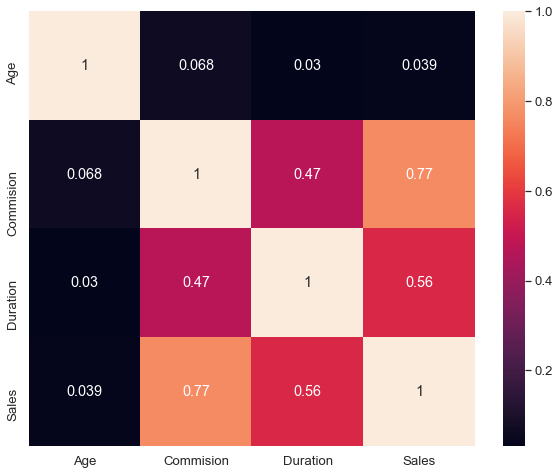

In [68]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

Converting all objects to categorical codes

In [69]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.4 KB


In [71]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Proportion of 1s and 0s

In [73]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

_____________________________

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [74]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


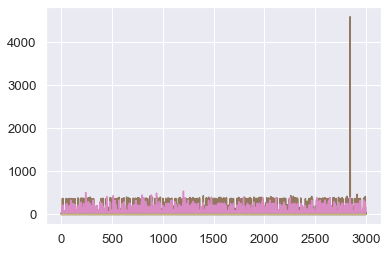

In [75]:
# prior to scaling 
plt.plot(X)
plt.show()

In [76]:
# Scaling the attributes.

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


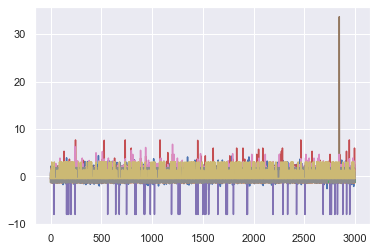

In [170]:
# after scaling 
plt.plot(X_scaled)
plt.show()

Splitting data into training and test set

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

Checking the dimensions of the training and test data

In [79]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


Building a Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [85]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [86]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [87]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [88]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [89]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [90]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [91]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 260}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=260, random_state=1)

Generating Tree

In [108]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

tree

https://edotor.net/

Variable Importance - DTCL

In [109]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634112
Sales         0.220899
Product Name  0.086632
Commision     0.021881
Age           0.019940
Duration      0.016536
Type          0.000000
Channel       0.000000
Destination   0.000000


Predicting on Training and Test dataset

In [110]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

Getting the Predicted Classes and Probs

In [111]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.697947,0.302053
1,0.979452,0.020548
2,0.921171,0.078829
3,0.510417,0.489583
4,0.921171,0.078829


Building a Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
param_grid_rfcl = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [8,9,11,15],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [290,350,400] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [115]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

Predicting the Training and Testing data

In [116]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

Getting the Predicted Classes and Probs

In [117]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.778010,0.221990
1,0.971910,0.028090
2,0.904401,0.095599
3,0.651398,0.348602
4,0.868406,0.131594


Variable Importance via RF

In [118]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.276015
Product Name  0.235583
Sales         0.152733
Commision     0.135997
Duration      0.077475
Type          0.071019
Age           0.039503
Destination   0.008971
Channel       0.002705


Building a Neural Network Classifier

In [120]:
from sklearn.neural_network import MLPClassifier

In [121]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [122]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

Predicting the Training and Testing data

In [124]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

Getting the Predicted Classes and Probs

In [126]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


____________________________________

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

CART - AUC and ROC for the training data

In [128]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.823


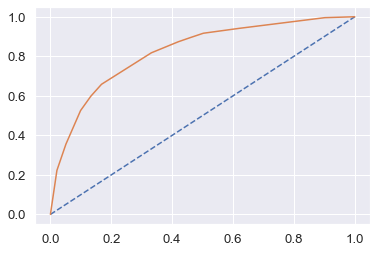

In [129]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

CART -AUC and ROC for the test data

AUC: 0.801


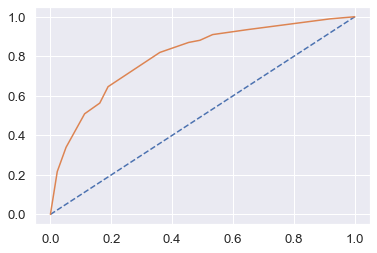

In [131]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

CART Confusion Matrix and Classification Report for the training data

In [ ]:
CART Confusion Matrix and Classification Report for the training data

In [132]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1309,  144],
       [ 307,  340]], dtype=int64)

In [133]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7852380952380953

In [134]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [135]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.53
cart_train_f1  0.6


In [ ]:
CART Confusion Matrix and Classification Report for the testing data


In [136]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[553,  70],
       [136, 141]], dtype=int64)

In [137]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7711111111111111

In [138]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [139]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.51
cart_test_f1  0.58


Cart Conclusion:

Train Data:
- AUC: 82%
- Accuracy: 79%
- Precision: 70%
- f1-Score: 60%

Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 80%
- f1-Score: 84%

The result of training and test dataset are almost similar, and with the overall measures high, the model seems to be a good model.

Change is the most important variable for predicting diabetes

Random Forest Model Performance Evaluation on Training data

In [140]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1297,  156],
       [ 255,  392]], dtype=int64)

In [141]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [142]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [143]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8563713512840778


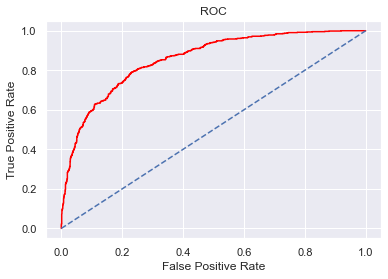

In [171]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

RF Model Performance Evaluation on Test data

In [145]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  73],
       [121, 156]], dtype=int64)

In [146]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7844444444444445

In [147]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



In [148]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


Area under Curve is 0.8181994657271499


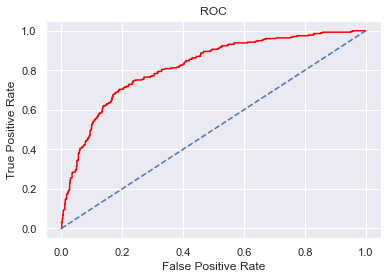

In [172]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

Random Forest Conclusion
Train Data:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%

Test Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

NN Model Performance Evaluation on Training data

In [152]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [153]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [154]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [155]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


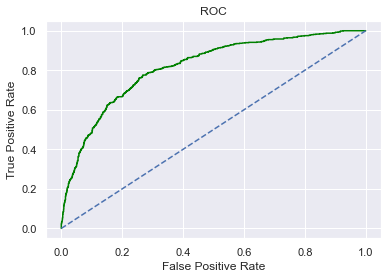

In [173]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='Green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

NN Model Performance Evaluation on Test data

In [157]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [158]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [160]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [161]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


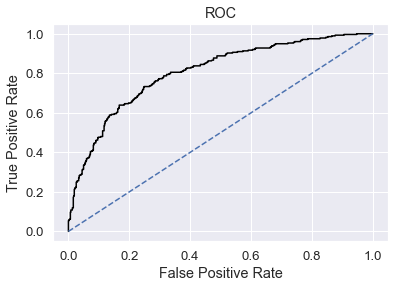

In [162]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

Neural Network Conclusion
Train Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59

Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

_________________

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [163]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.80,0.78,0.78,0.77
AUC,0.82,0.80,0.86,0.82,0.82,0.80
Recall,0.53,0.51,0.61,0.56,0.51,0.50
Precision,0.70,0.67,0.72,0.68,0.68,0.67
F1 Score,0.60,0.58,0.66,0.62,0.59,0.57


ROC Curve for the 3 models on the Training data

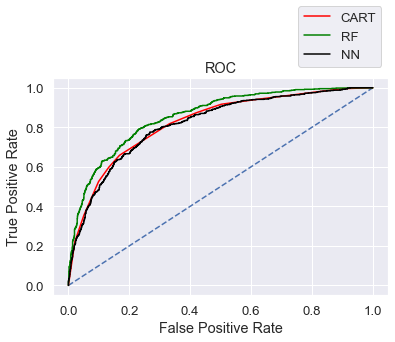

In [164]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

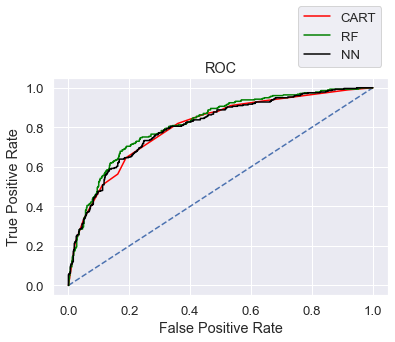

In [165]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

CONCLUSION :
It is better to select Random Forest model, as it has better accuracy, precsion, recall and f1 score, which is better than CART & NN.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

This is perceived by taking a gander at the insurance data by drawing relations between various factors like day of the occurrence, time, age bunch, and connecting it with other outer data like area, standards of conduct, climate data, carrier/vehicle types, and so on 

According to the information 90% of insurance is done by online channel.
Thus, streamlining on the web encounters can profit clients, prompt an increment in changes, which can hence profitability.
Other fascinating reality, most of the offline business has a claimed associated
Need to train the JZI agency to target more sales as they are in the bottom to do so they can run limited time advertising or rum promotional marketing campaigns.
Also dependent on the model we are getting 80%accuracy, so we need client books airline tickets or plans, strategically pitch the insurance dependent on the claim data pattern. • 
It is observed that a greater number of deals happen through Agency than Airlines and the pattern shows the claims are handled more at by Airline.

The KPI's of protection claims are: 
• Reduce claims process duration 
• Increase consumer loyalty/Satisfaction 
• Combat misrepresentation/fraud 
• Optimize claims recuperation 
• Reduce claim handling cost 

Insights acquired from information and AI-fueled examination could grow the limits of insurability, broaden existing items, and lead to new danger move arrangements in zones like a non-harm business interference and reputational harm.